In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from db_queries import get_location_metadata

import warnings
warnings.simplefilter('ignore')


In [2]:
df = pd.read_csv(f'/ihme/covid-19/deaths/dev/2020_05_14_cfrsplinemod_se2/model_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

loc_df = get_location_metadata(location_set_id=111, location_set_version_id=664)
loc_df = loc_df.loc[(loc_df['most_detailed'] == 1)]
location_ids = loc_df['location_id'].to_list()
location_names = loc_df['location_name'].to_list()

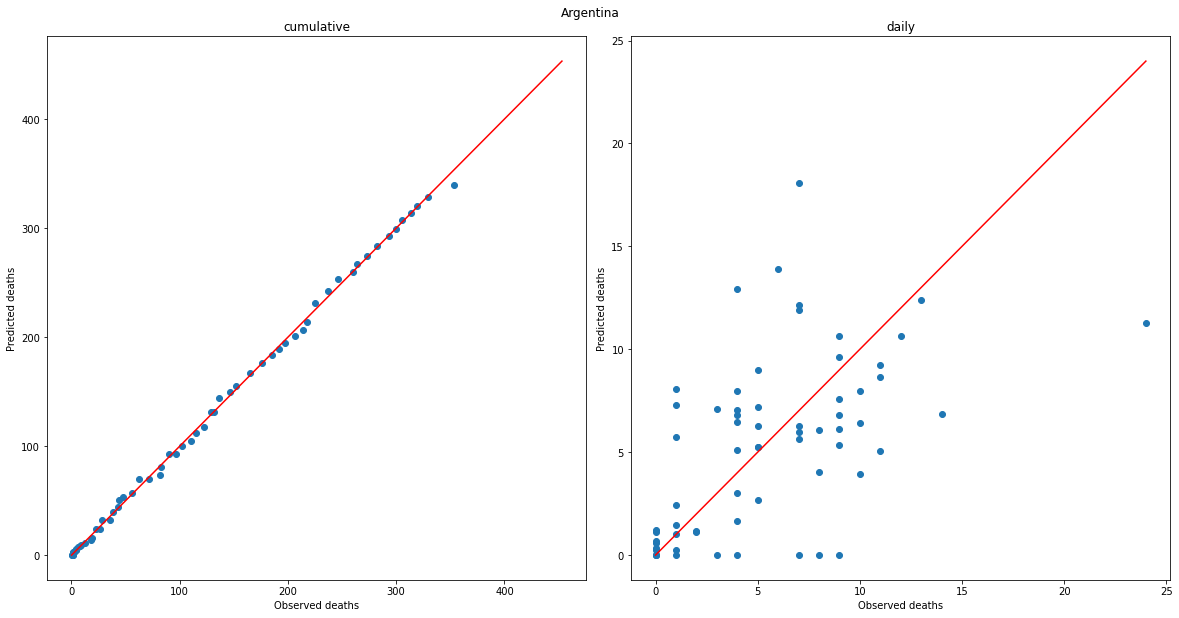

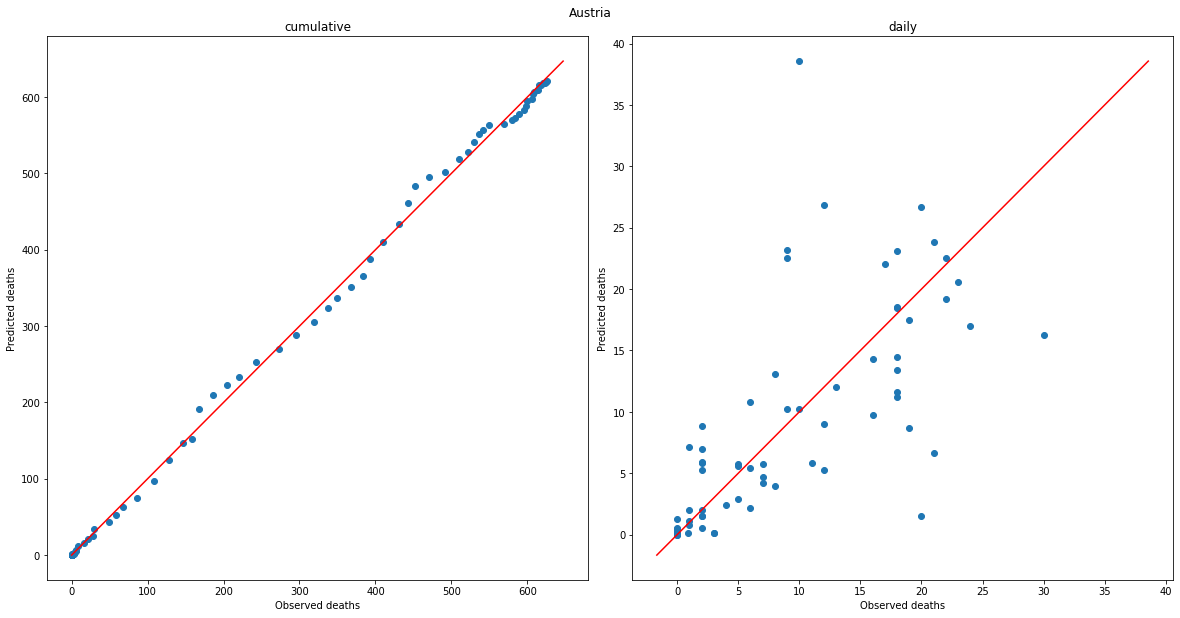

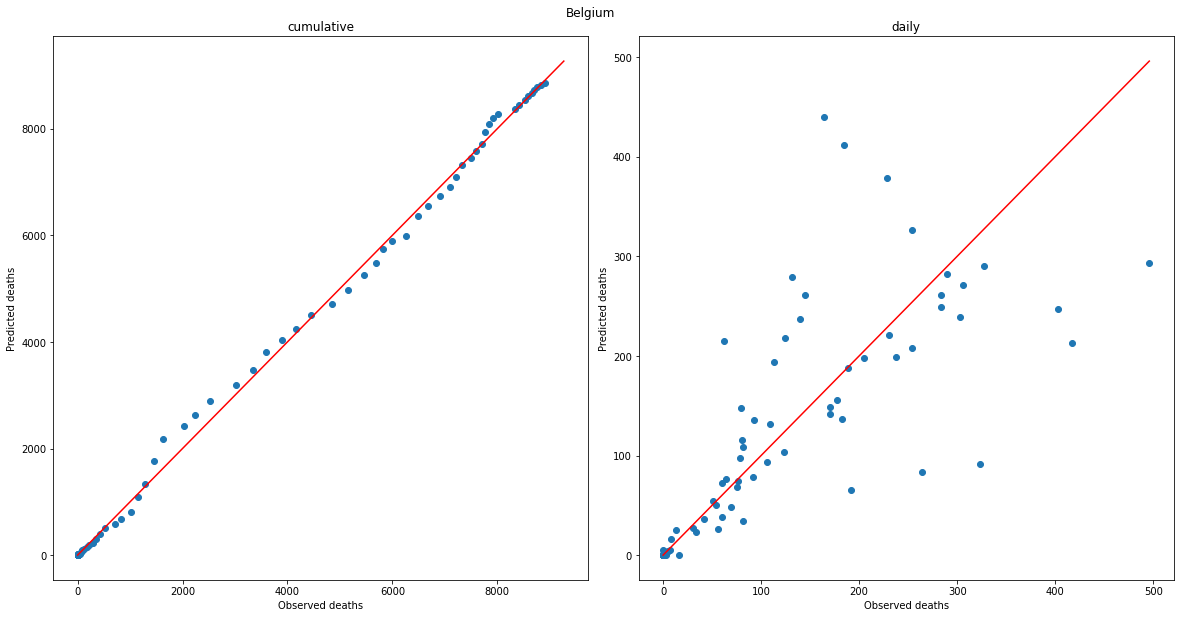

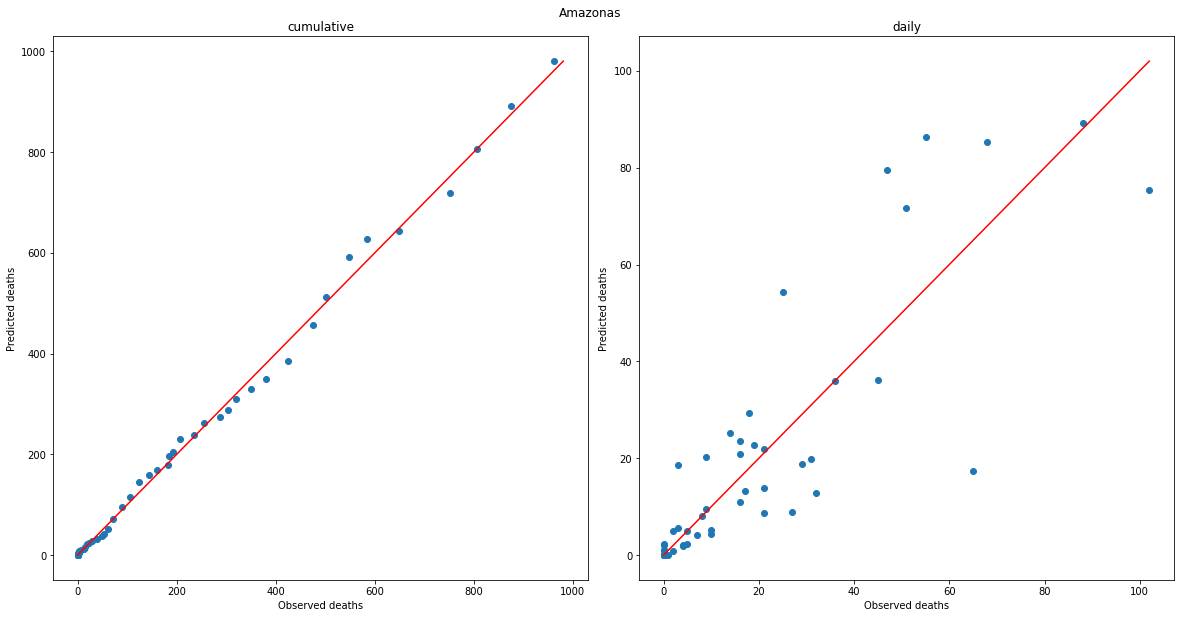

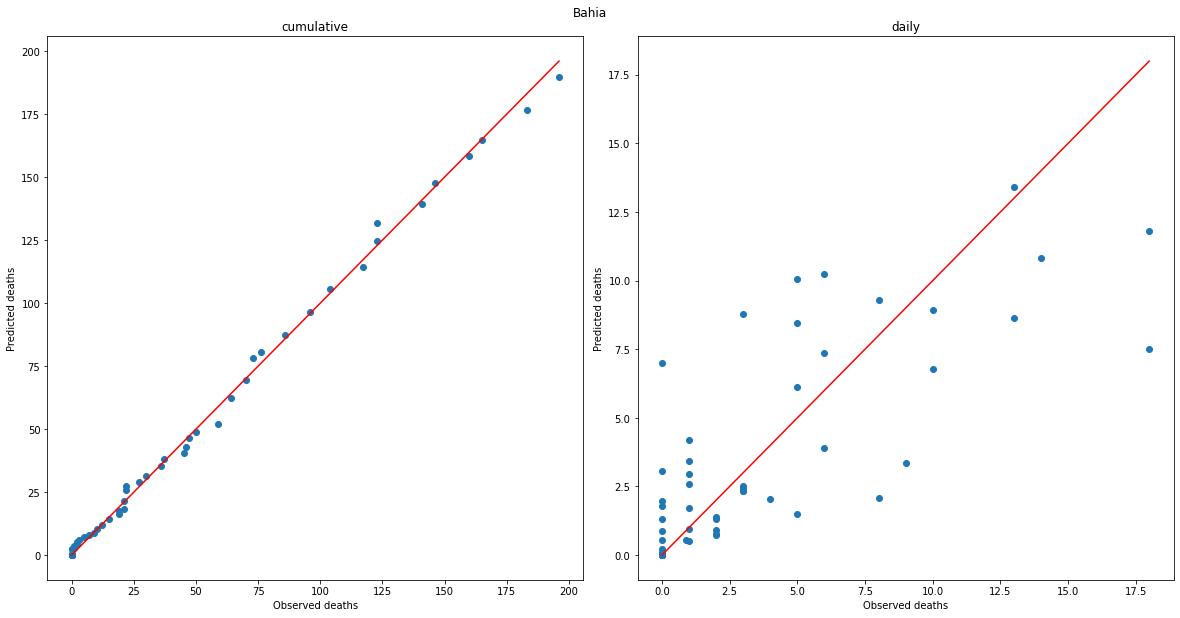

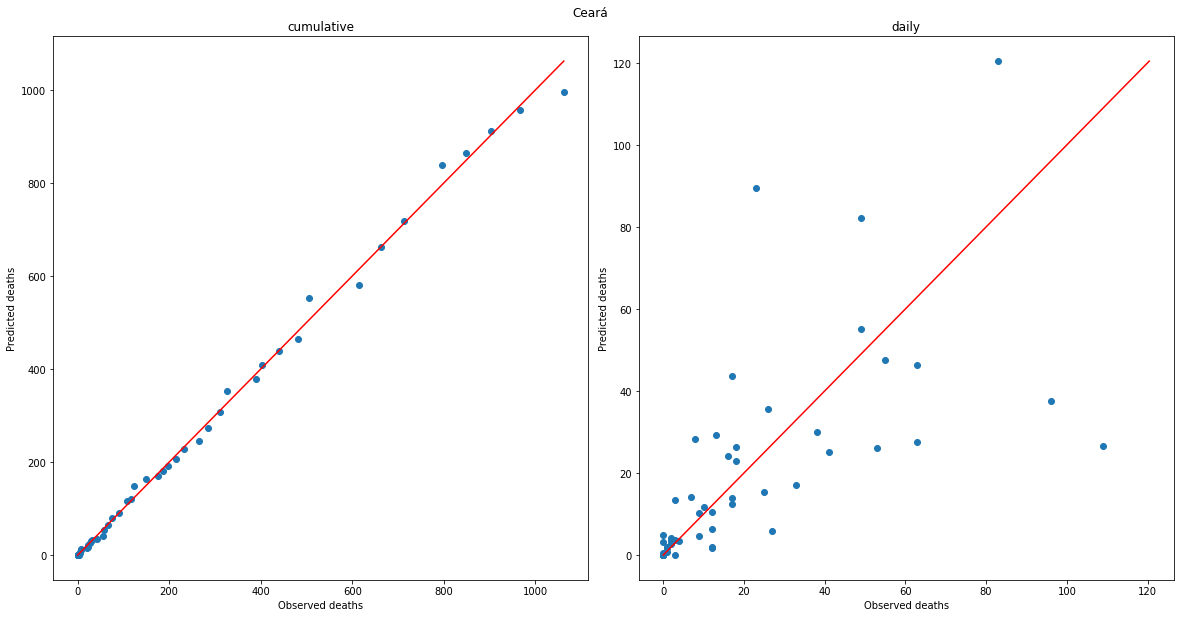

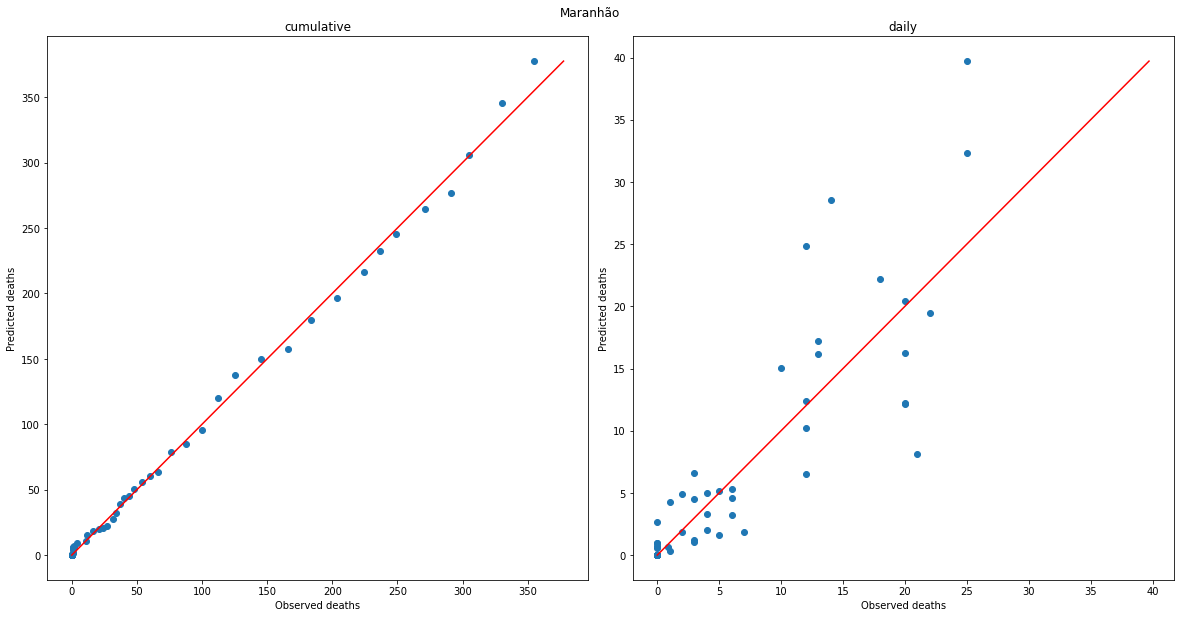

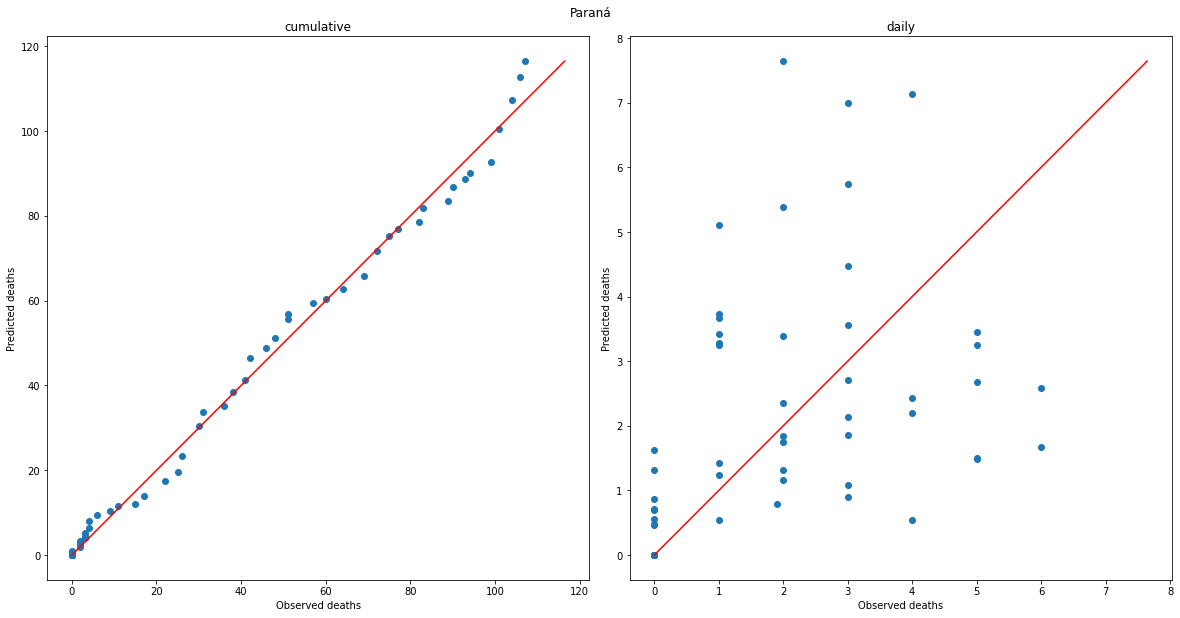

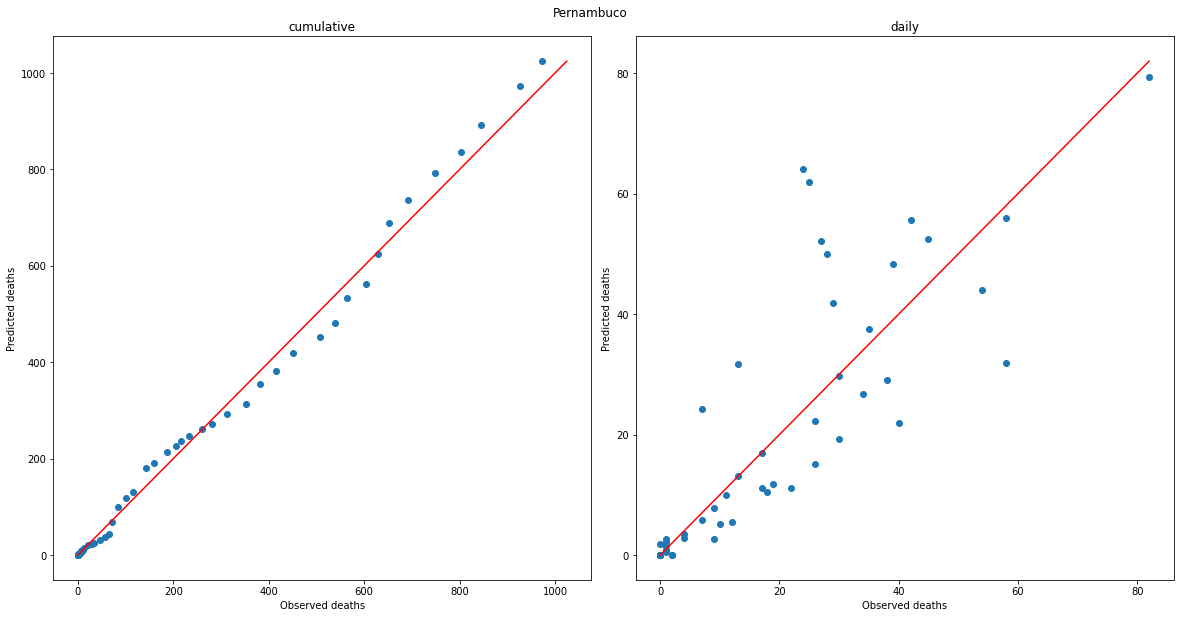

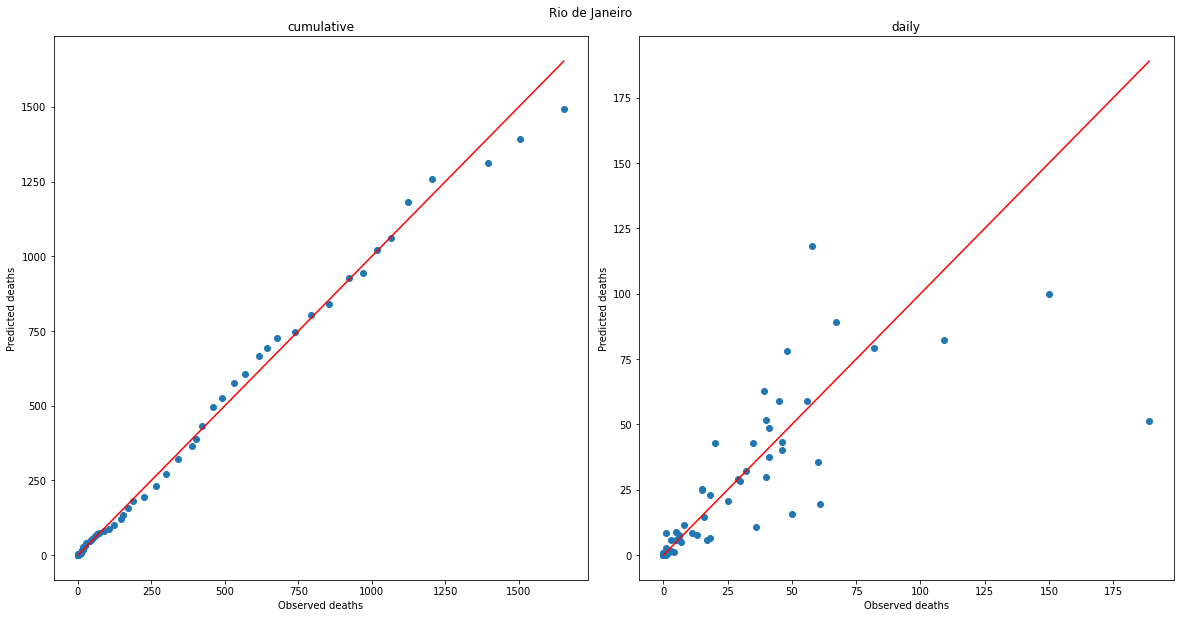

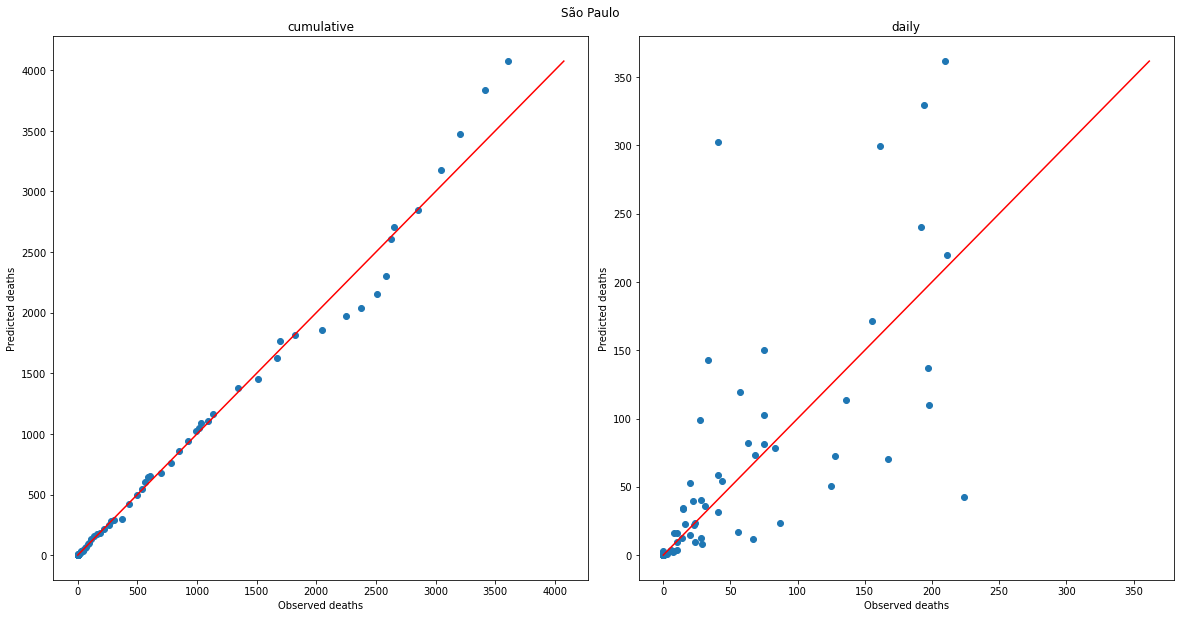

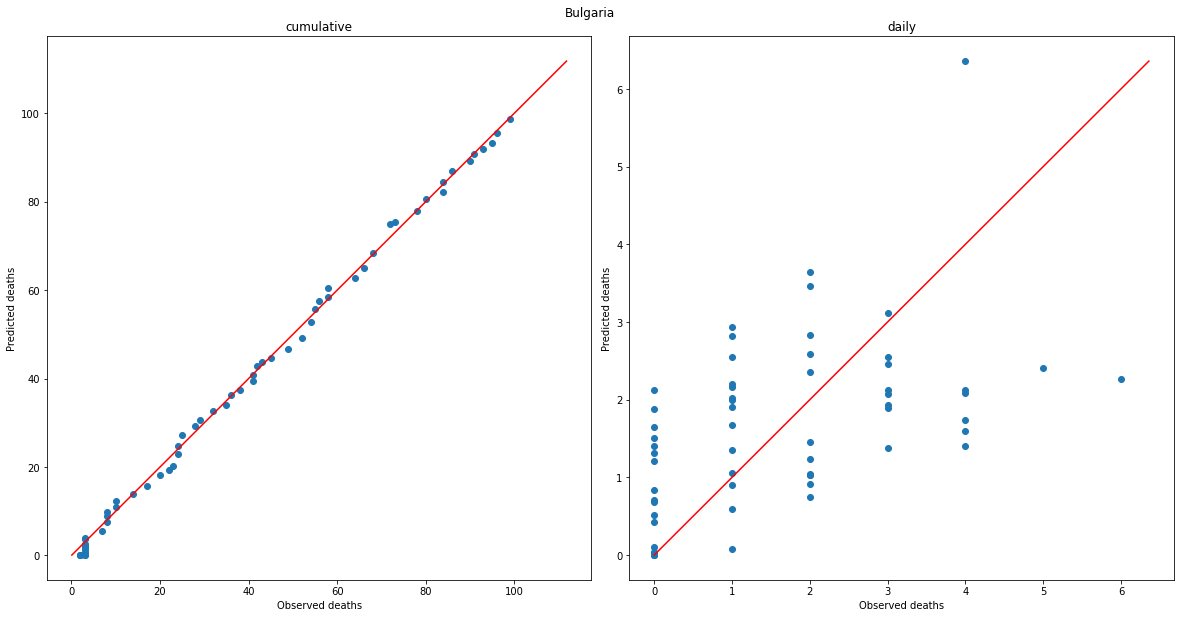

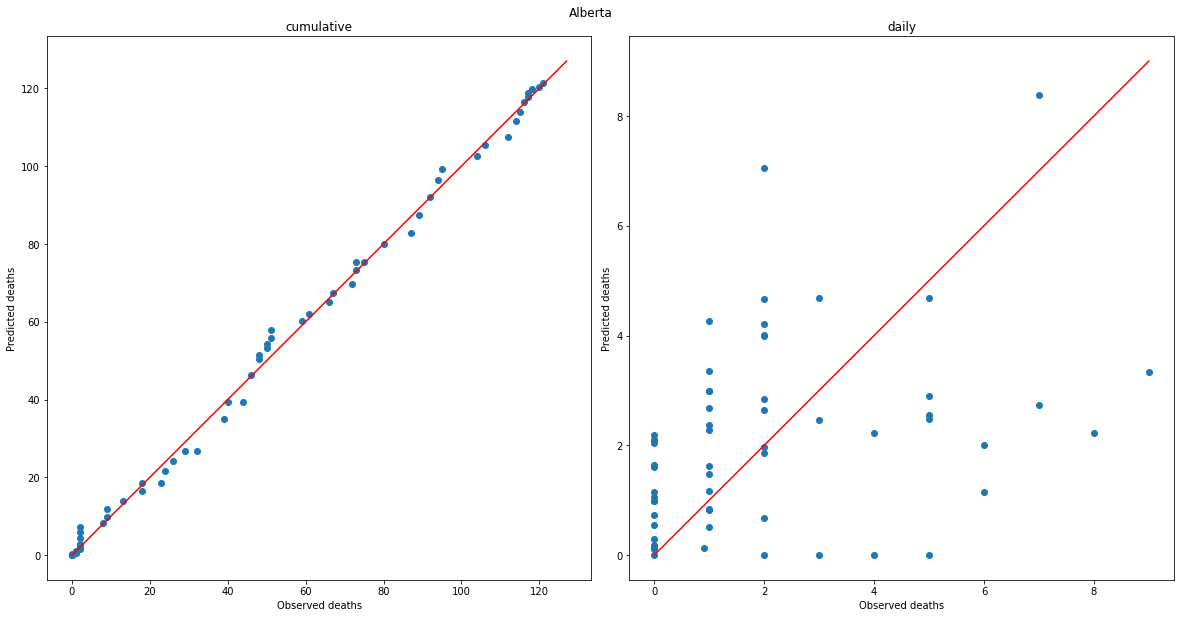

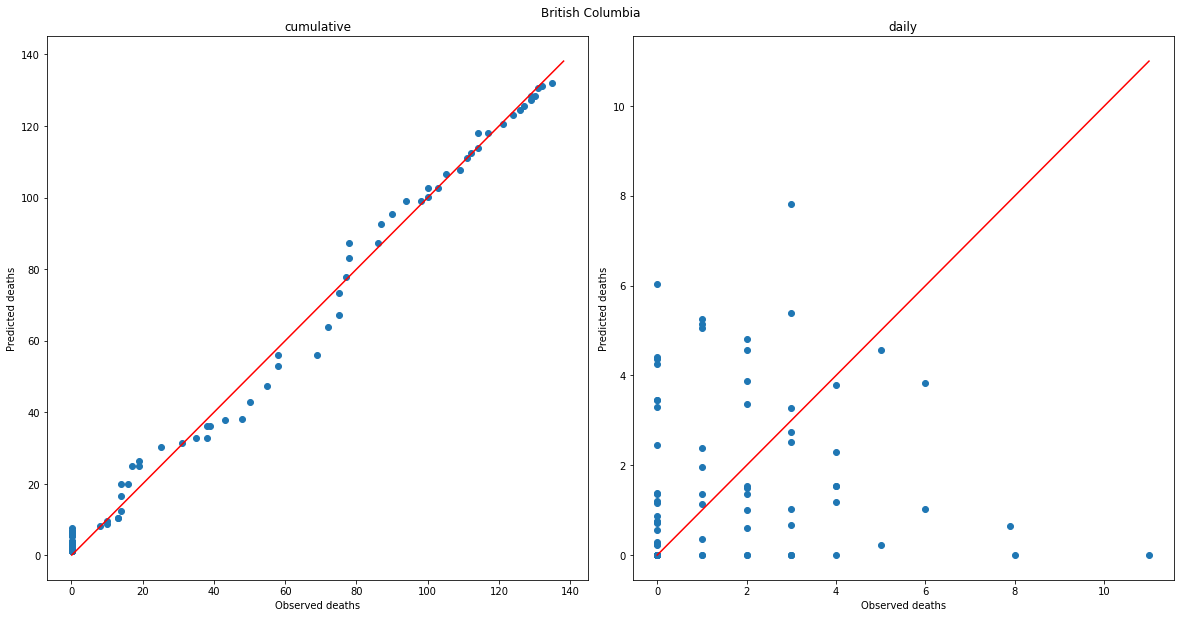

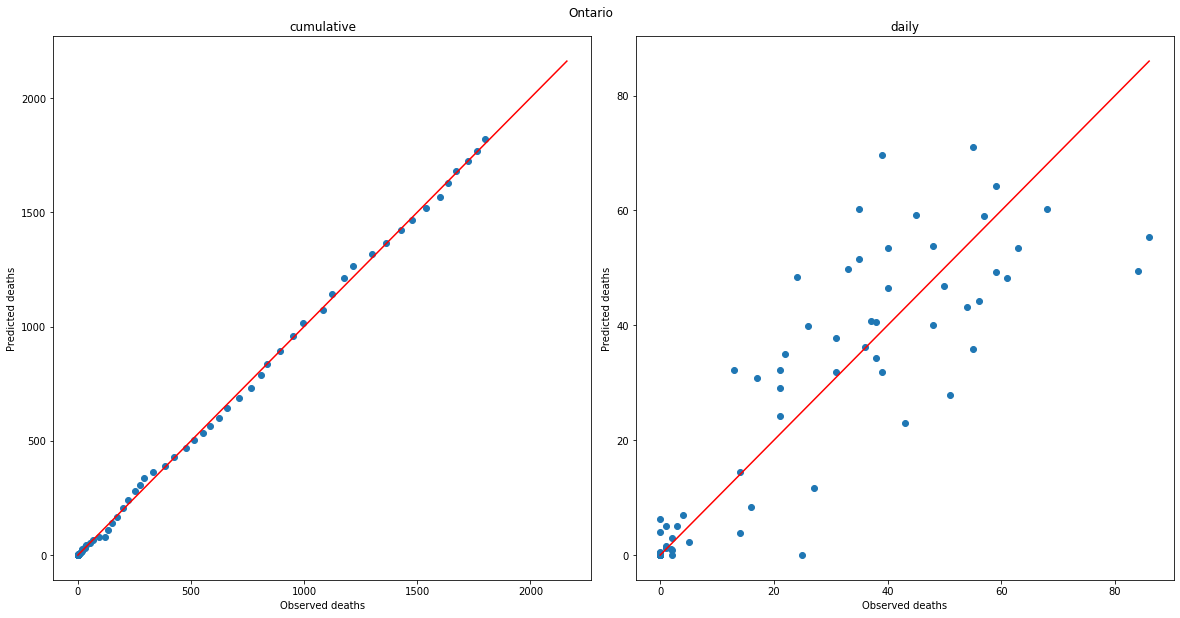

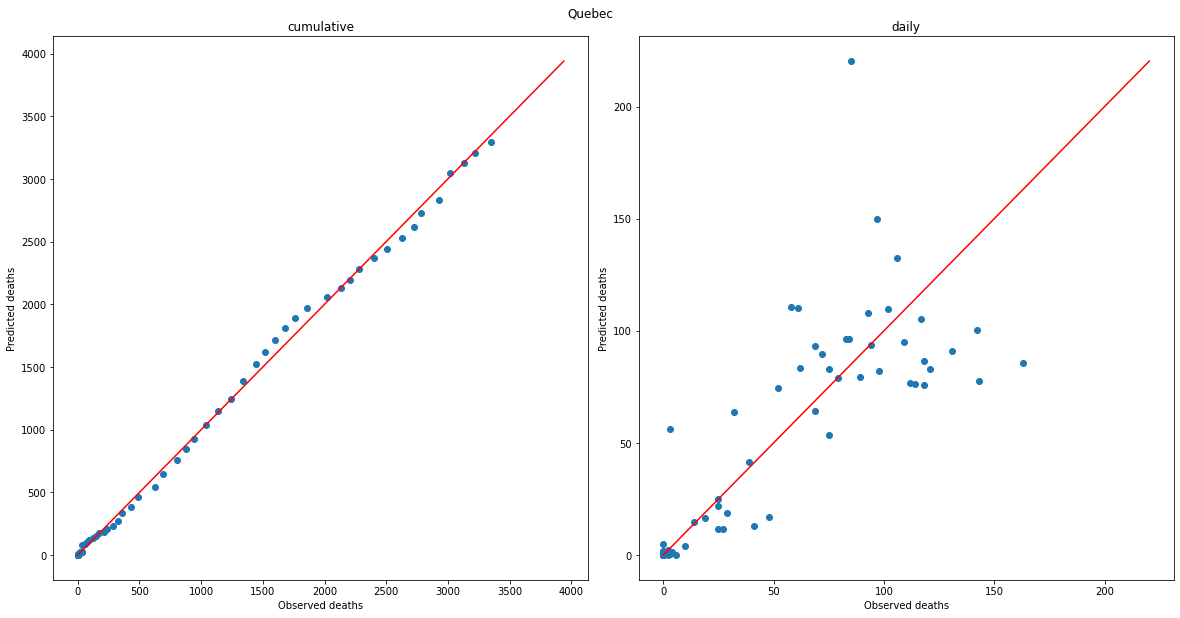

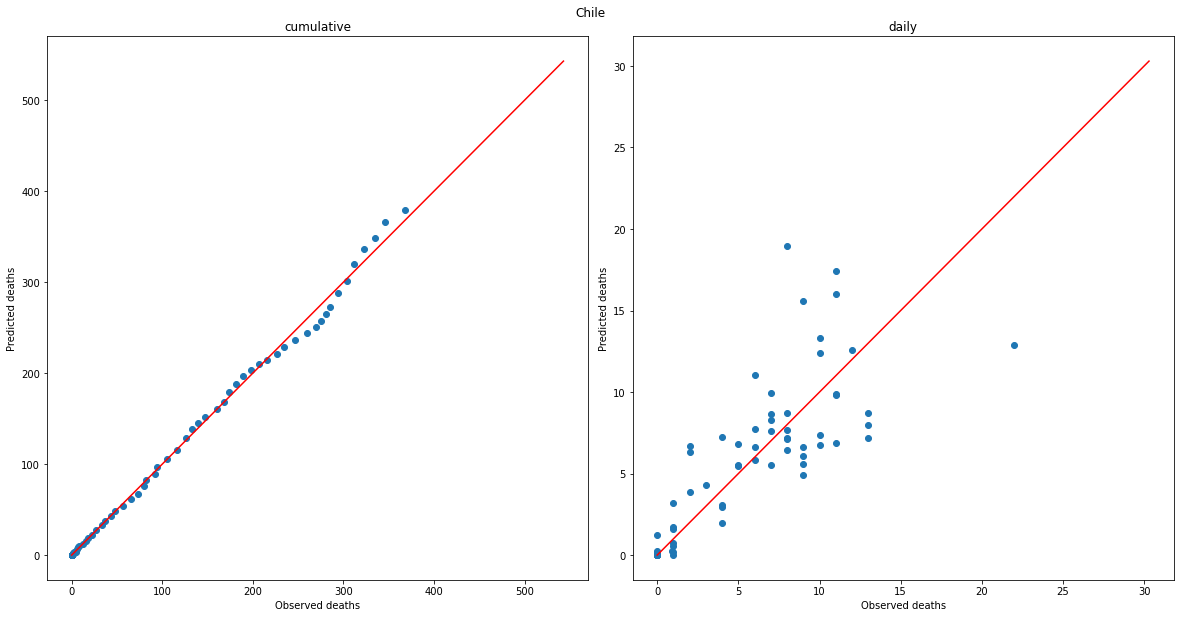

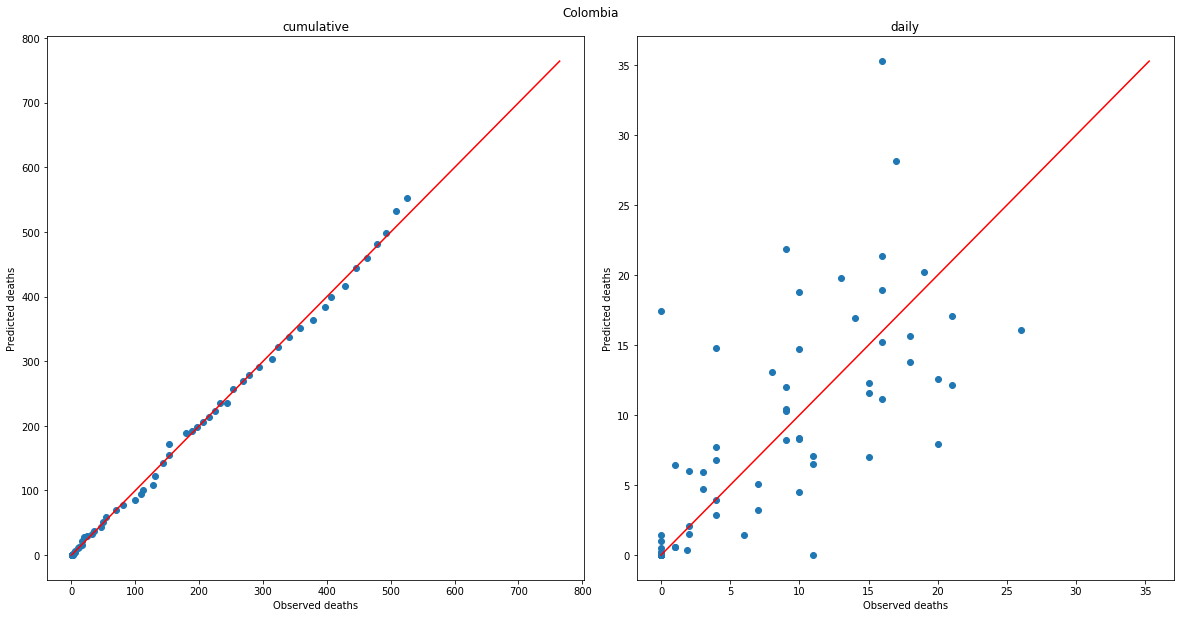

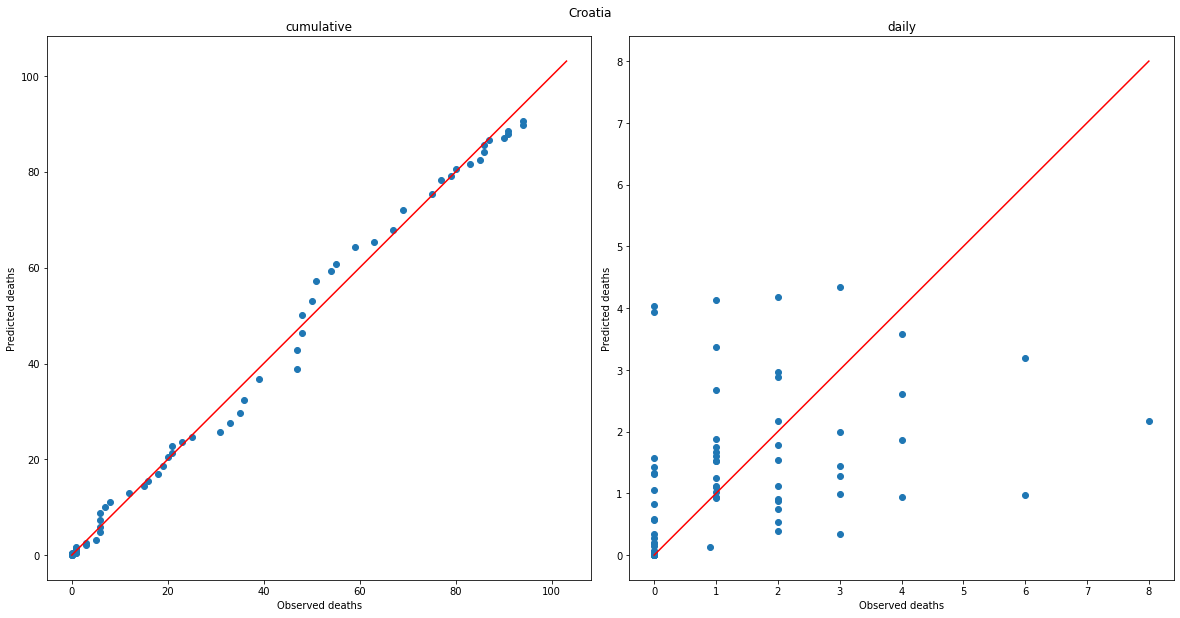

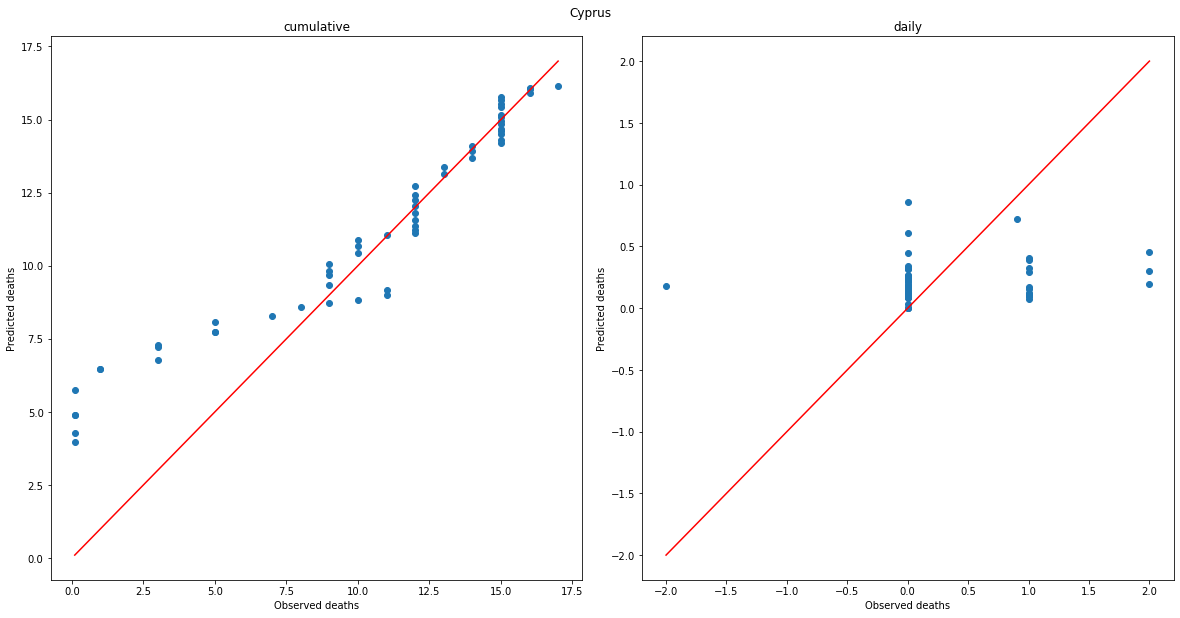

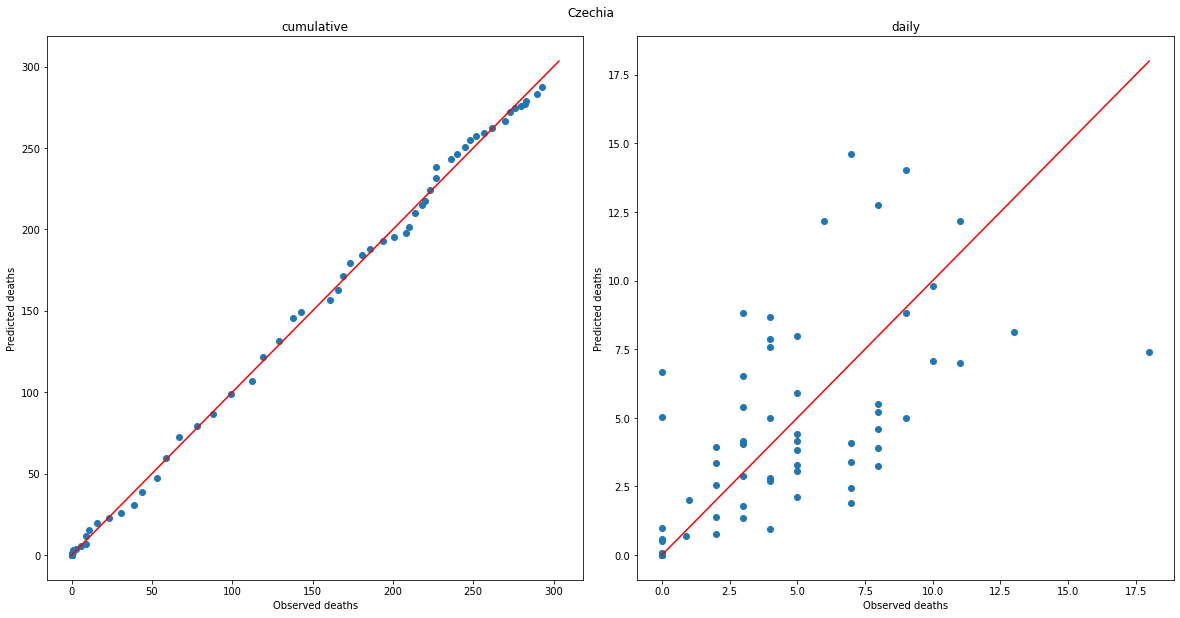

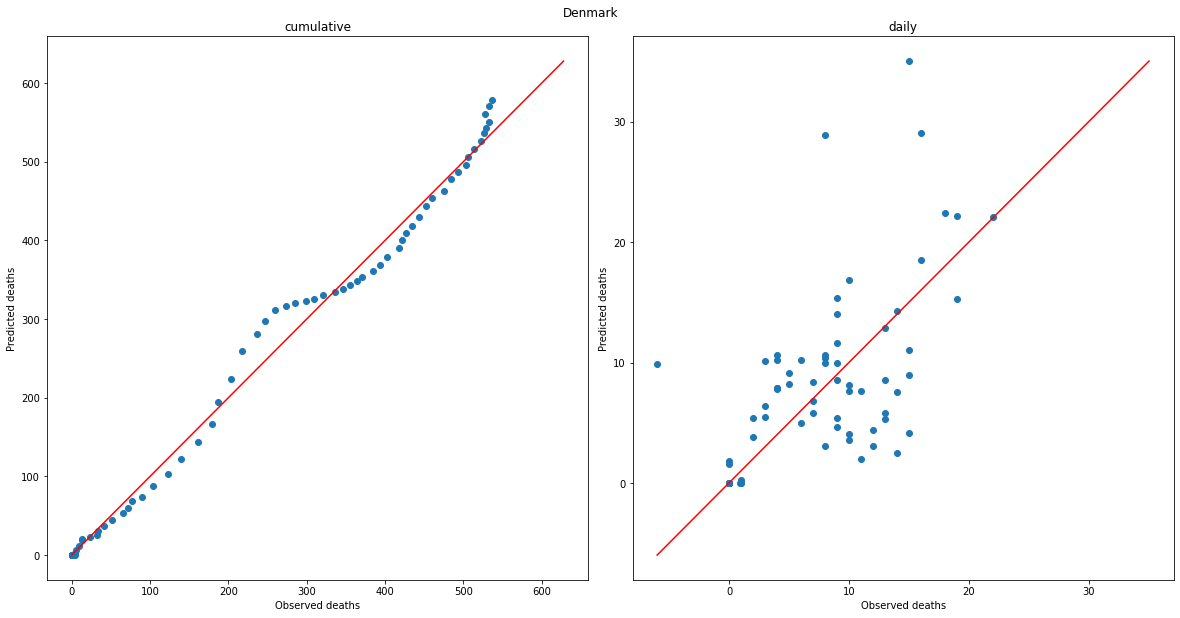

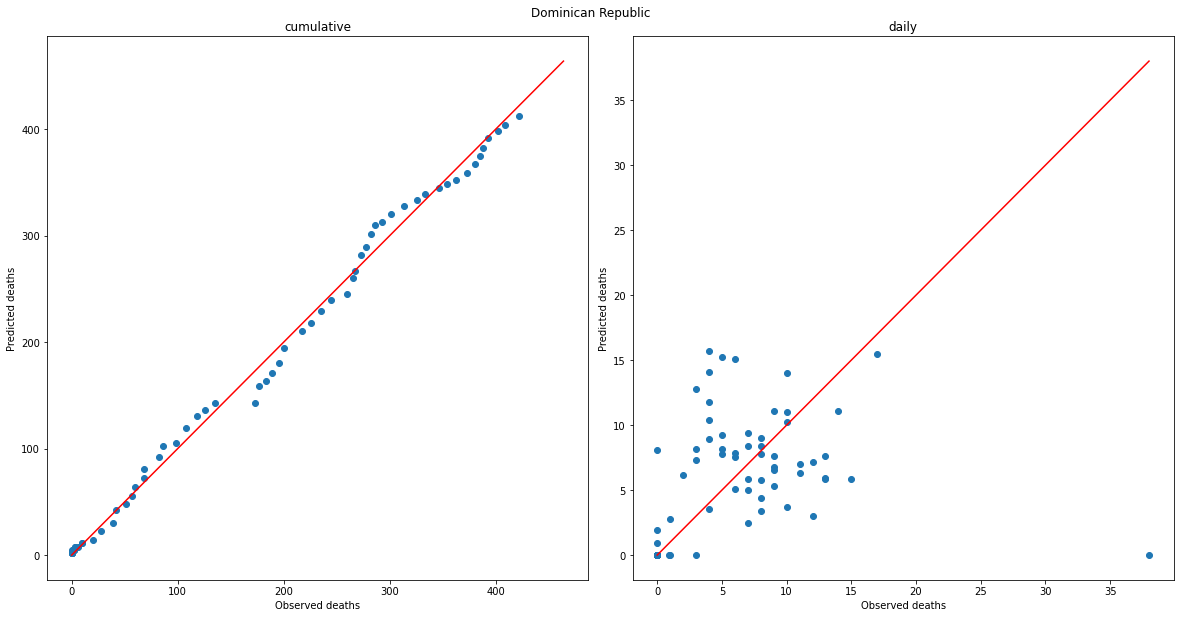

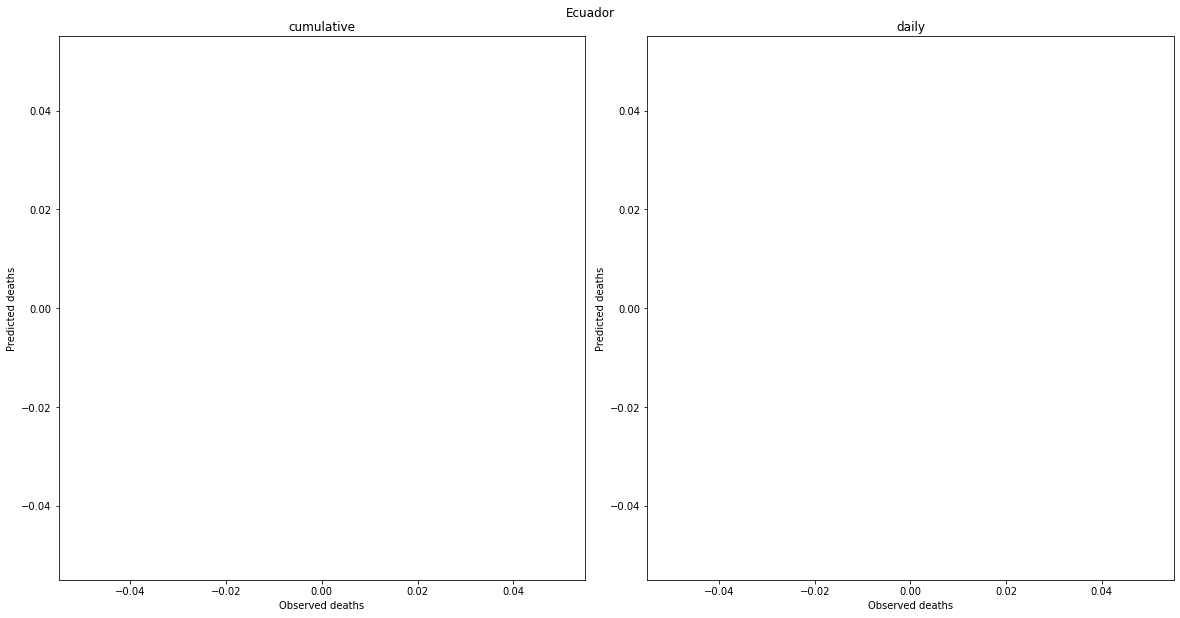

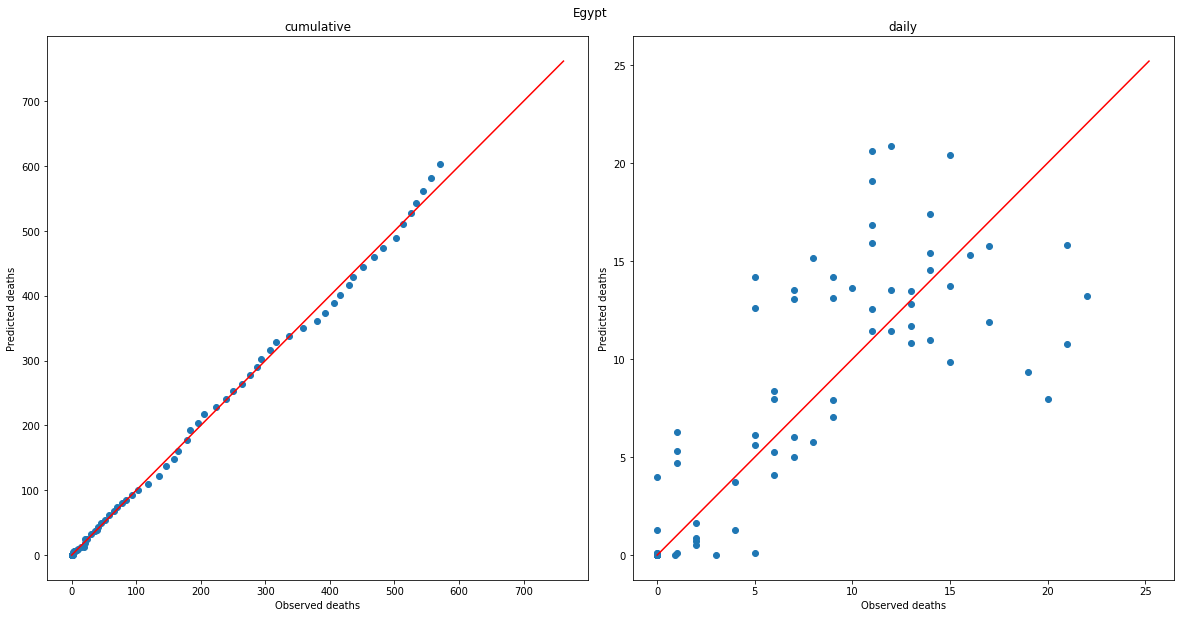

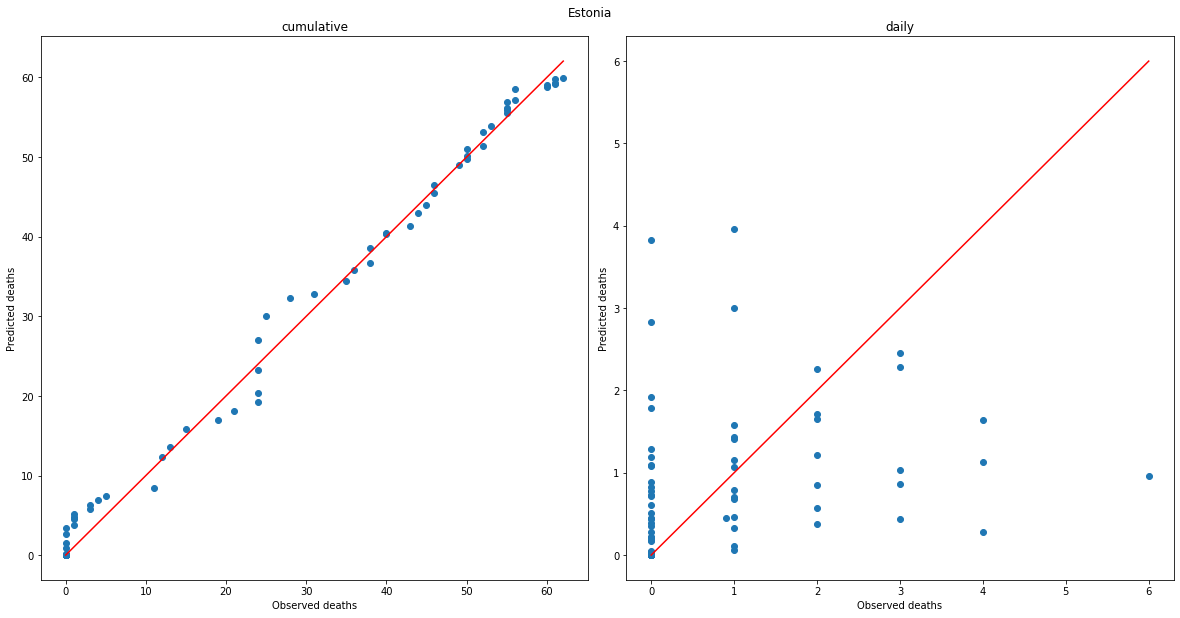

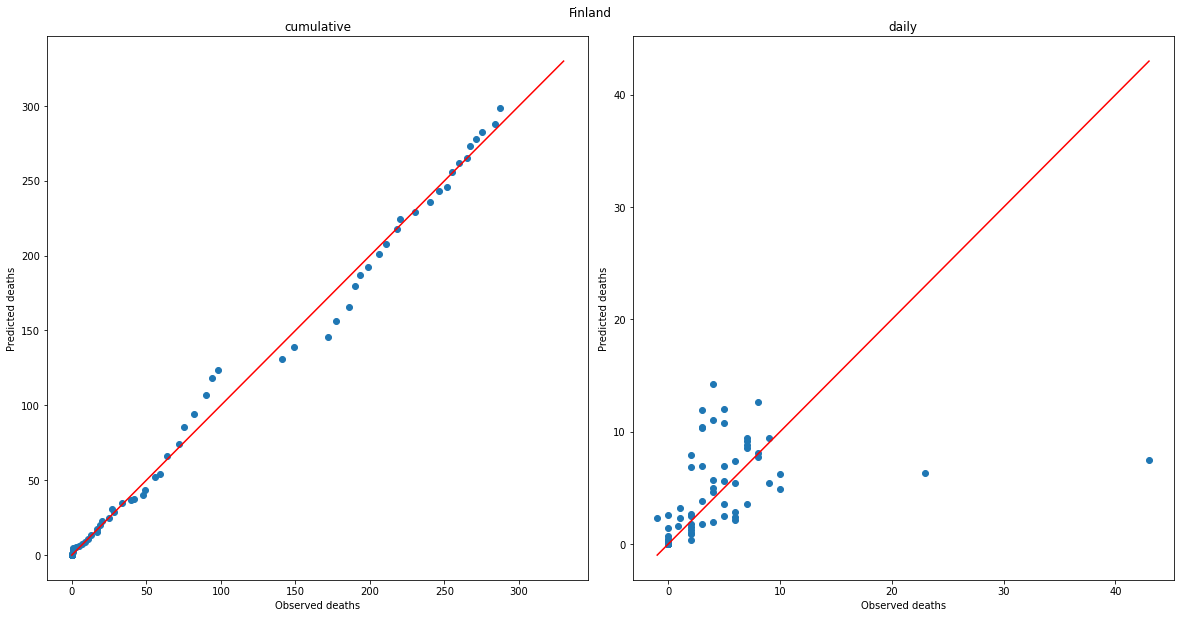

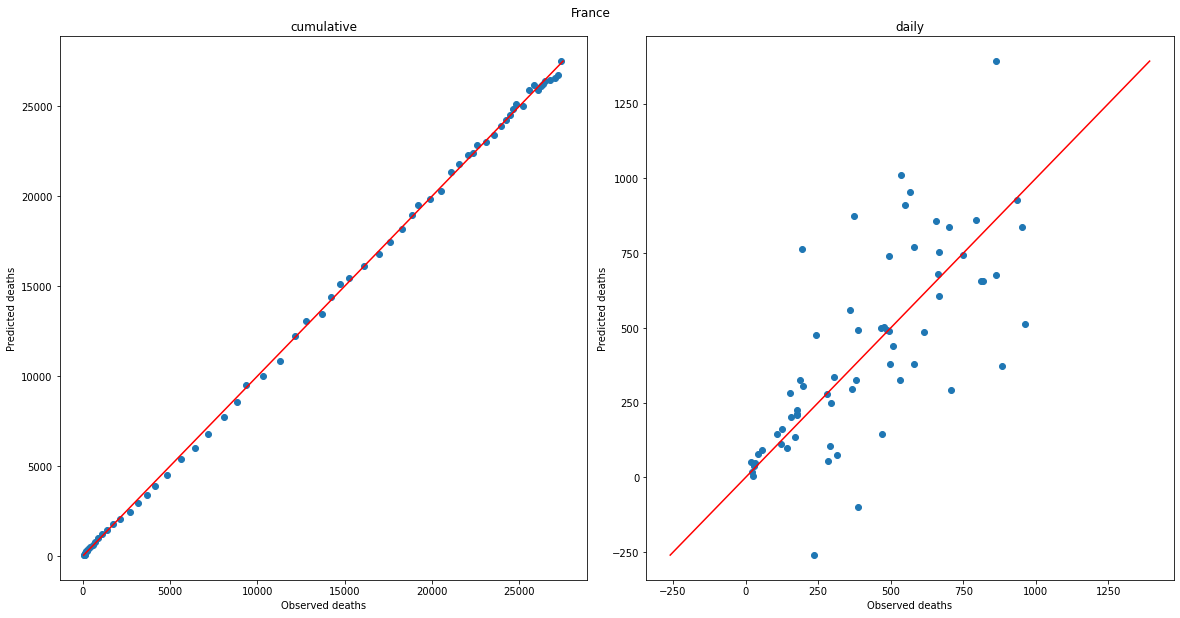

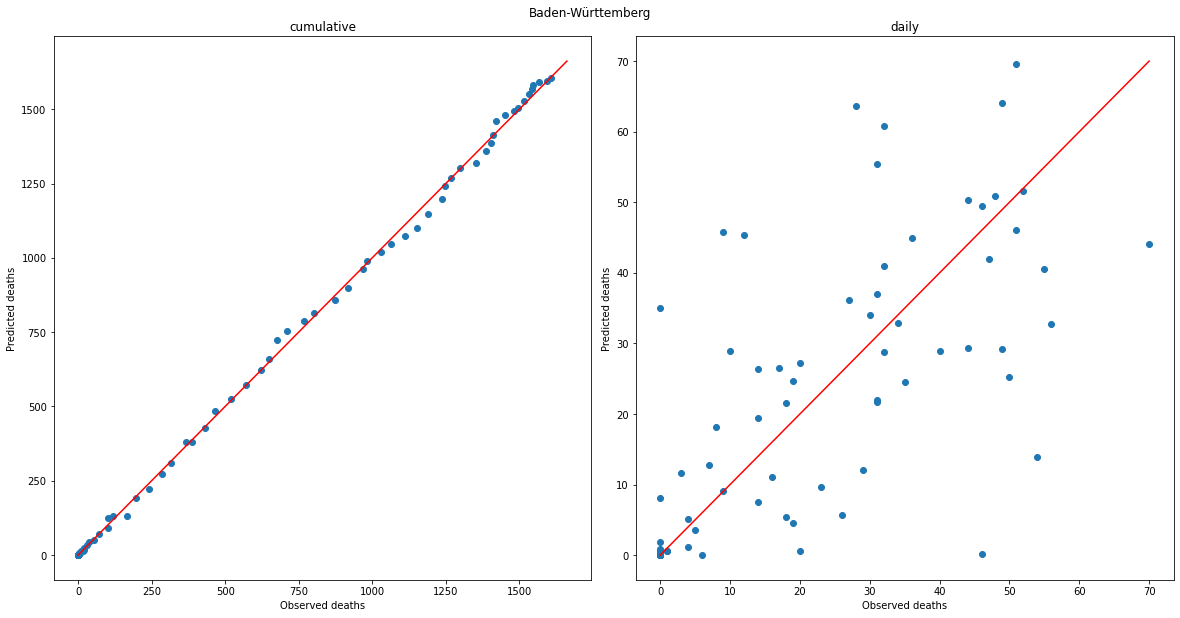

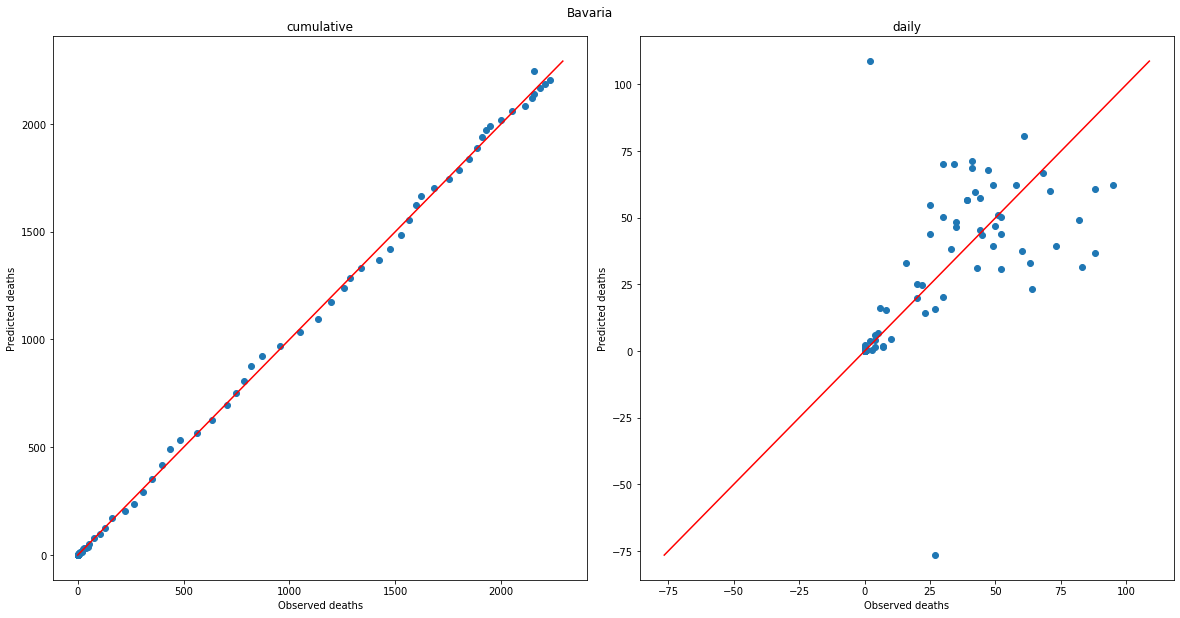

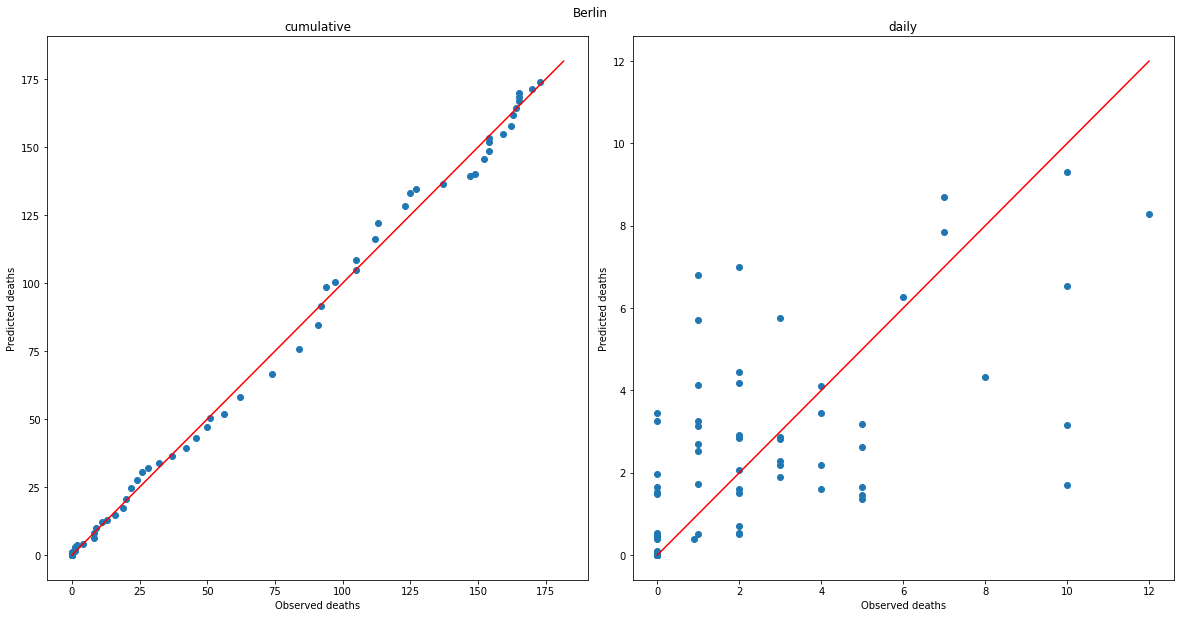

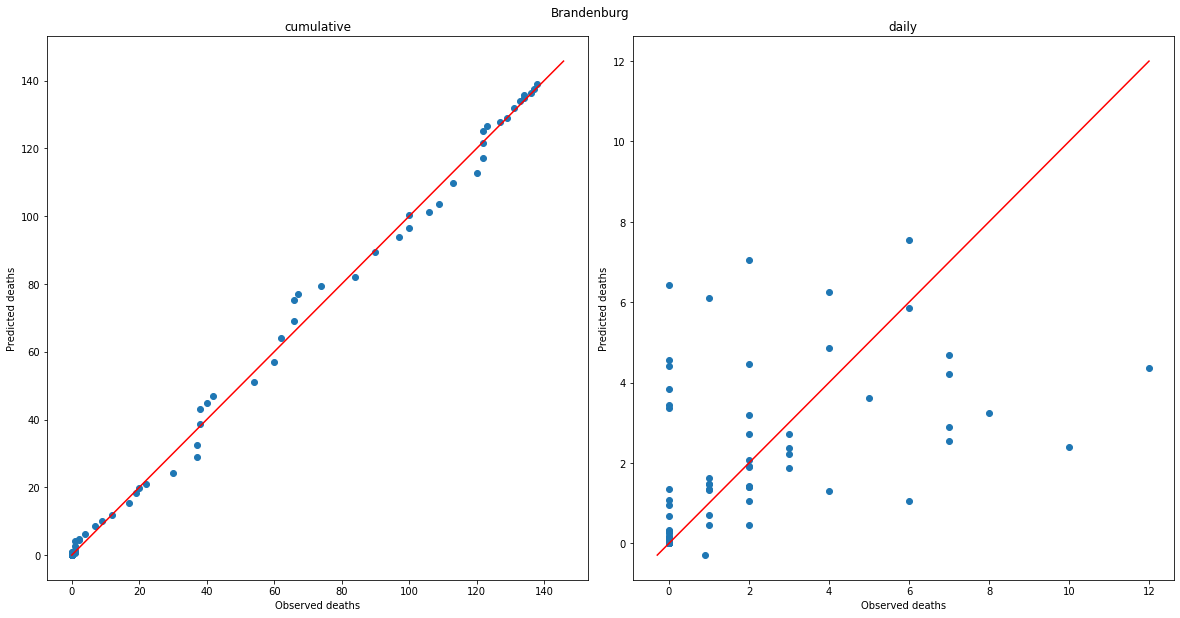

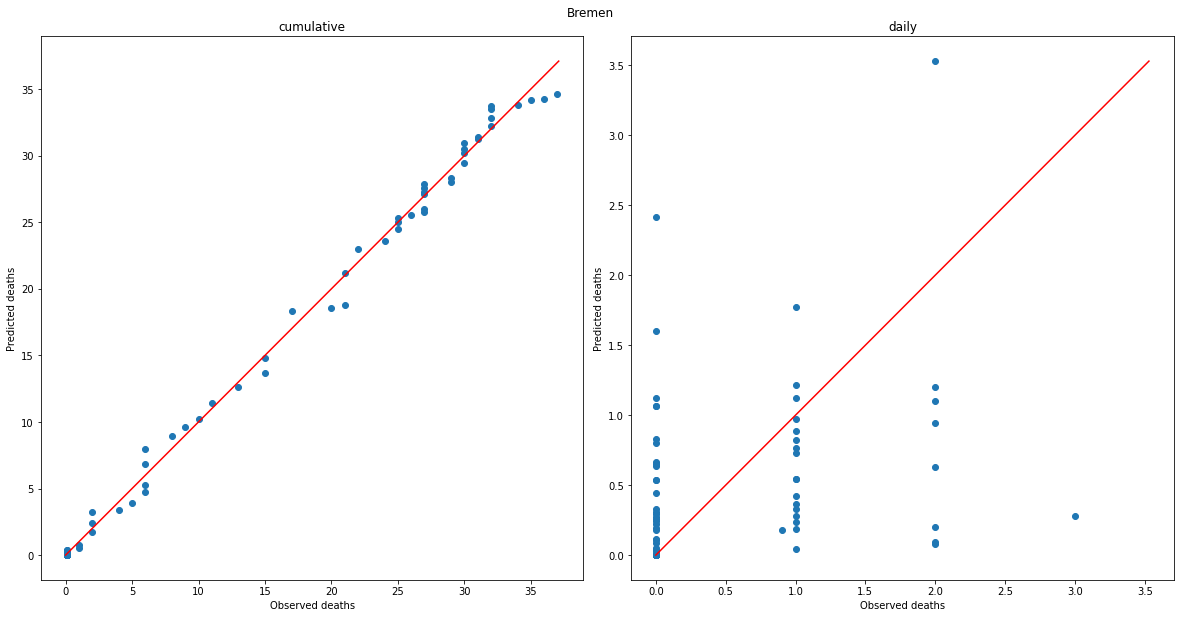

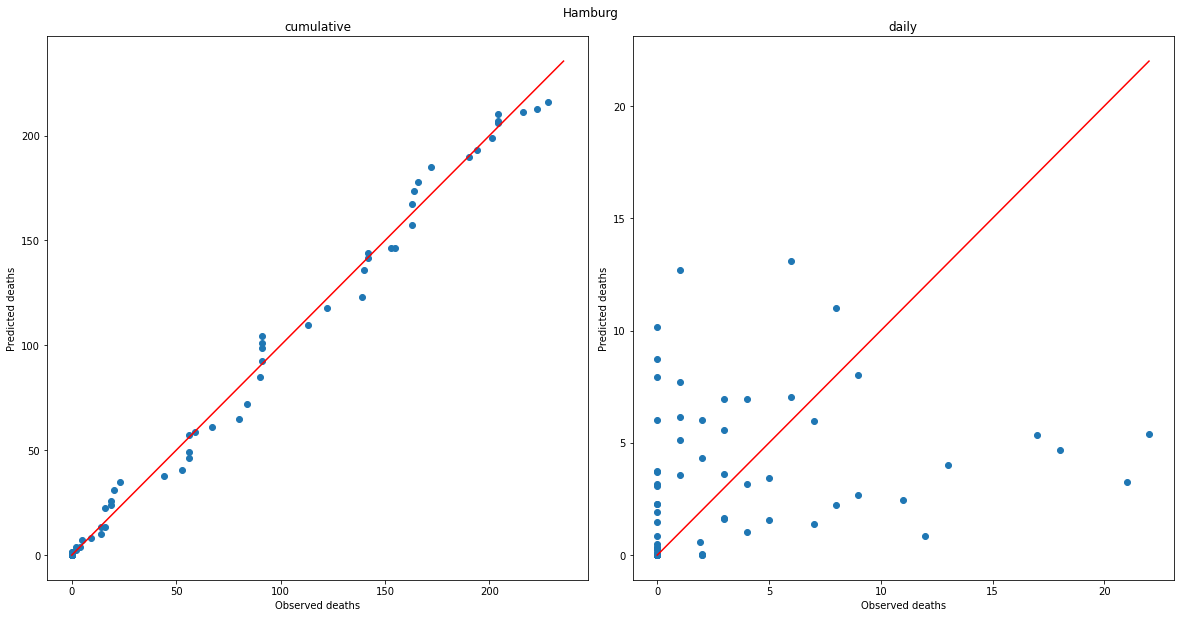

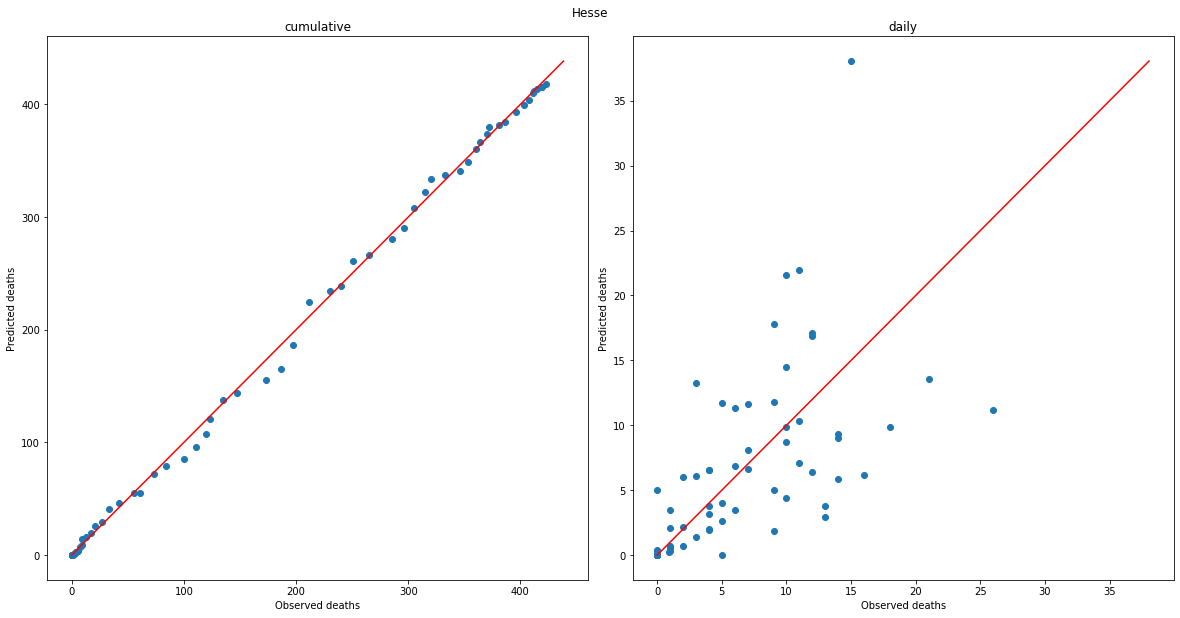

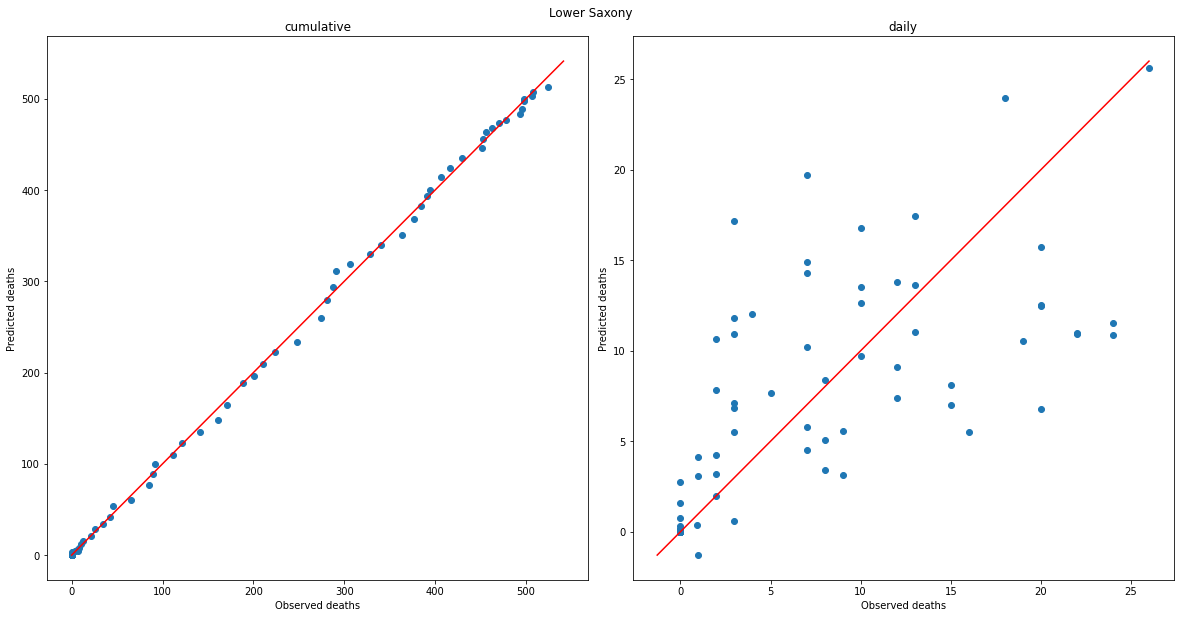

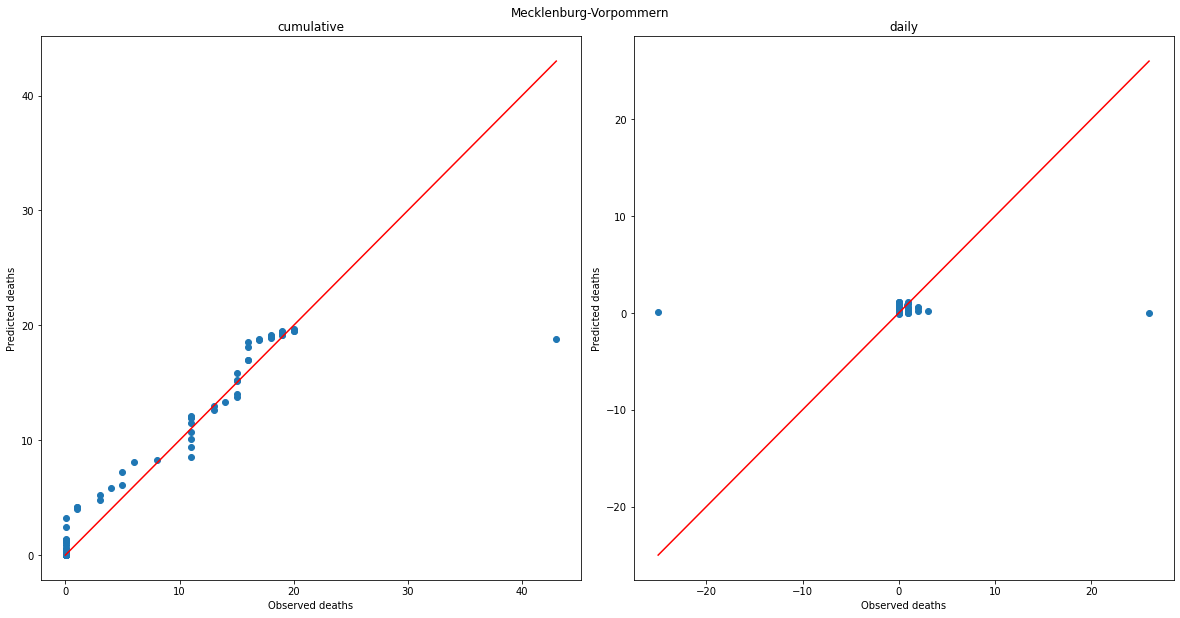

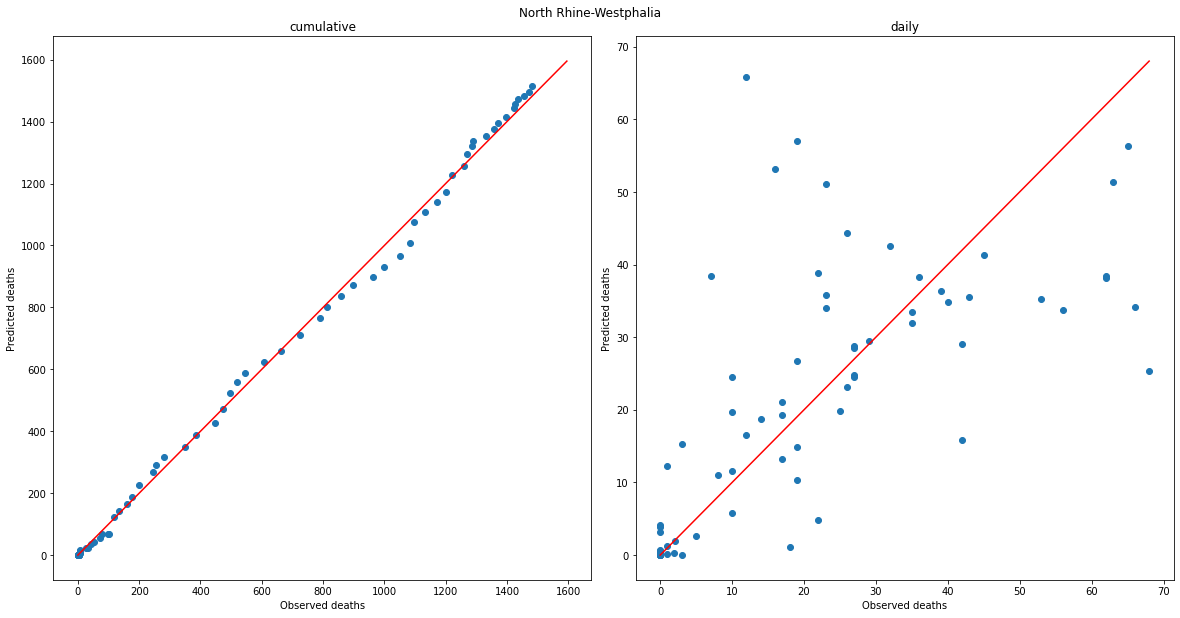

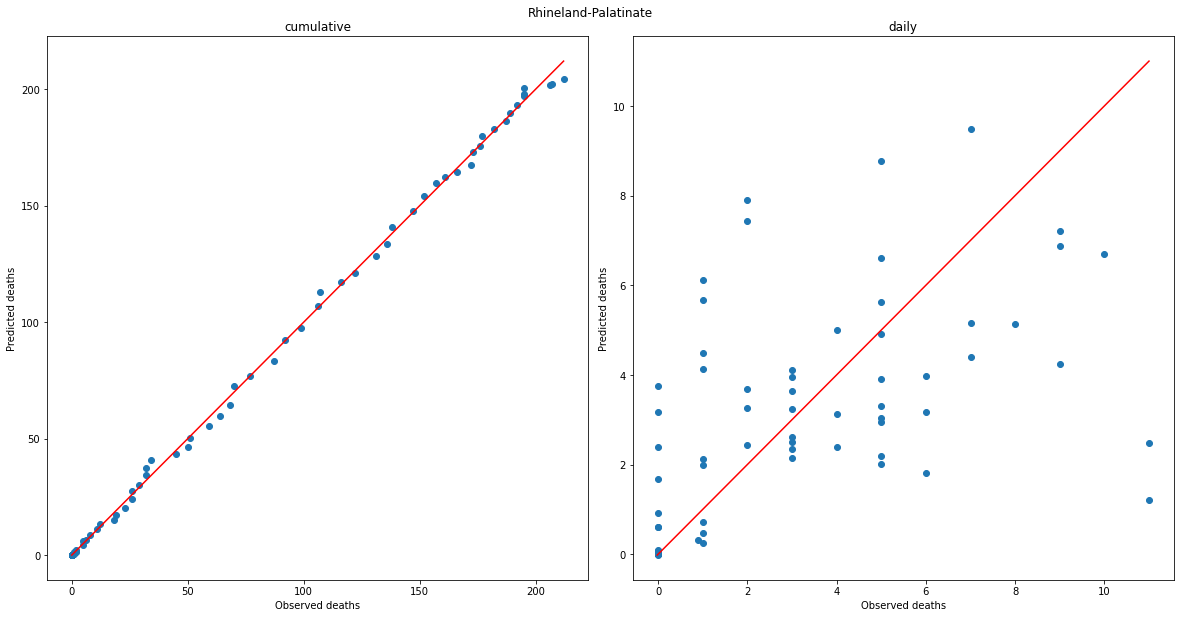

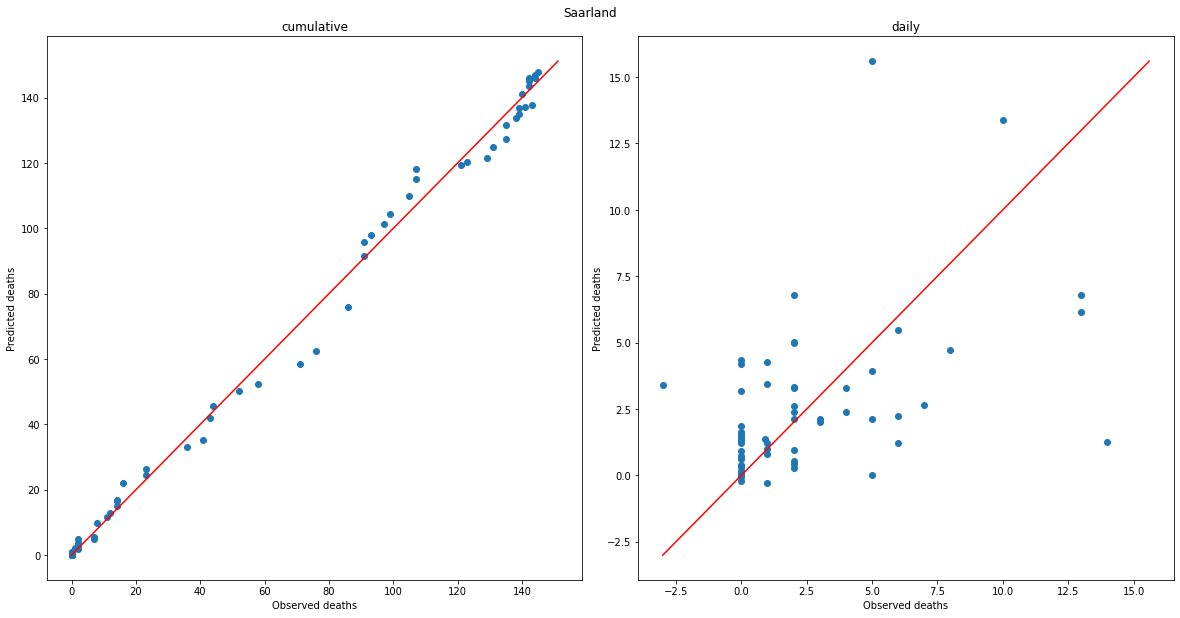

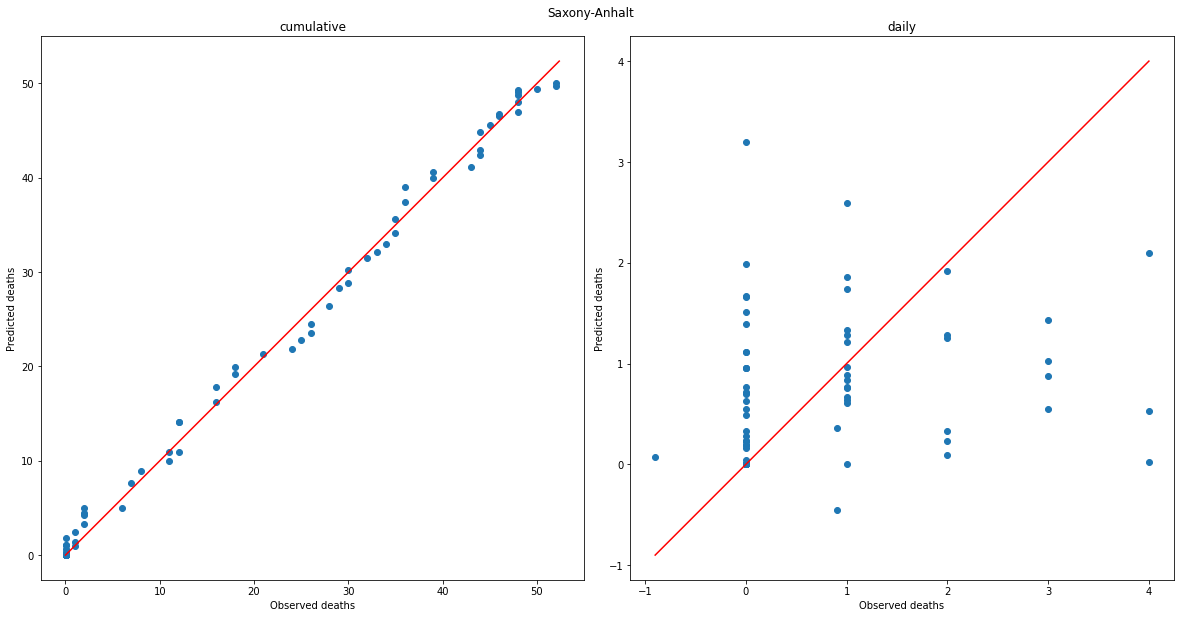

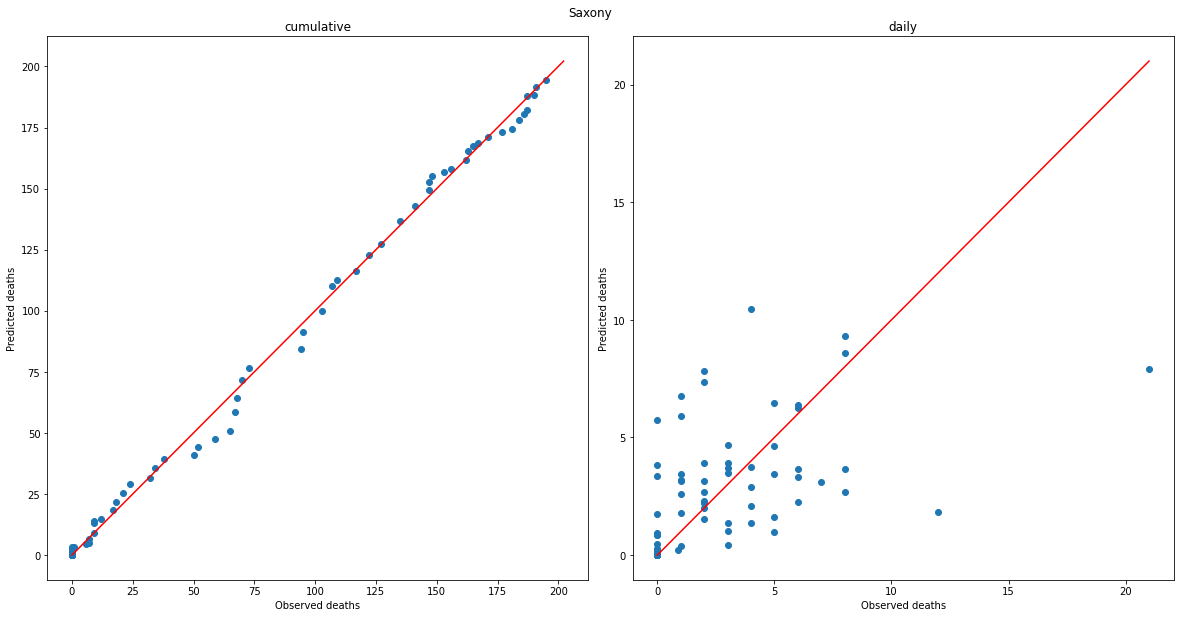

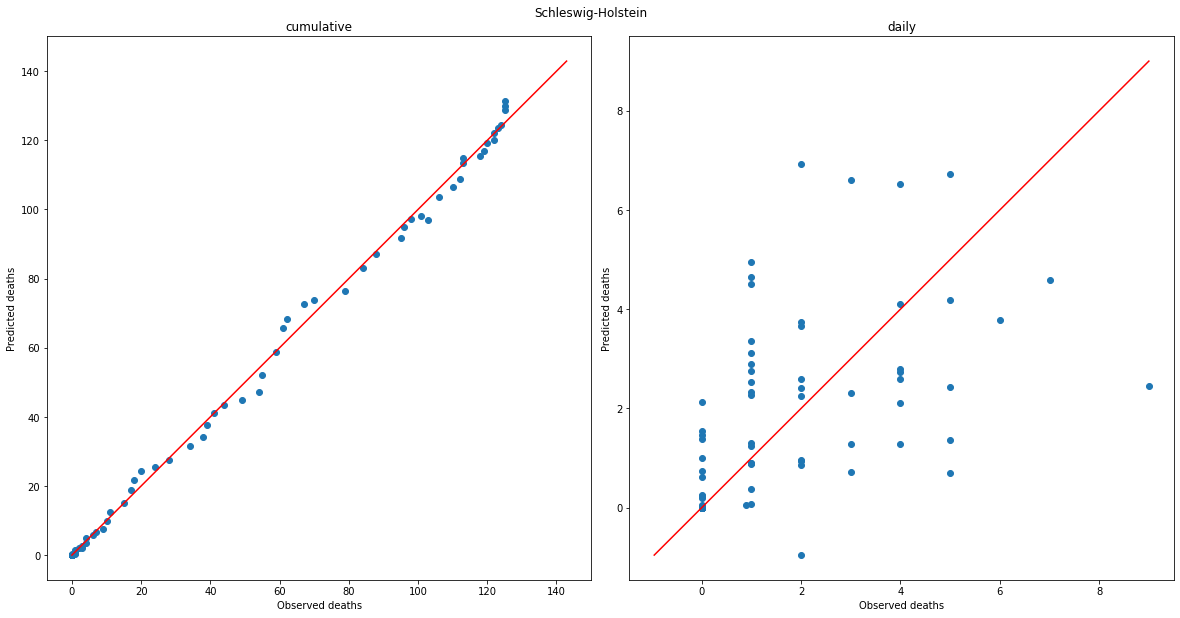

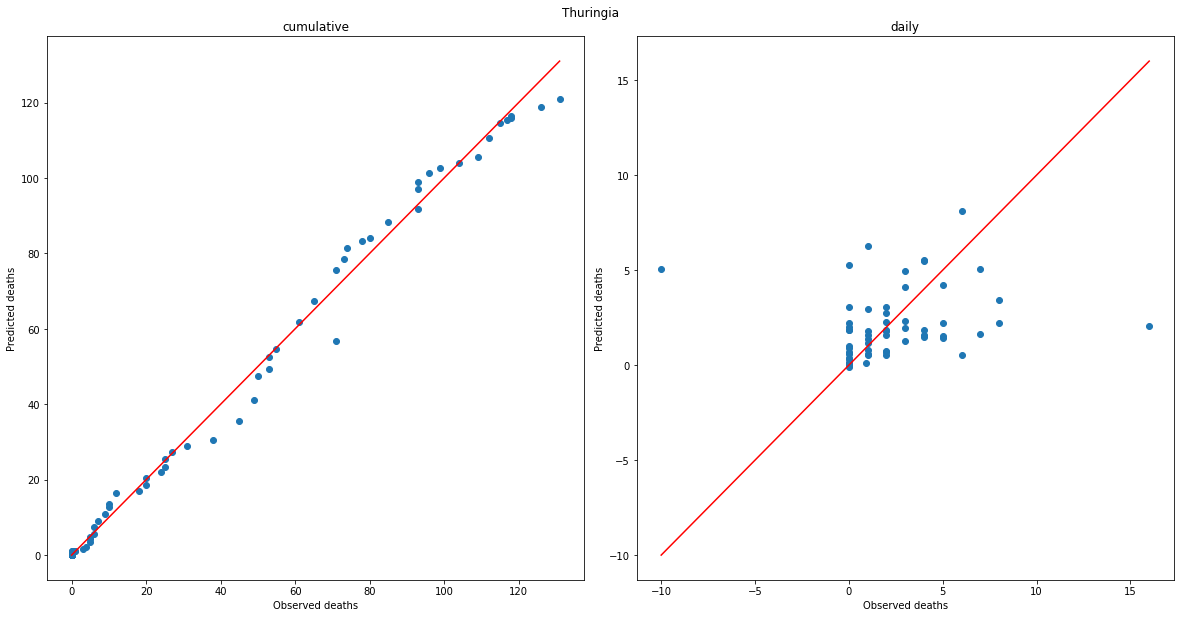

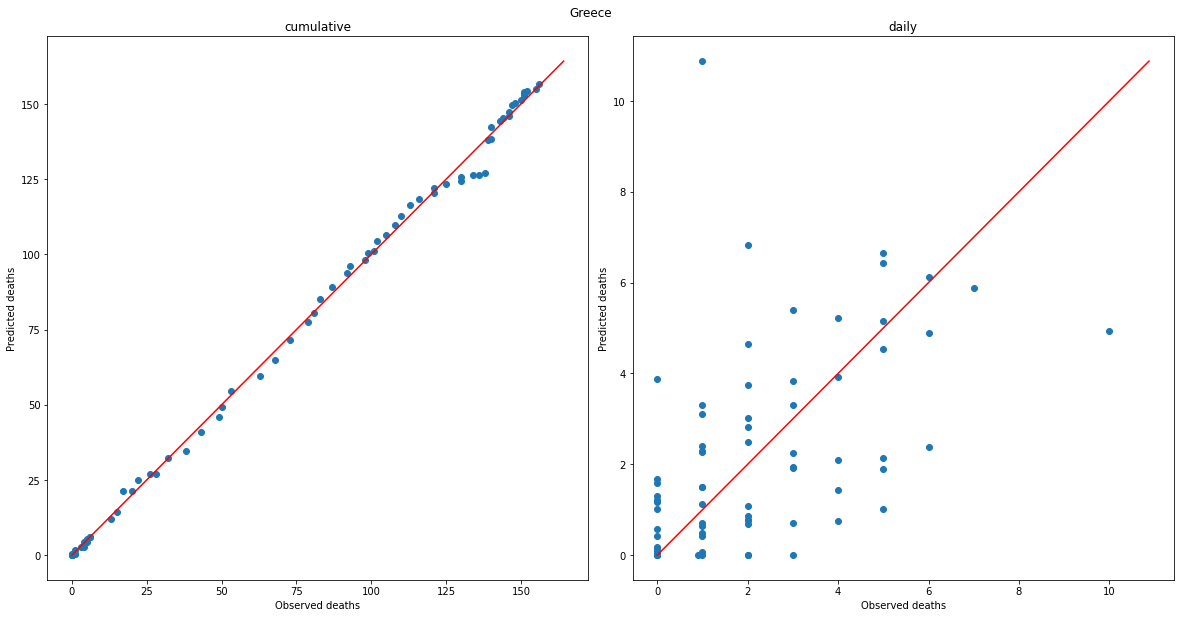

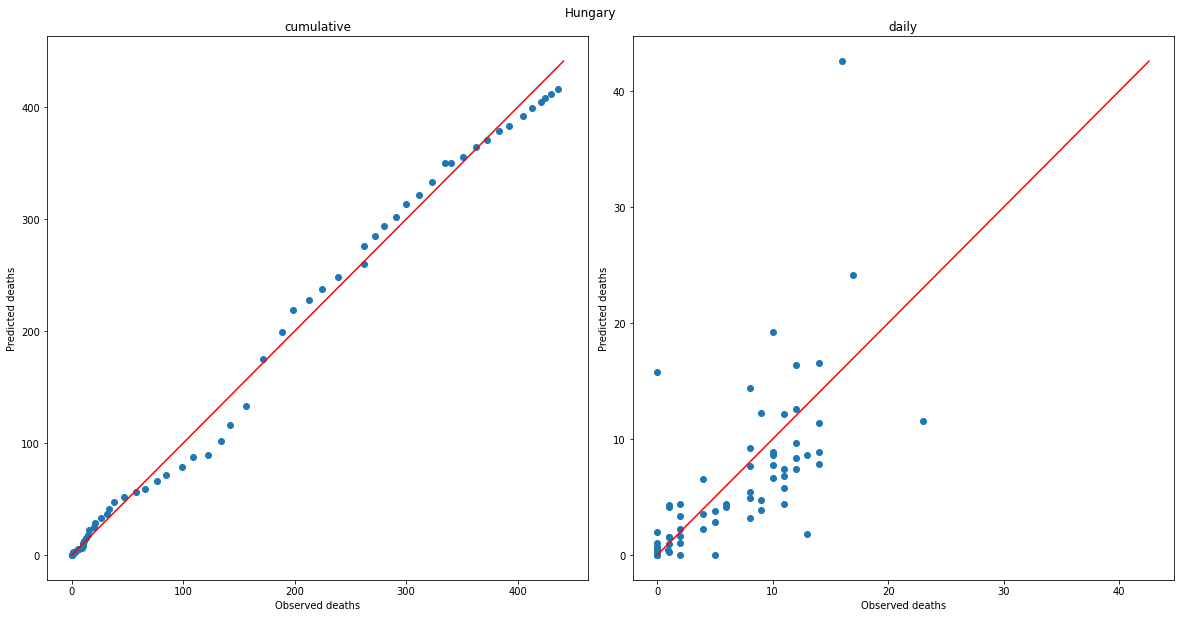

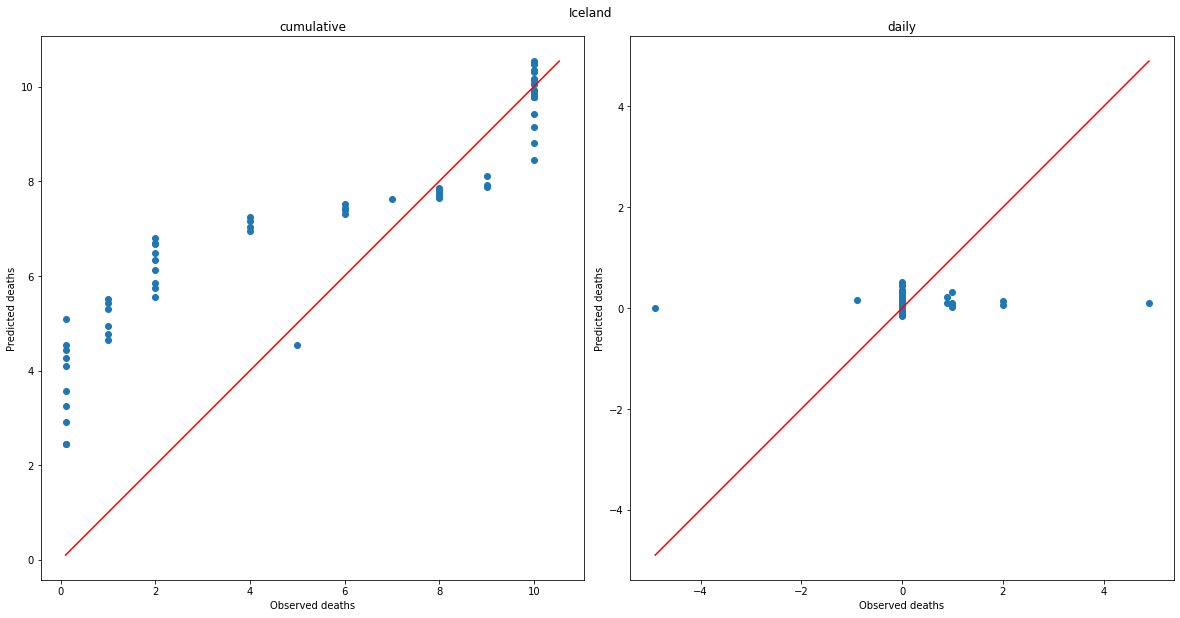

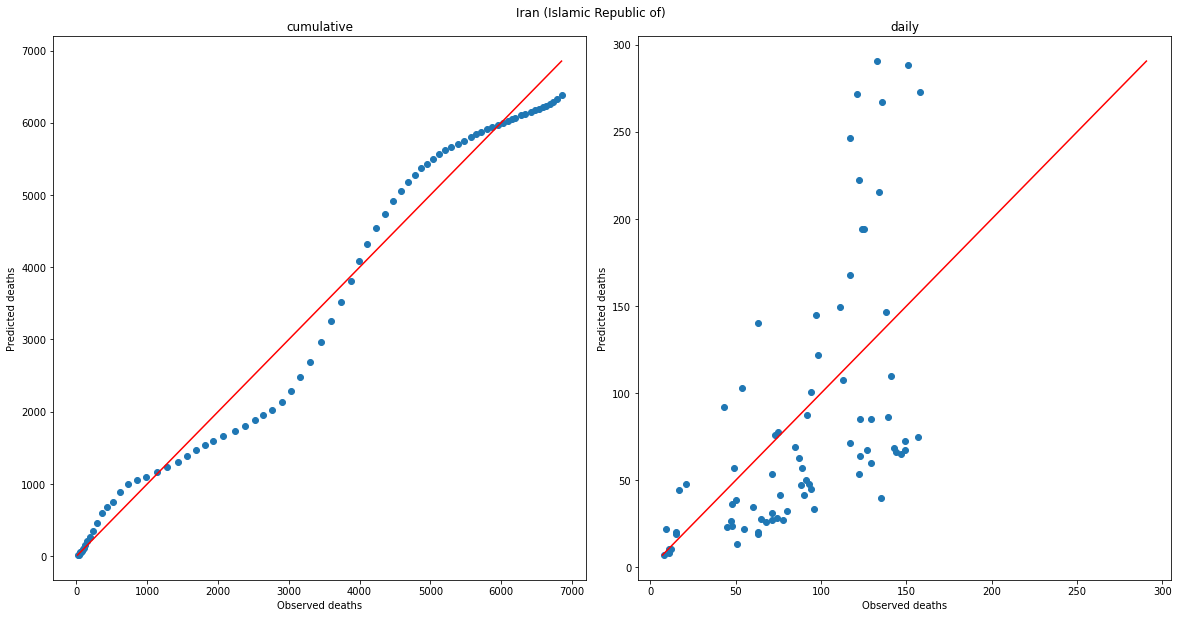

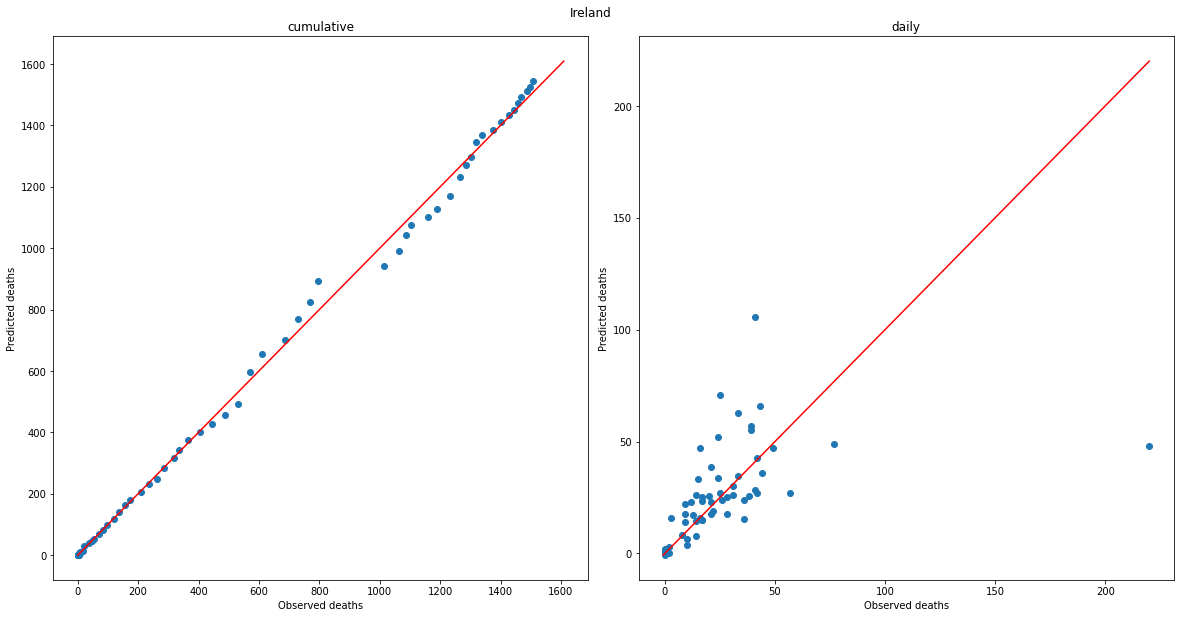

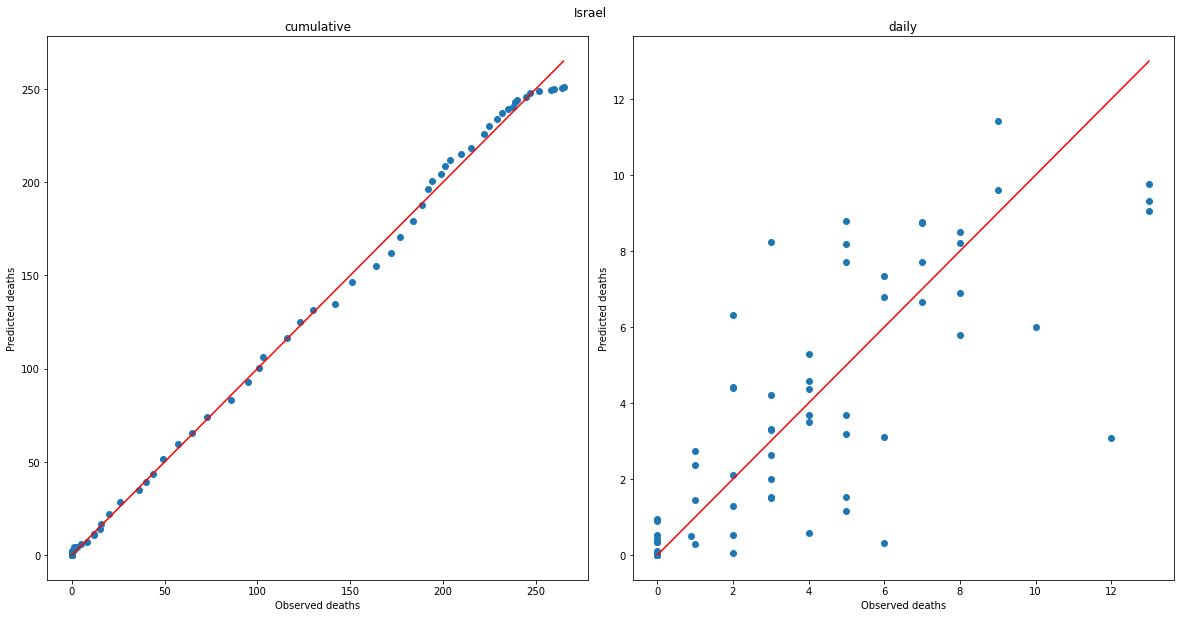

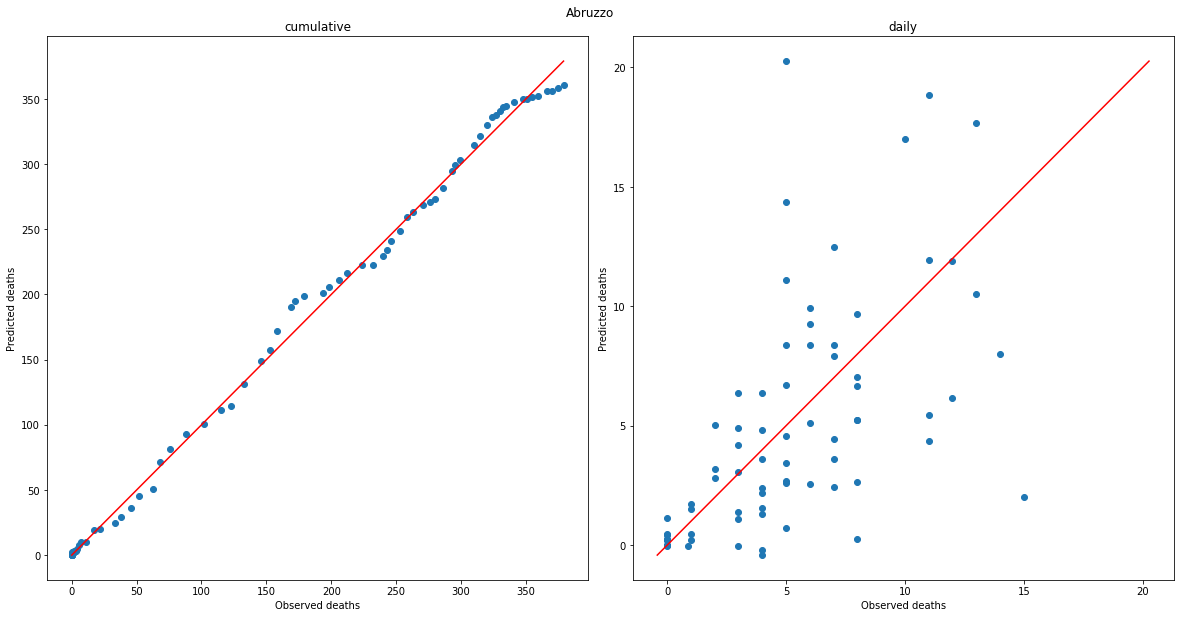

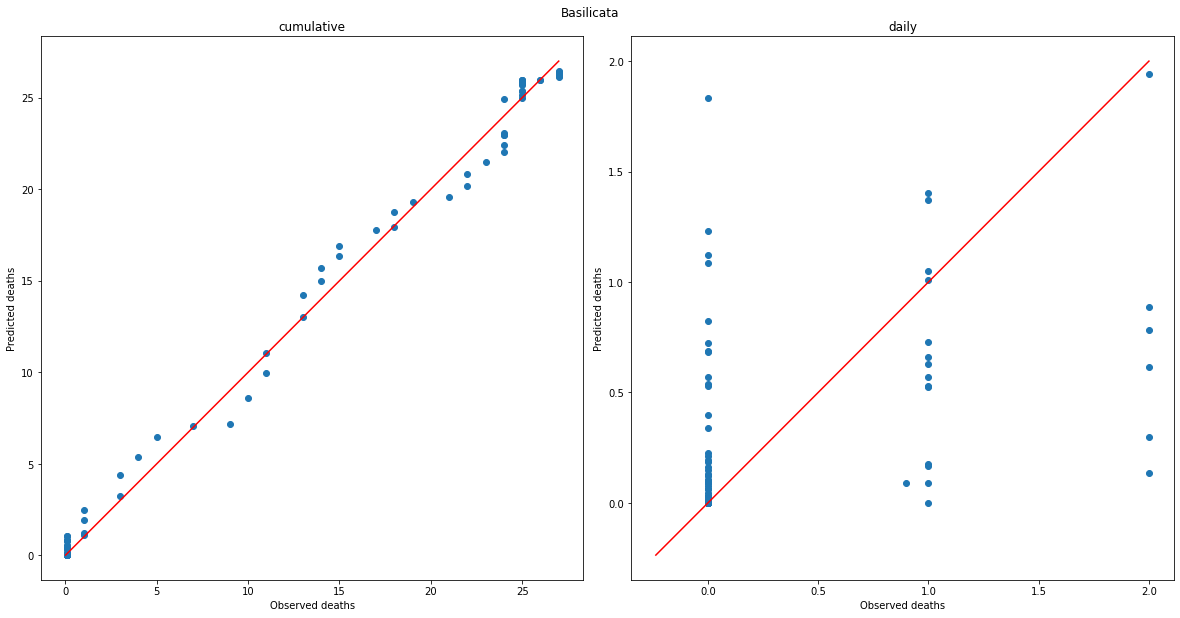

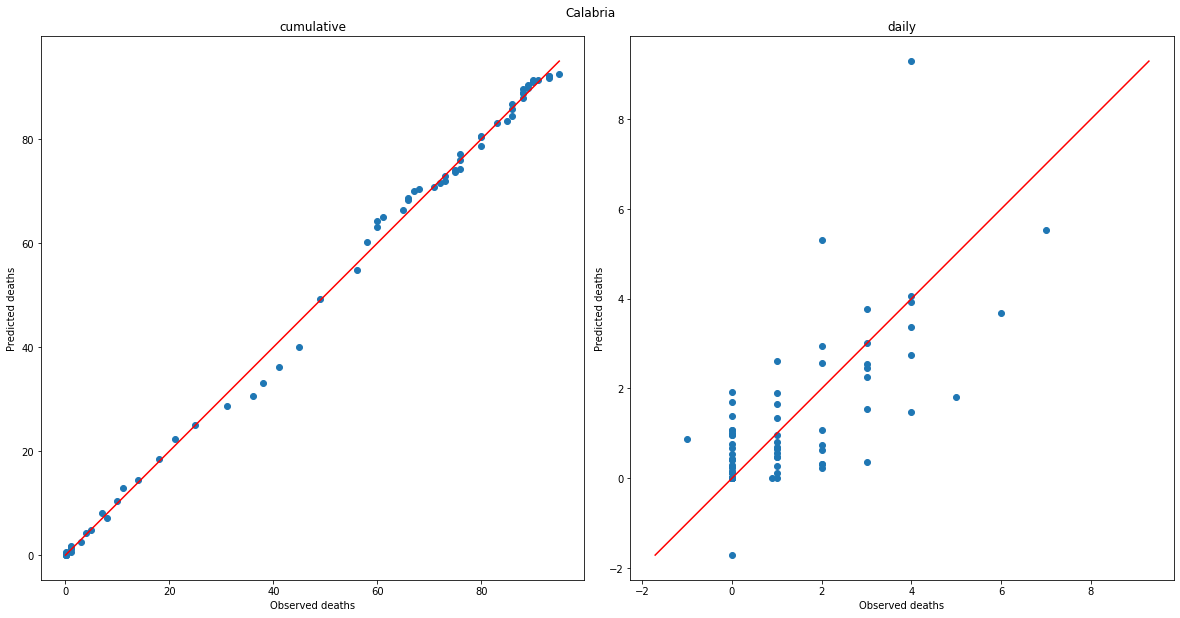

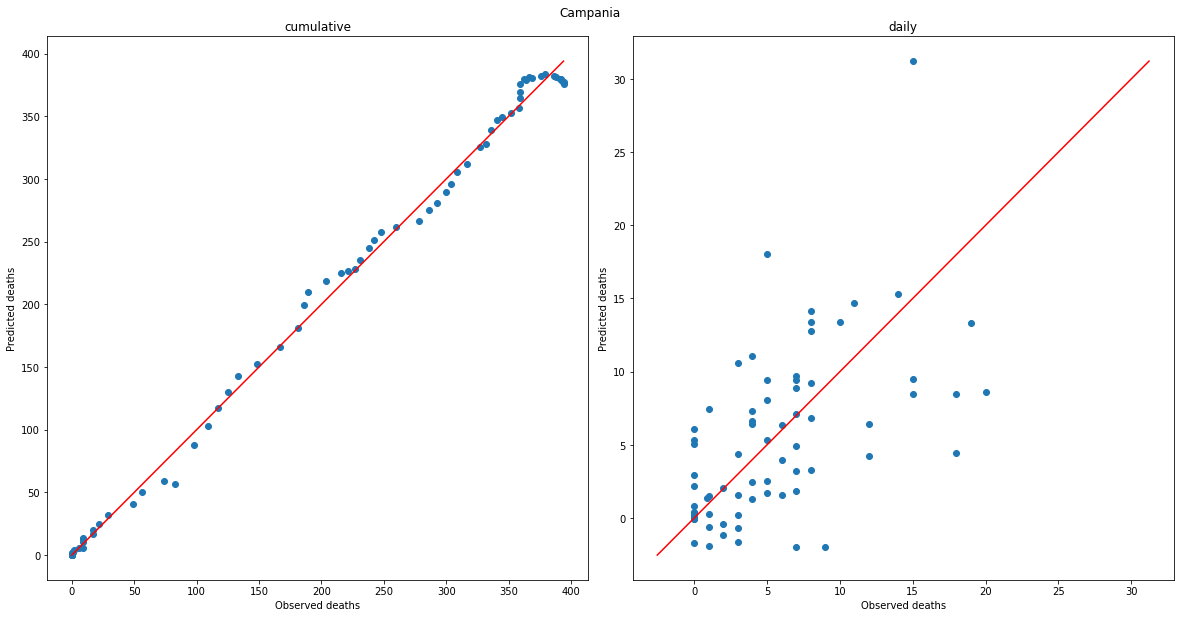

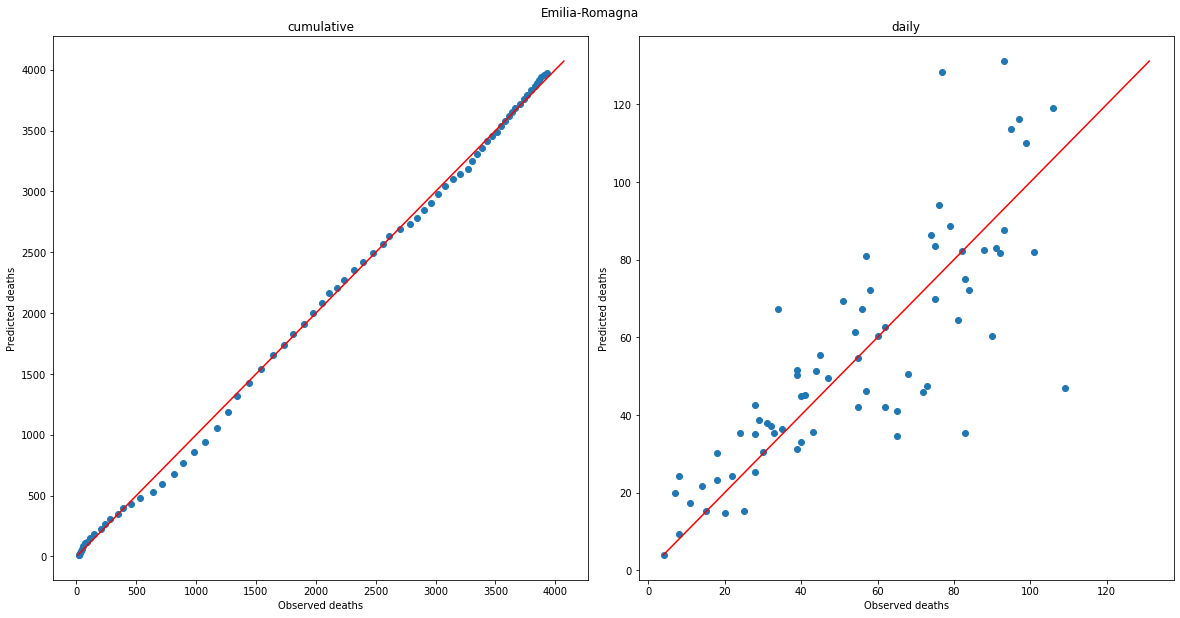

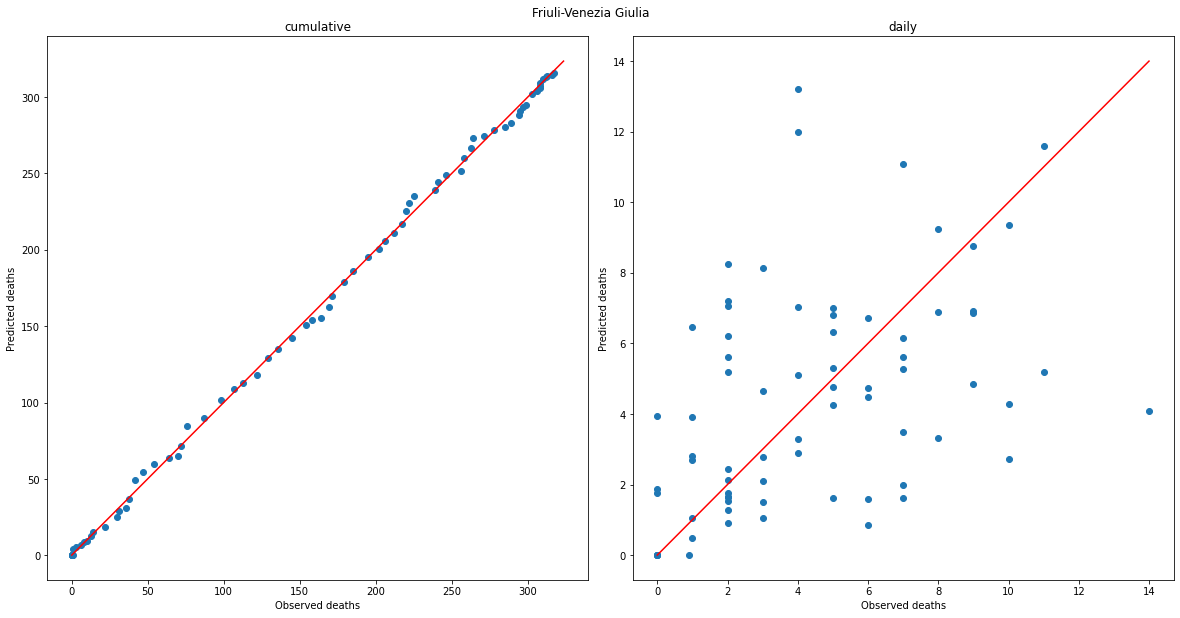

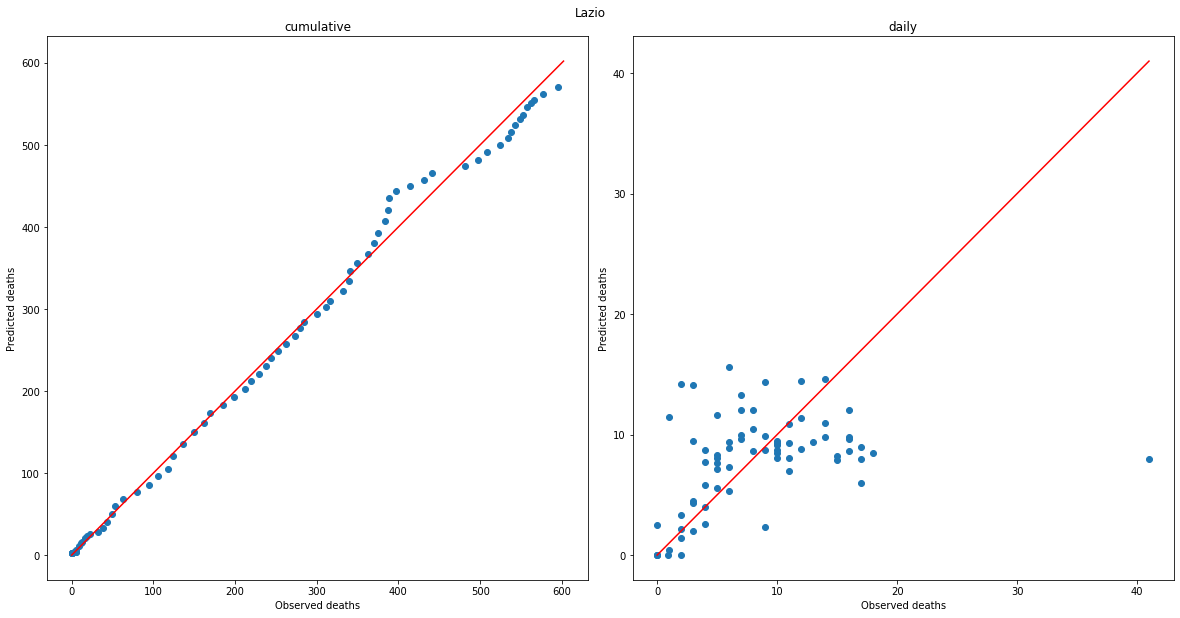

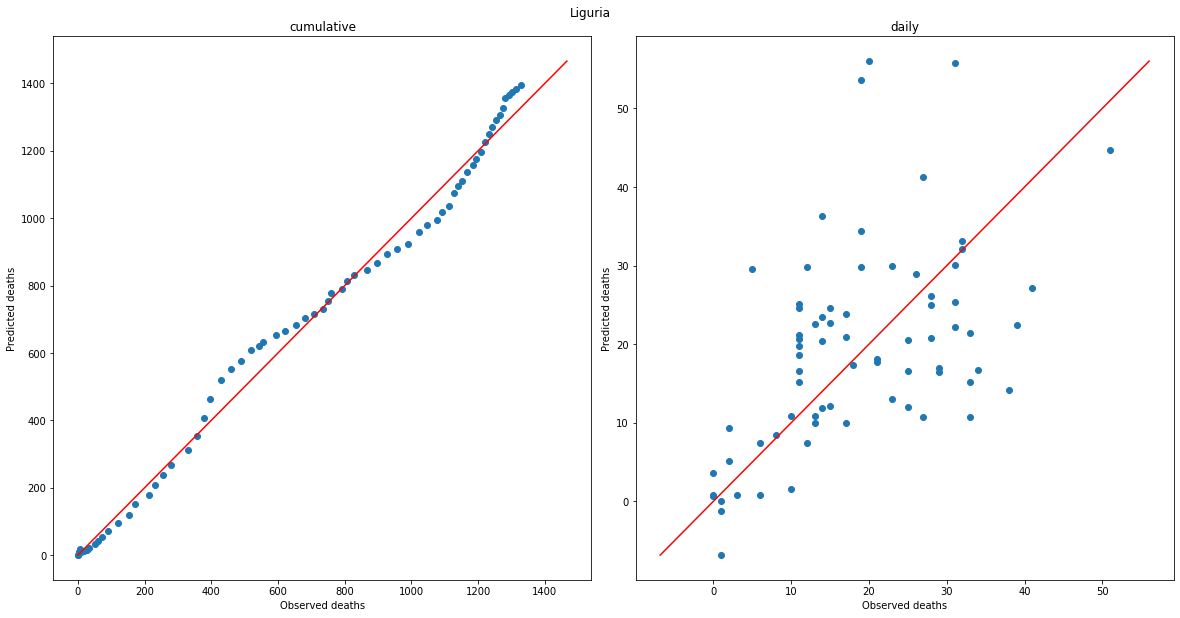

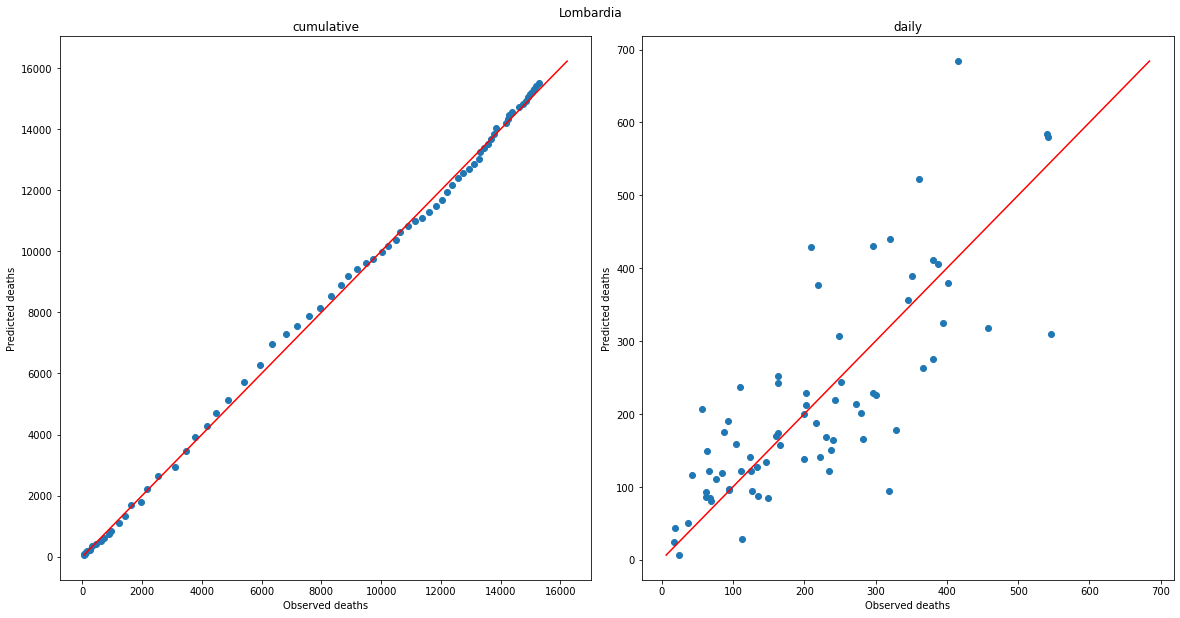

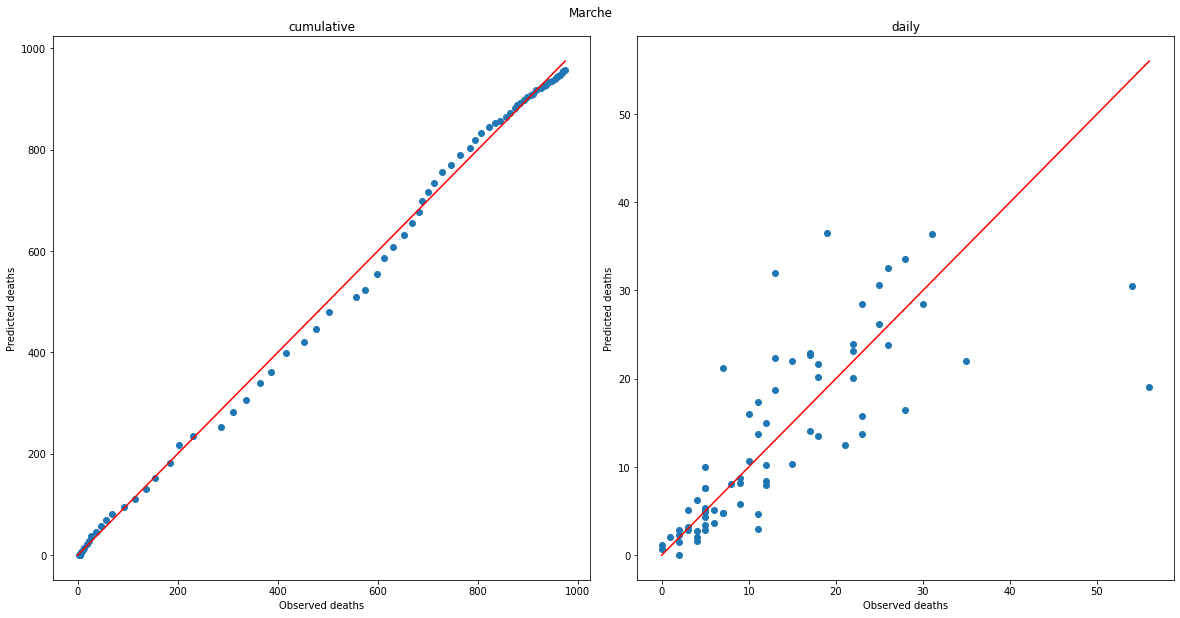

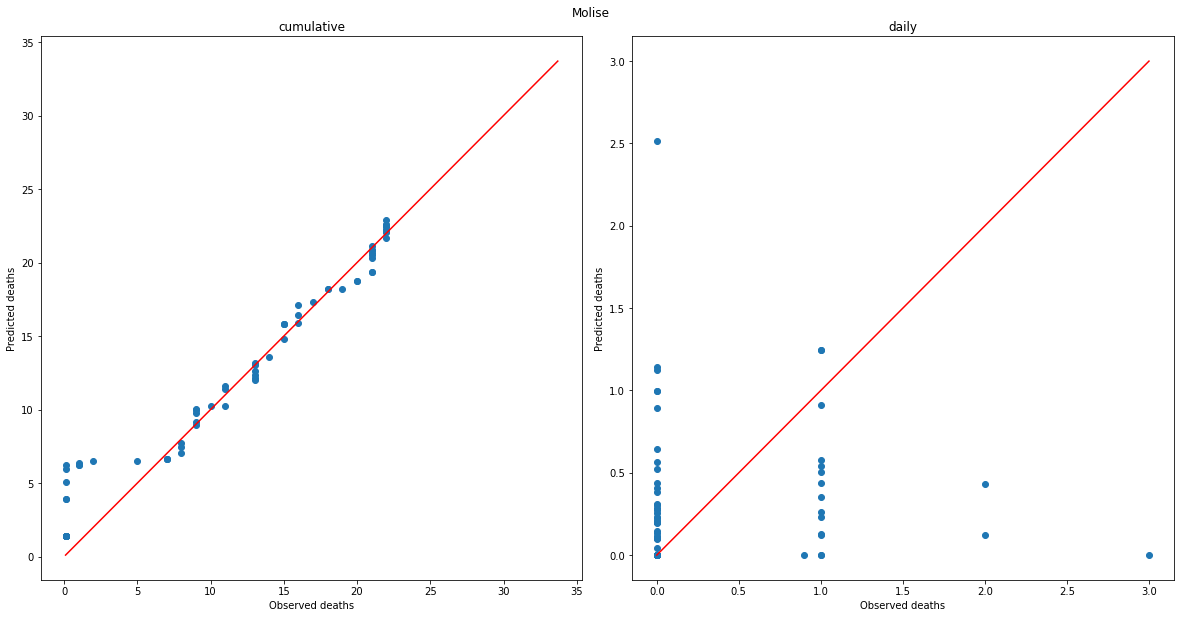

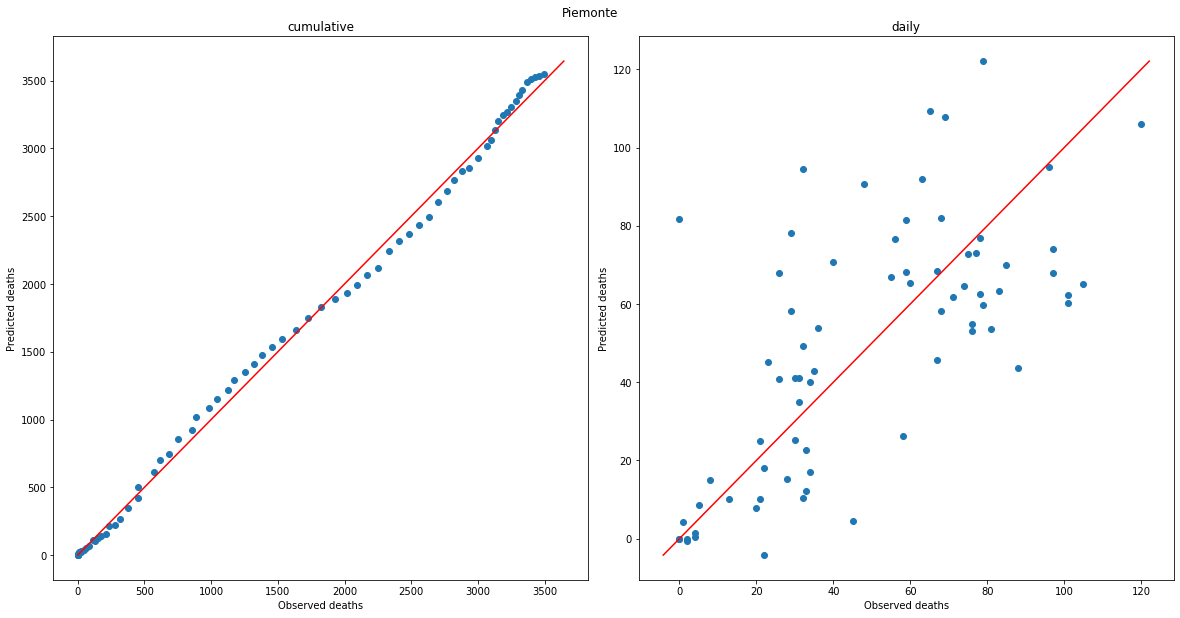

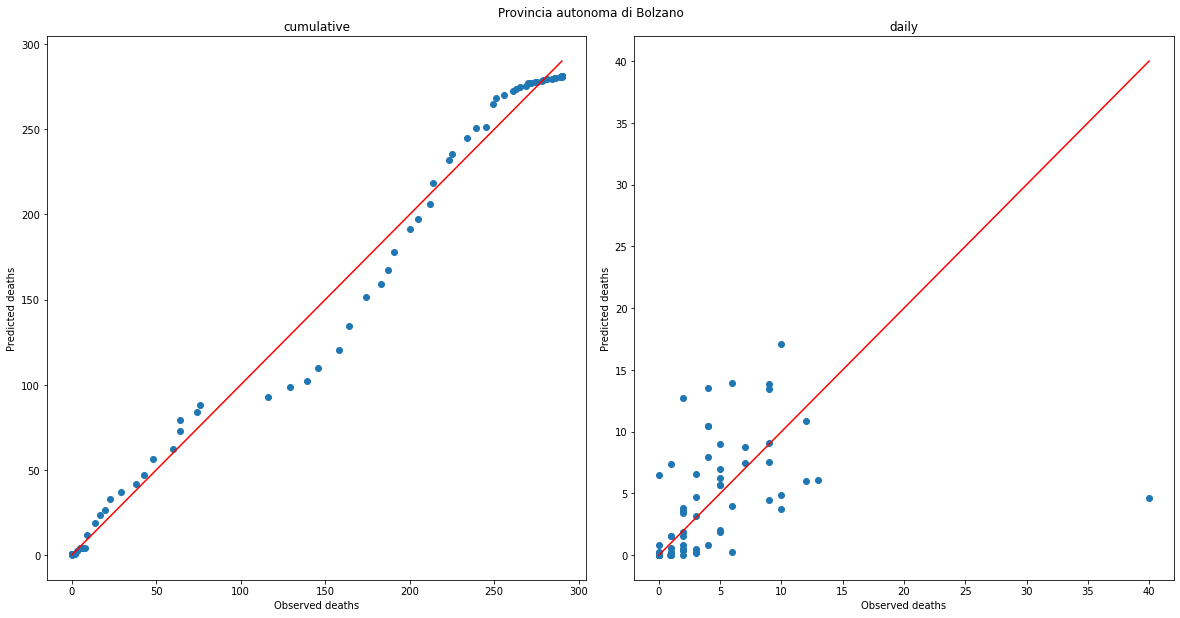

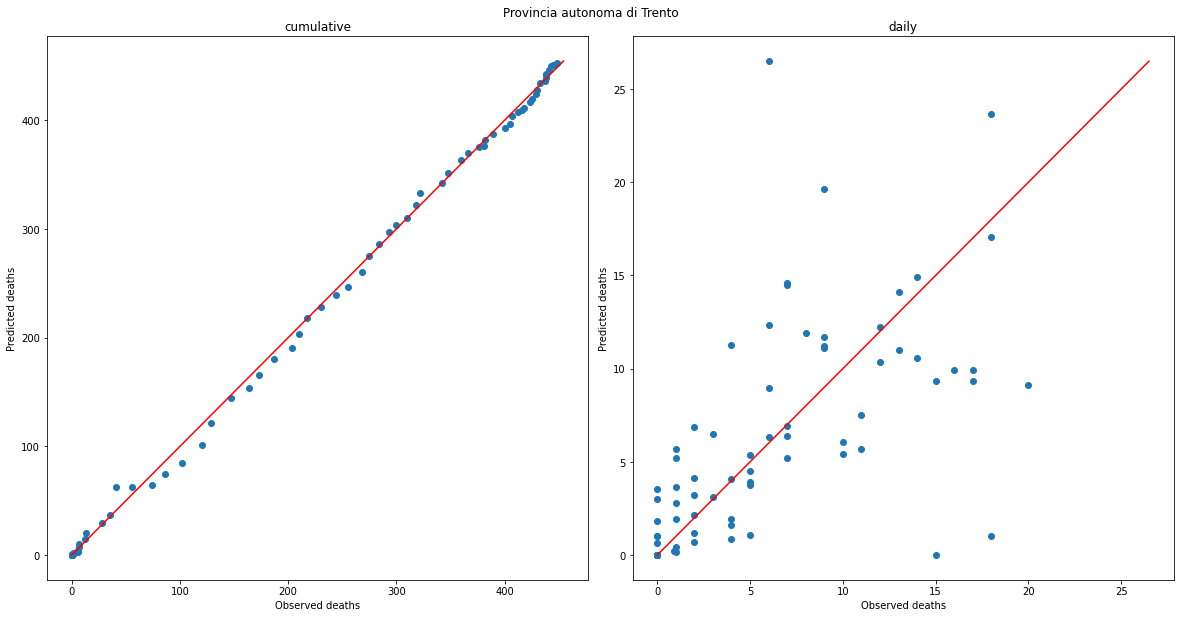

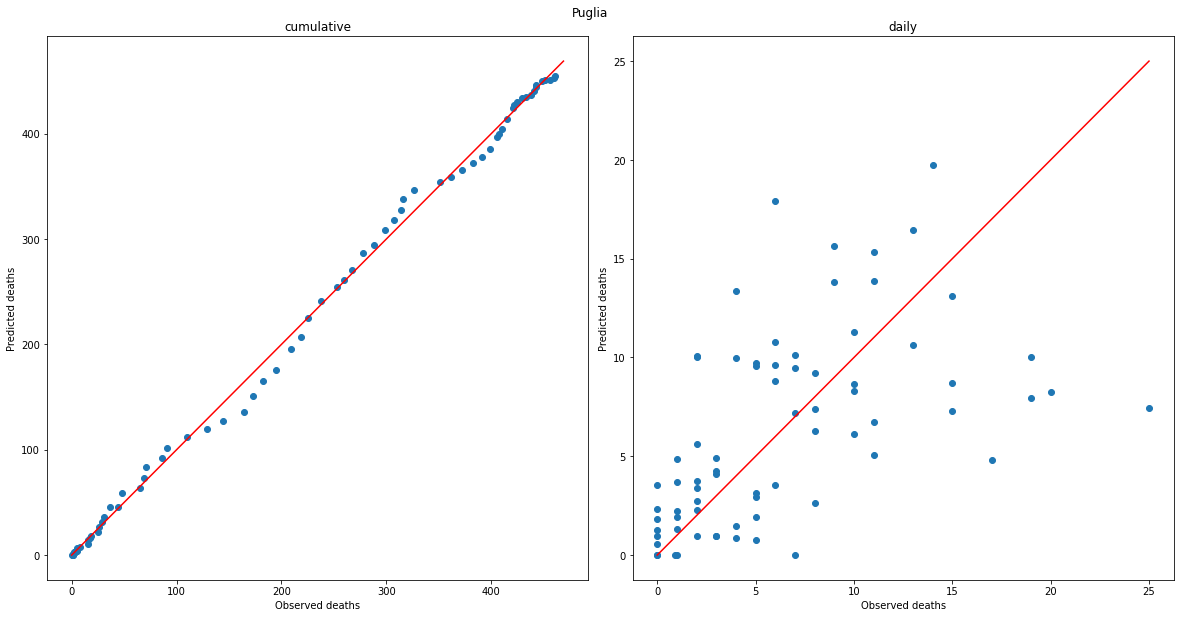

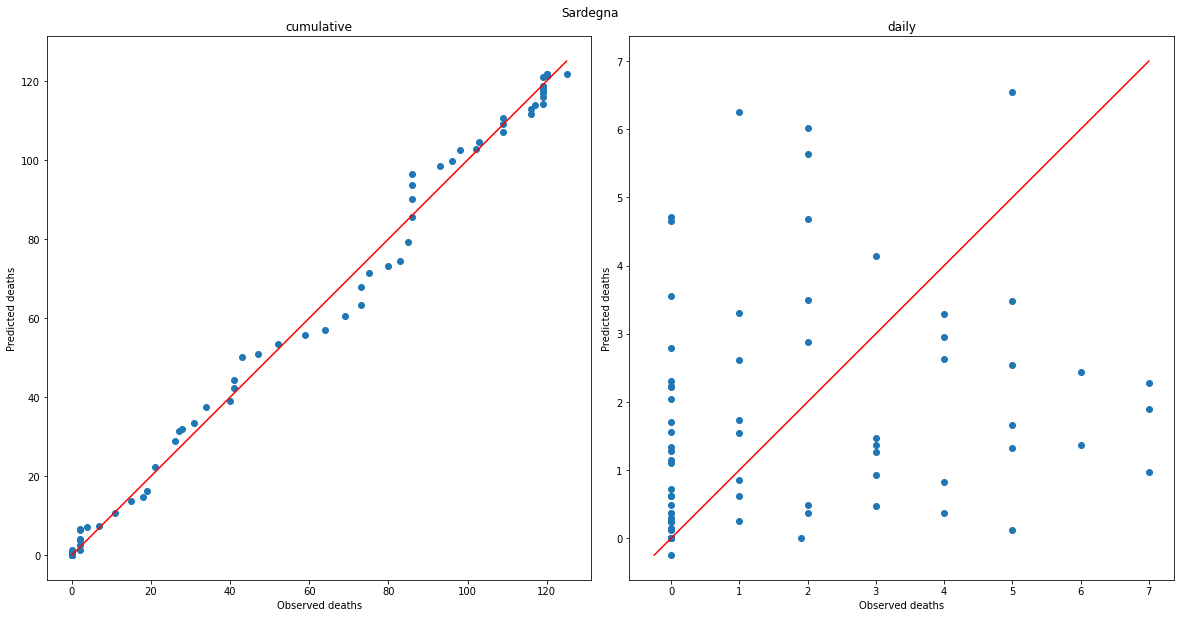

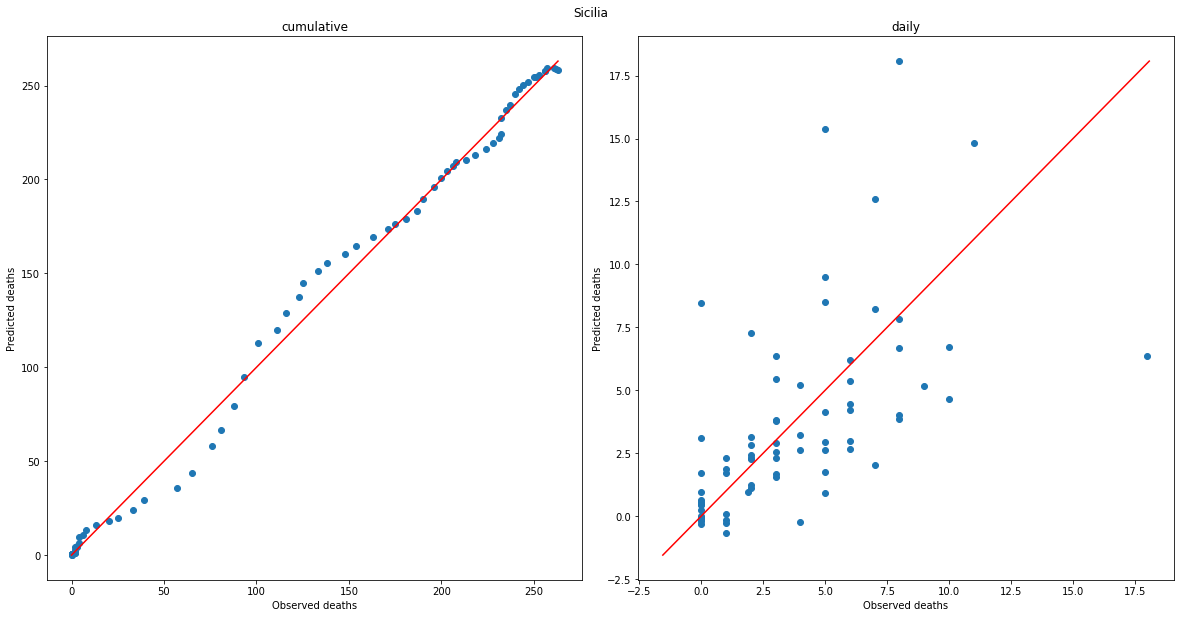

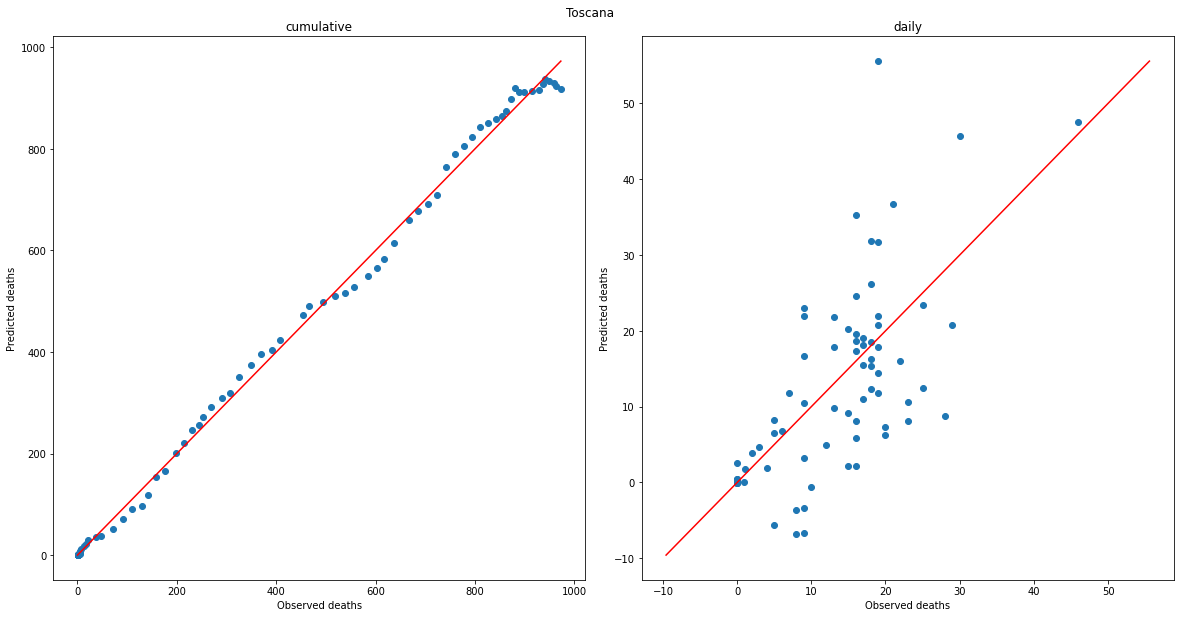

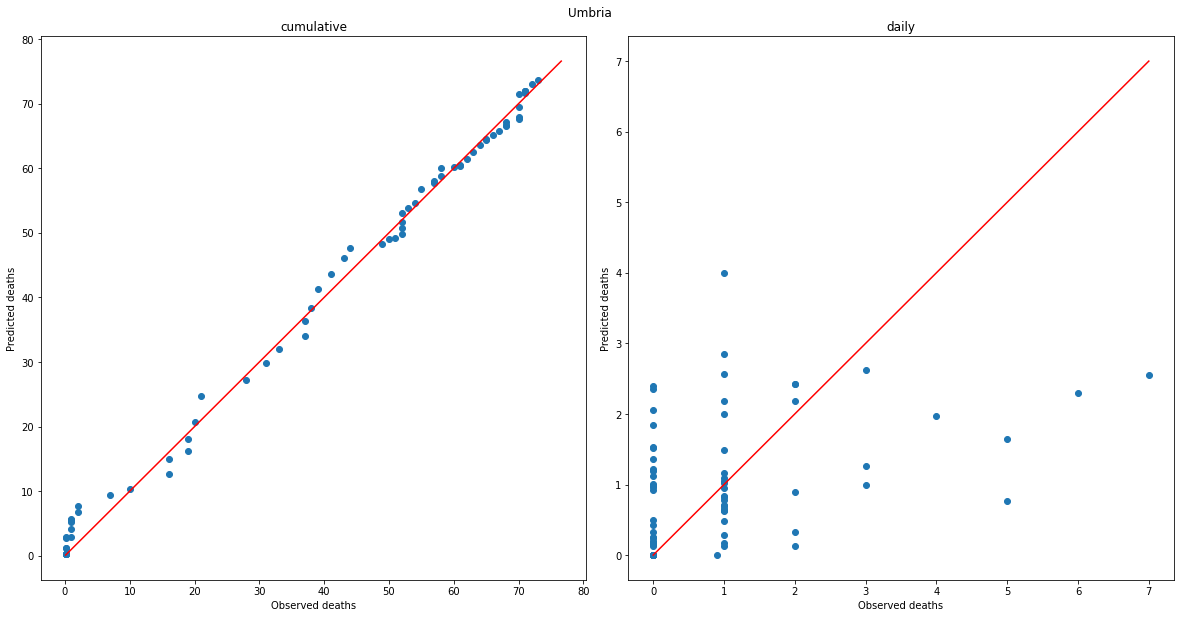

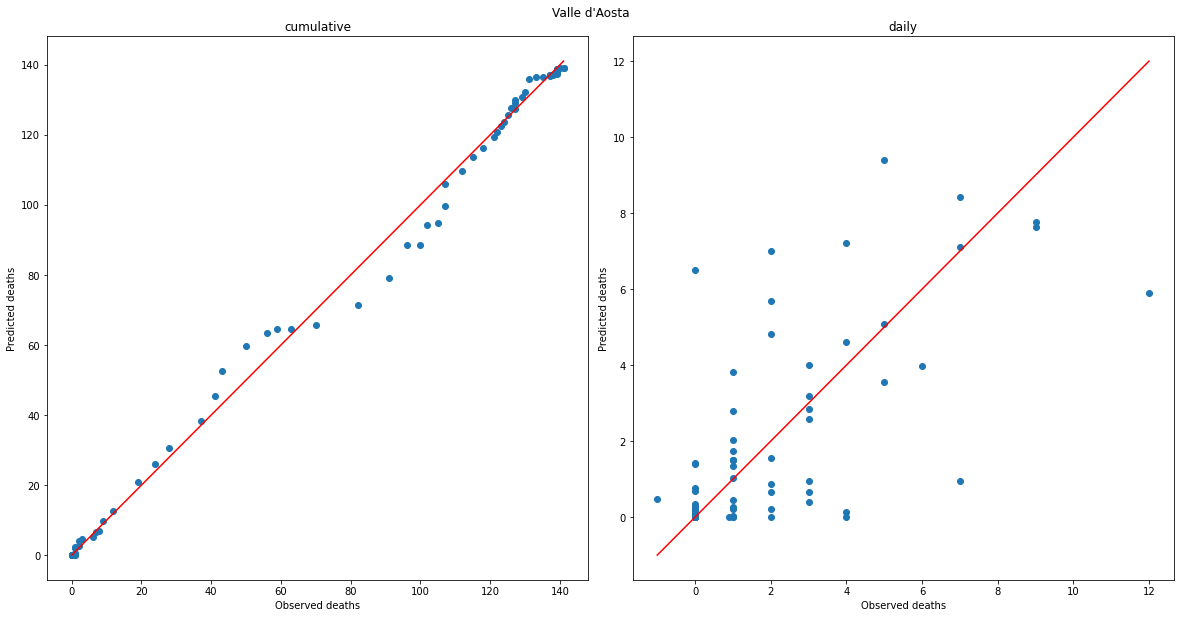

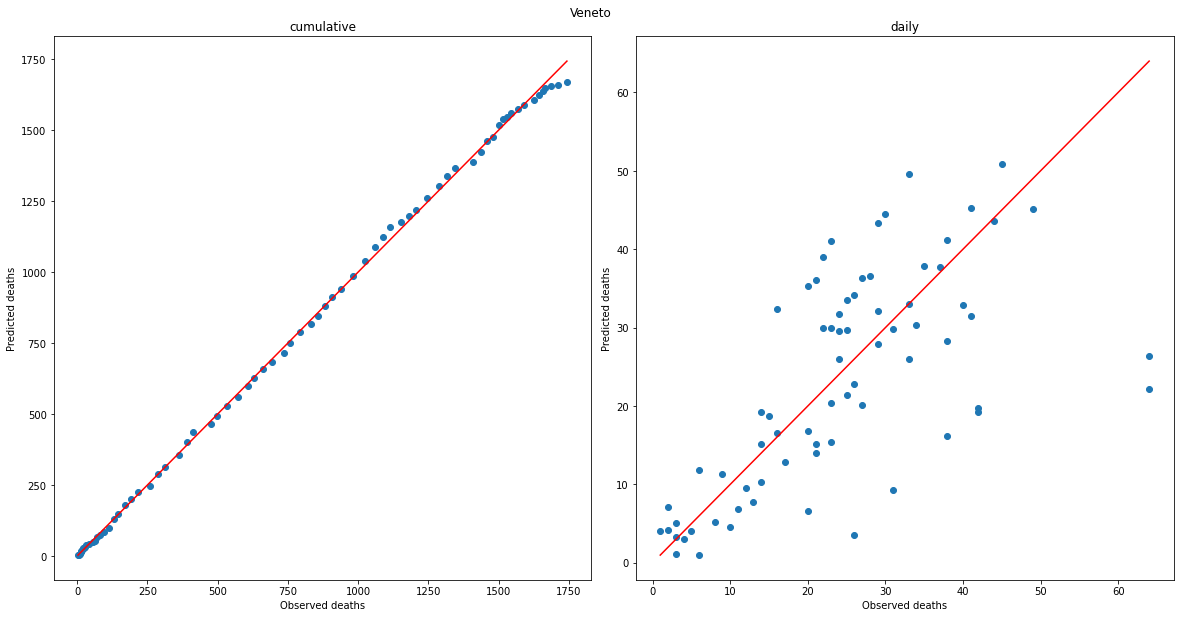

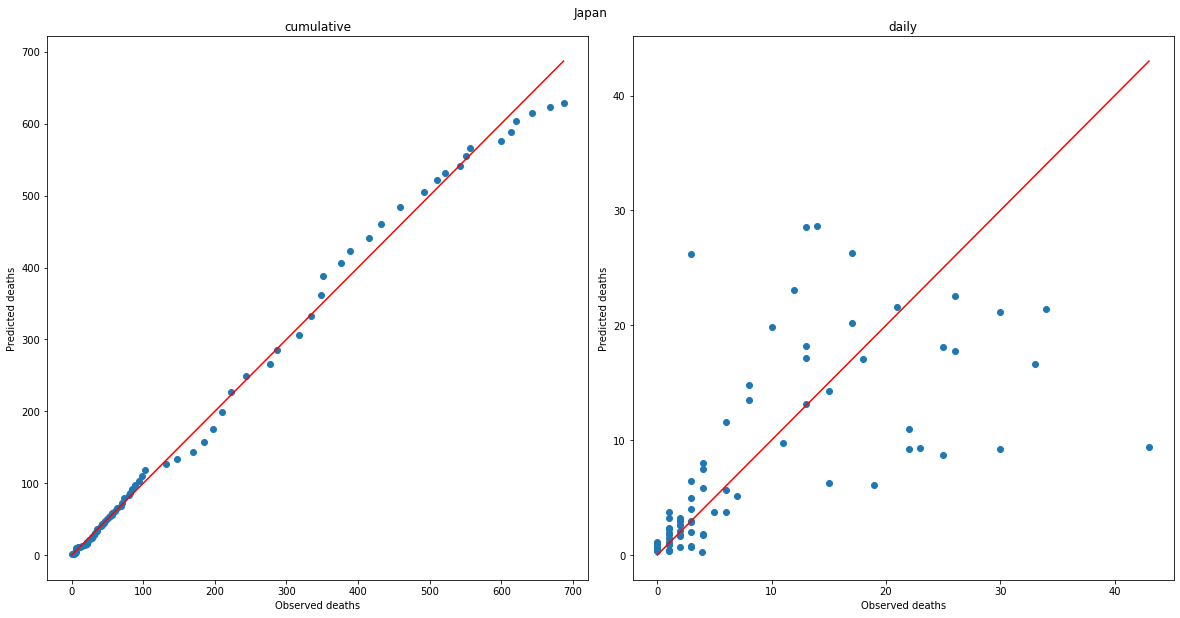

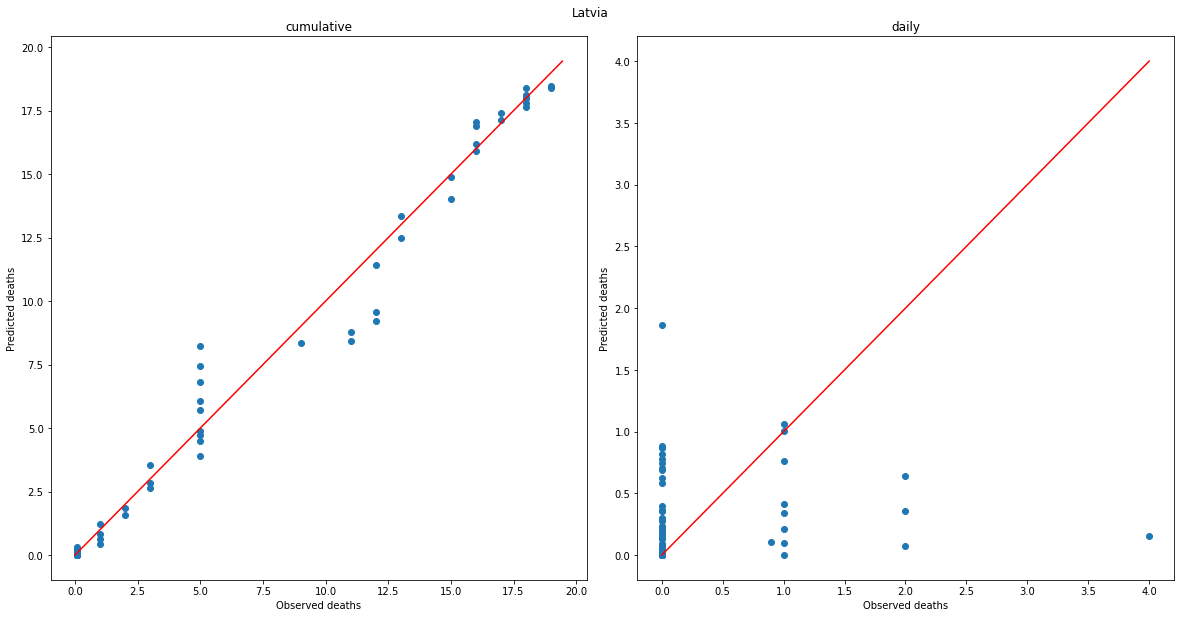

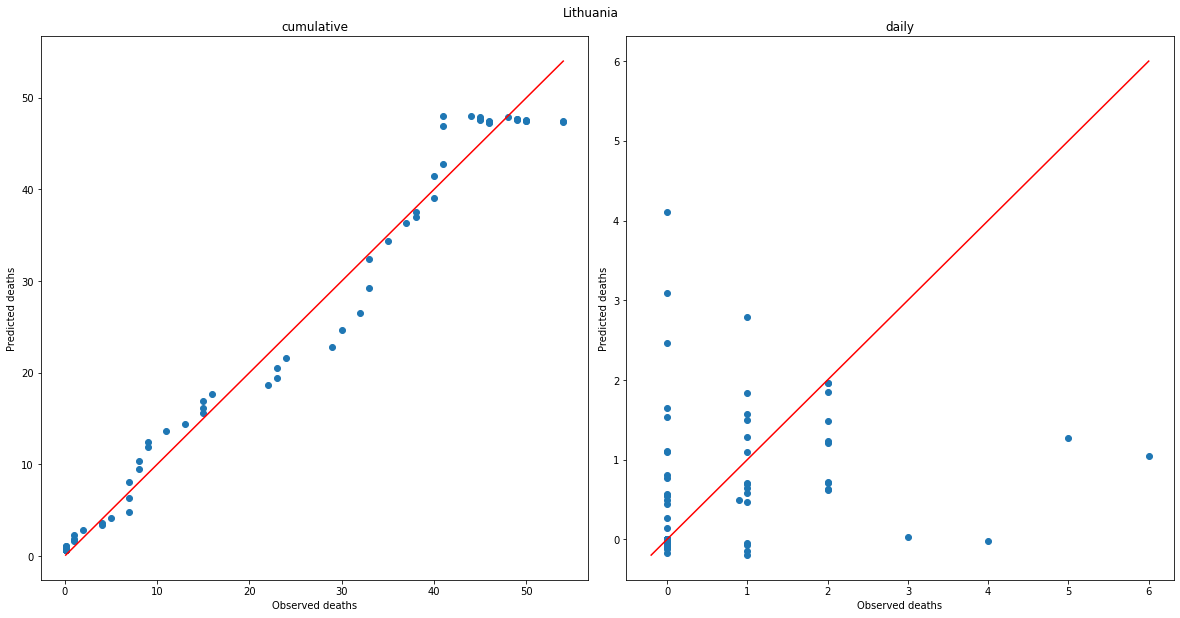

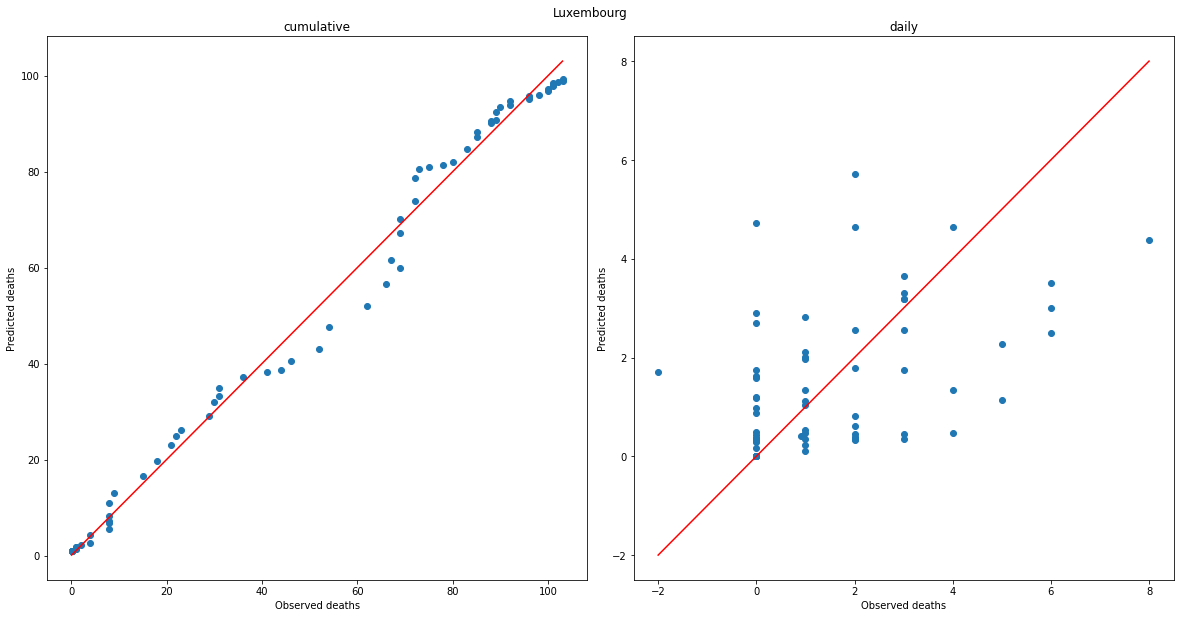

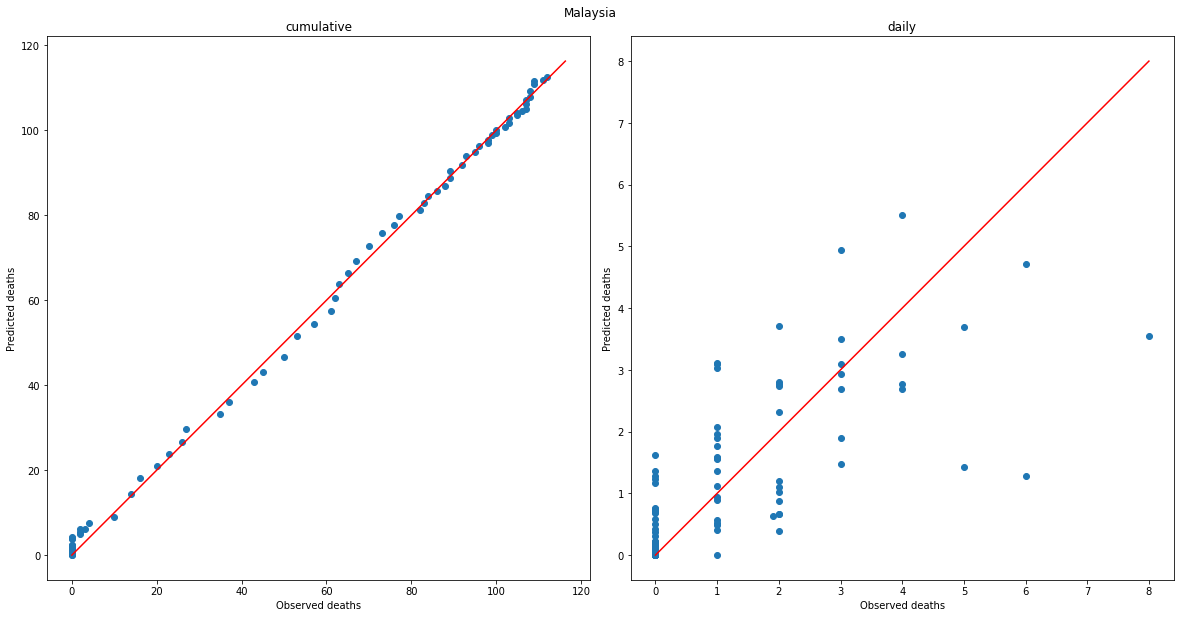

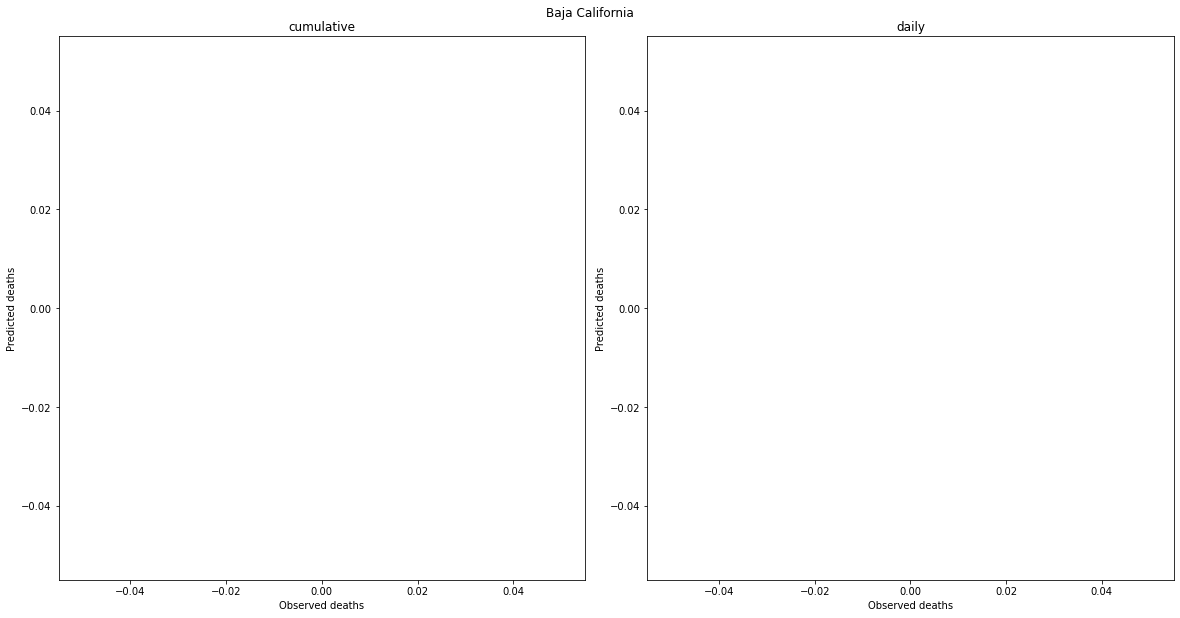

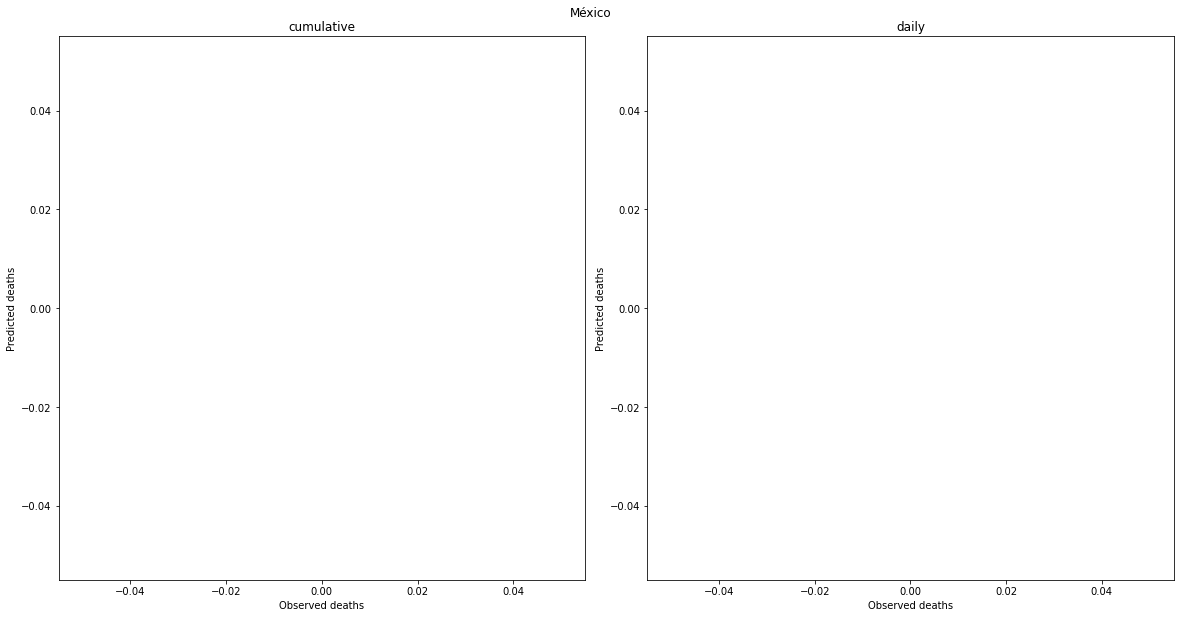

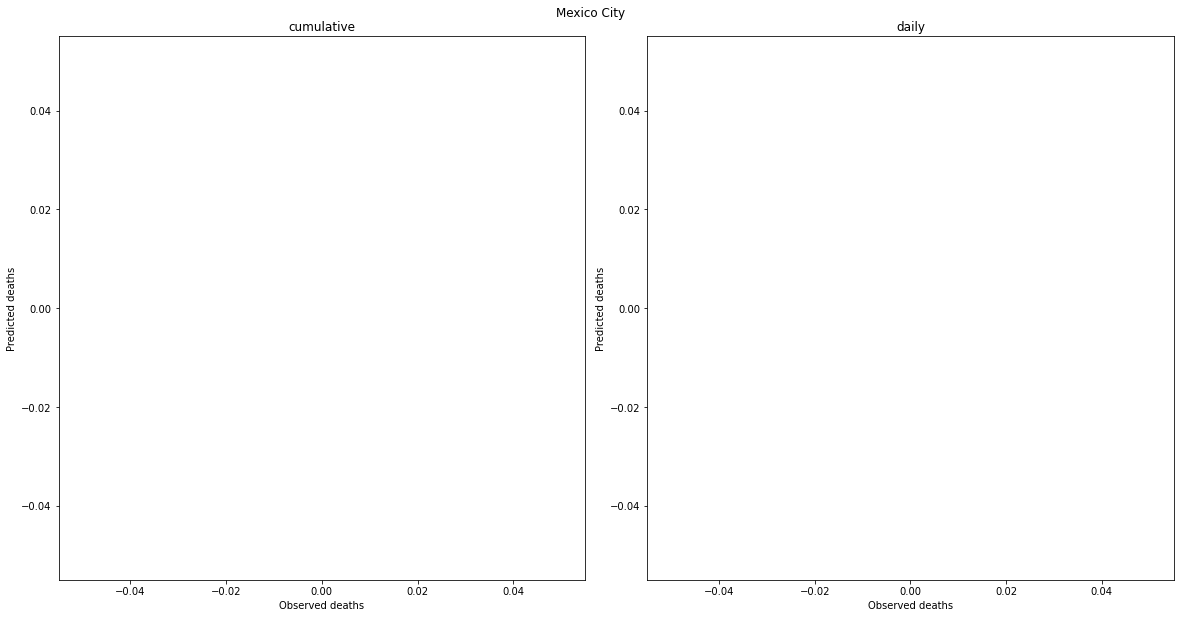

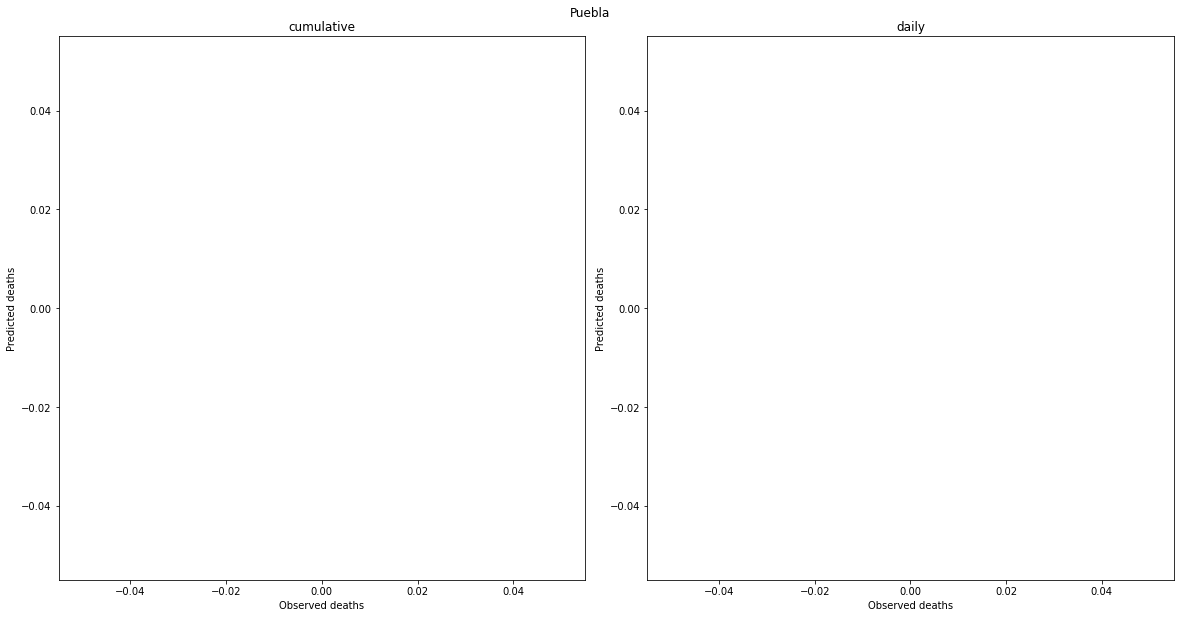

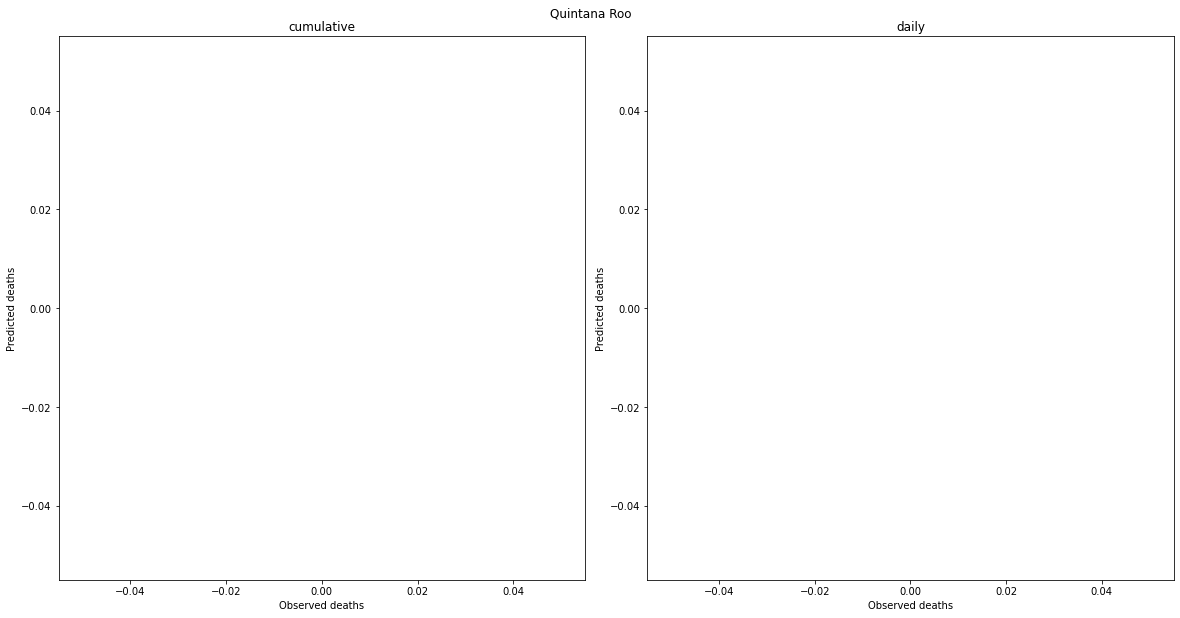

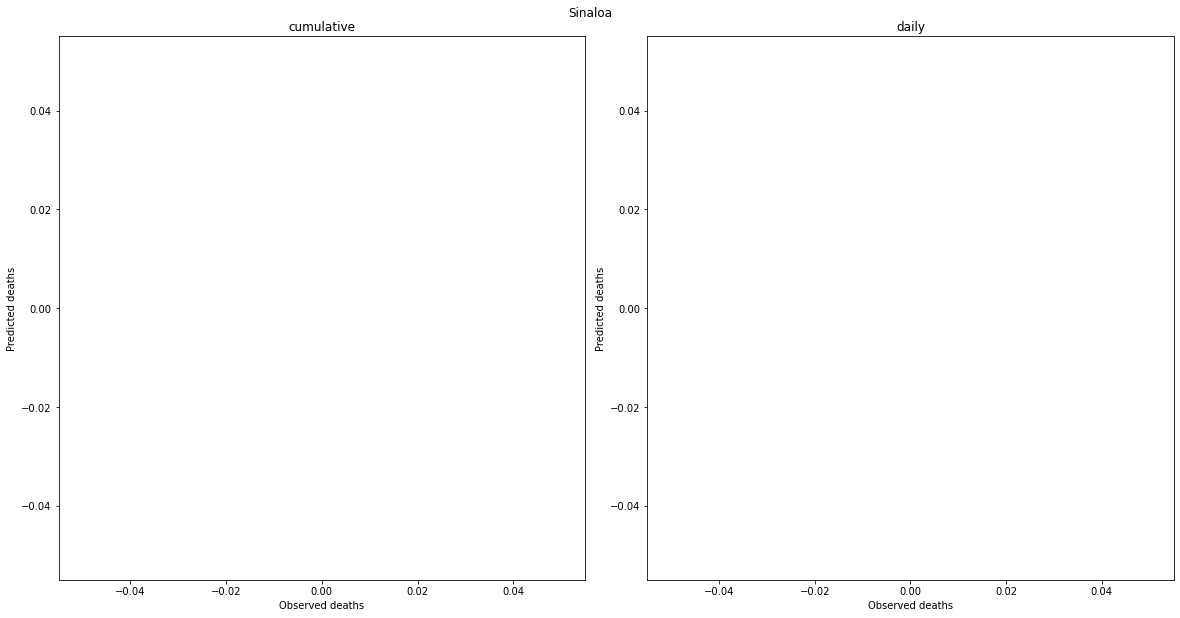

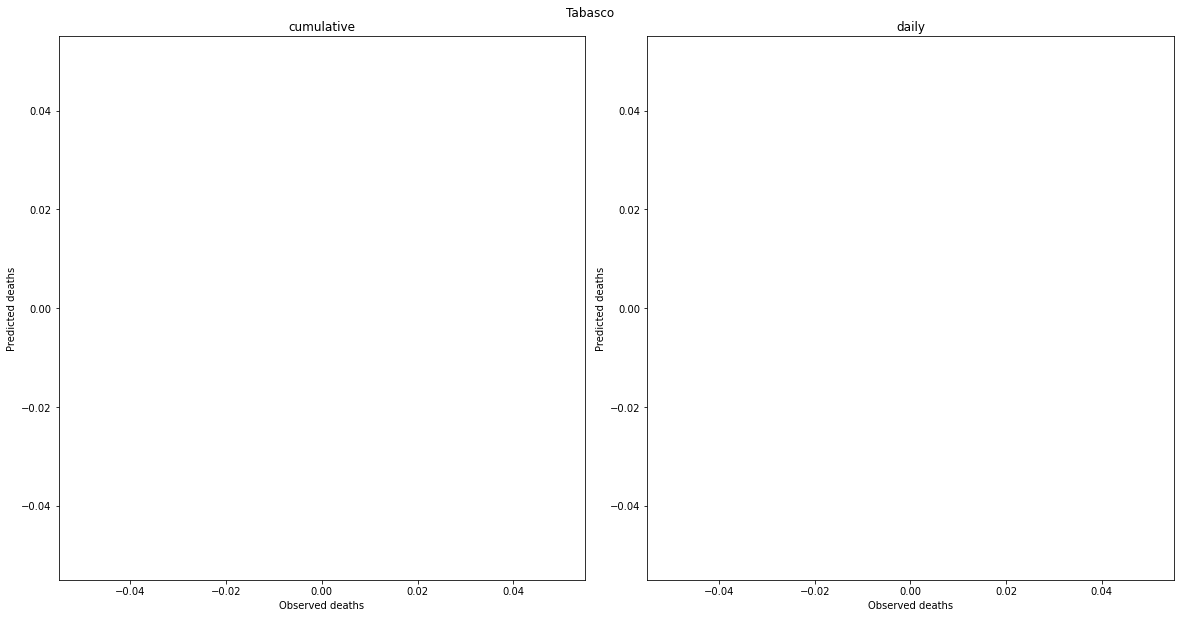

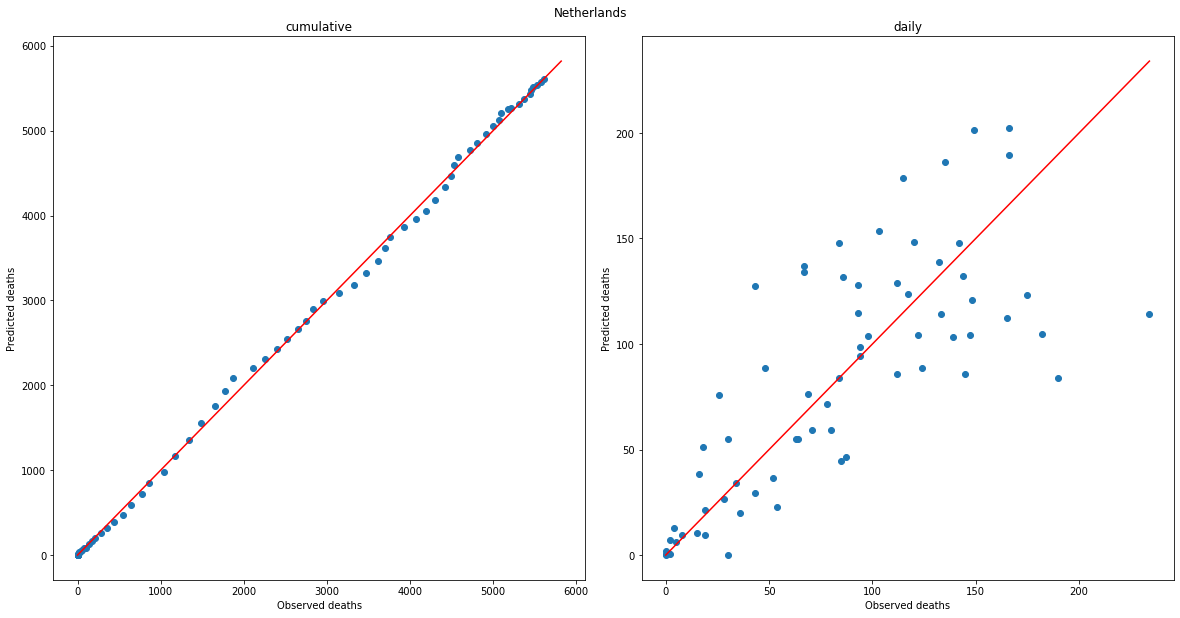

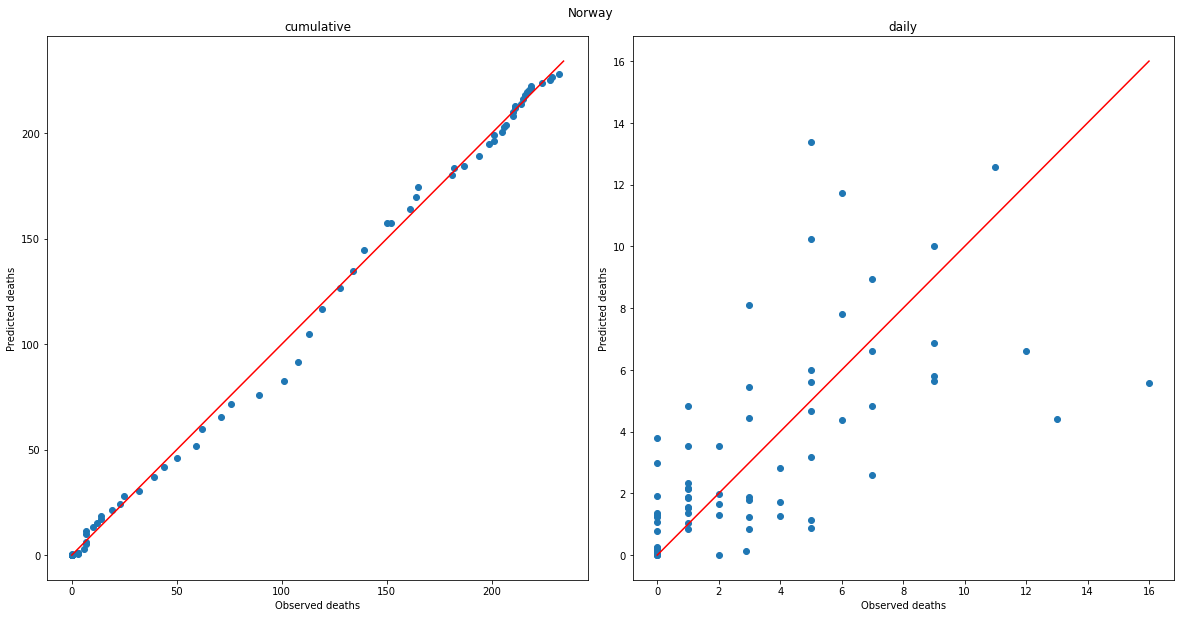

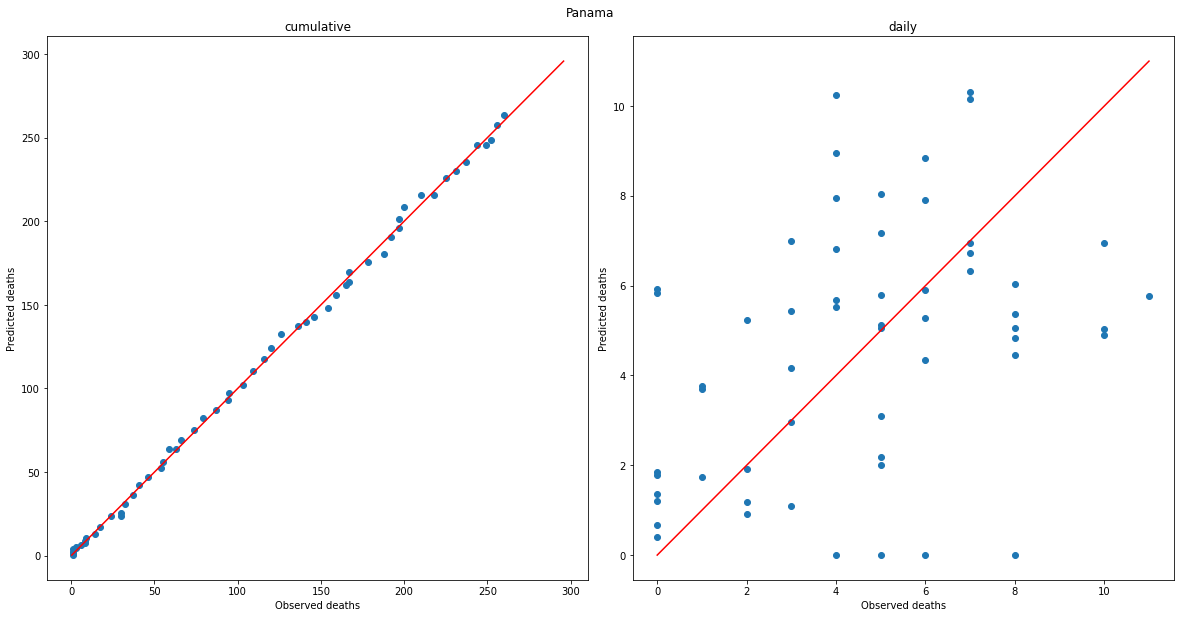

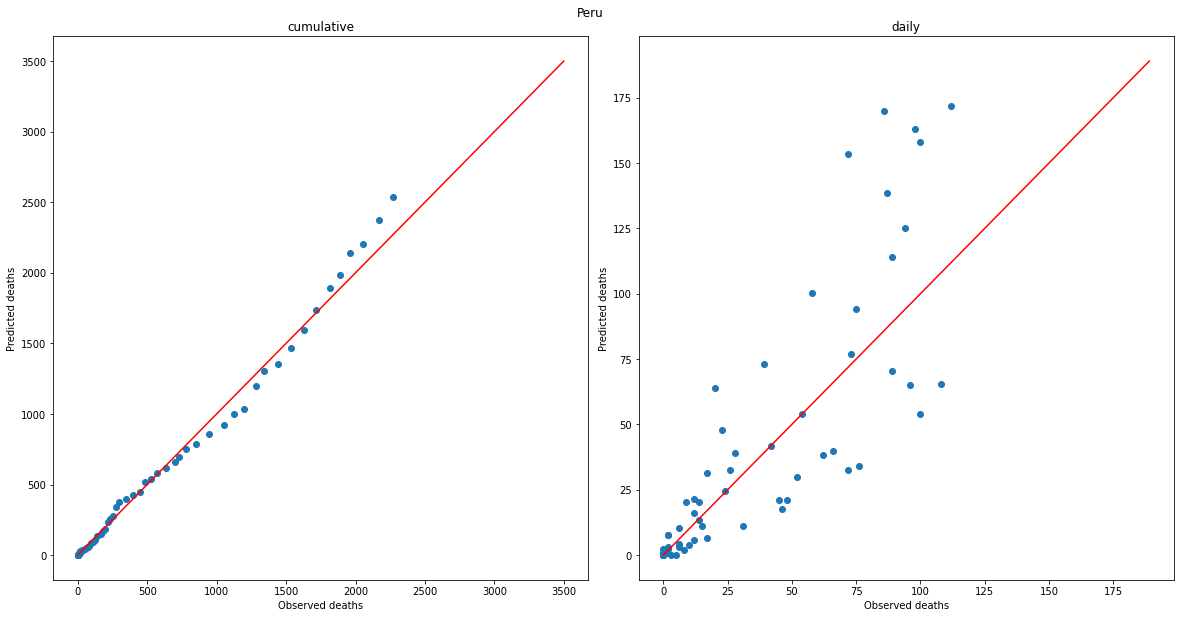

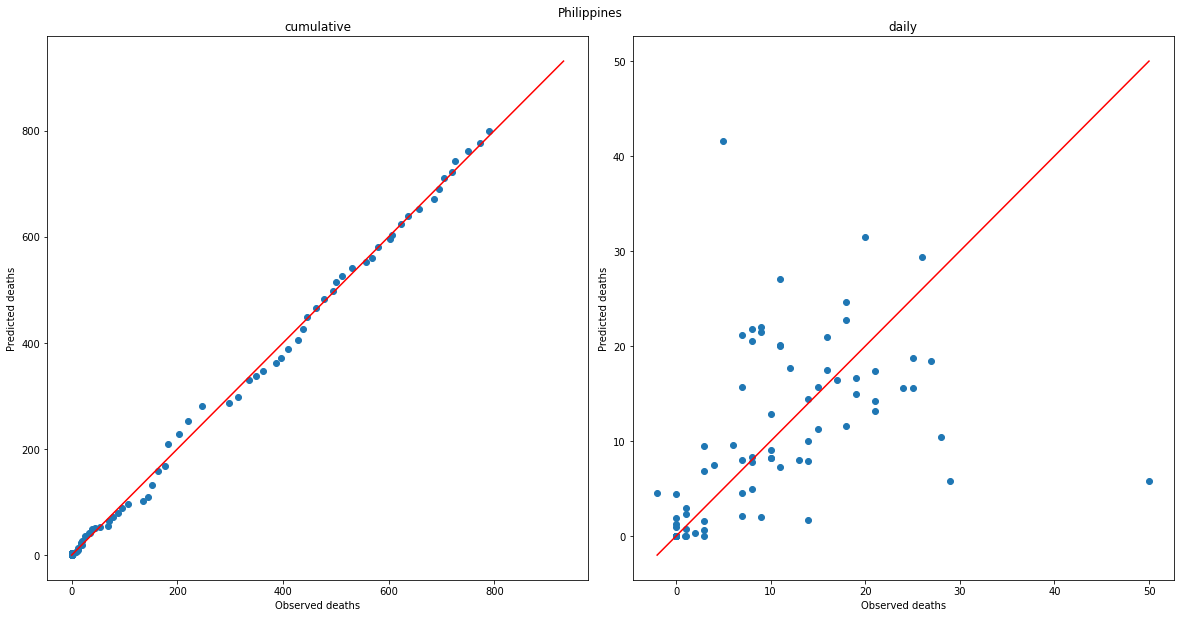

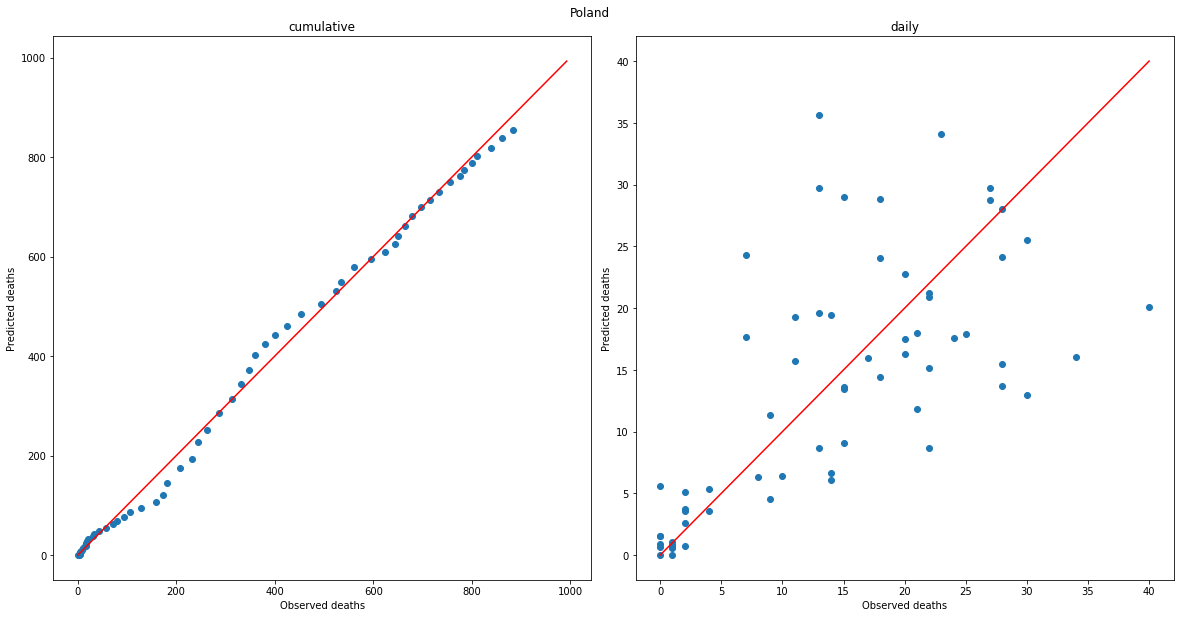

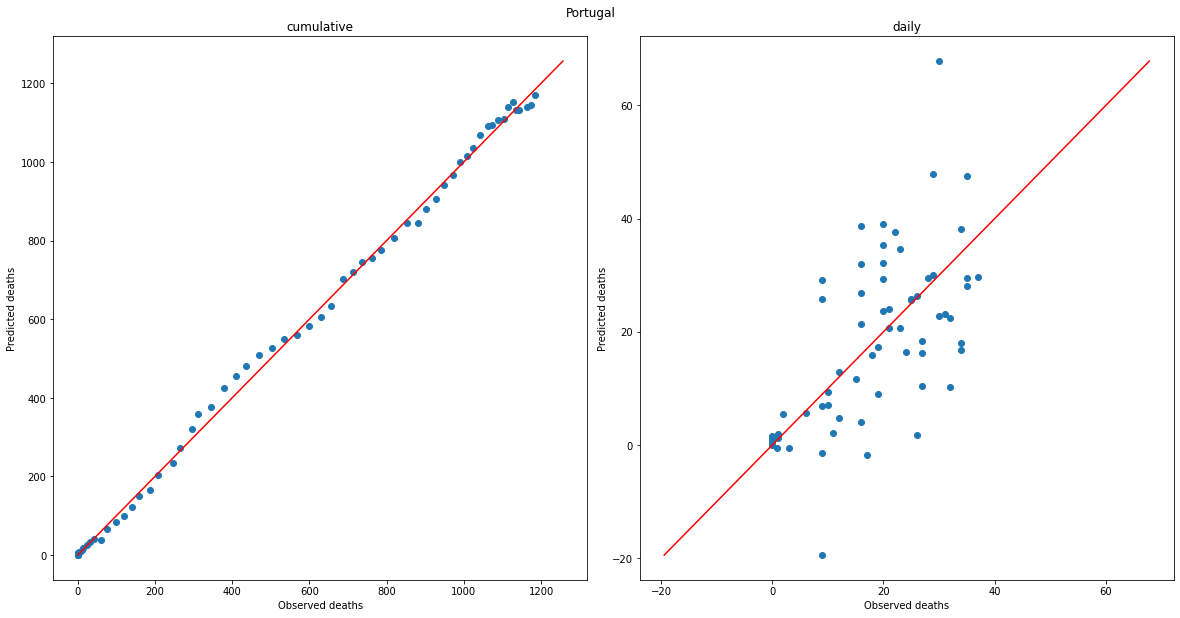

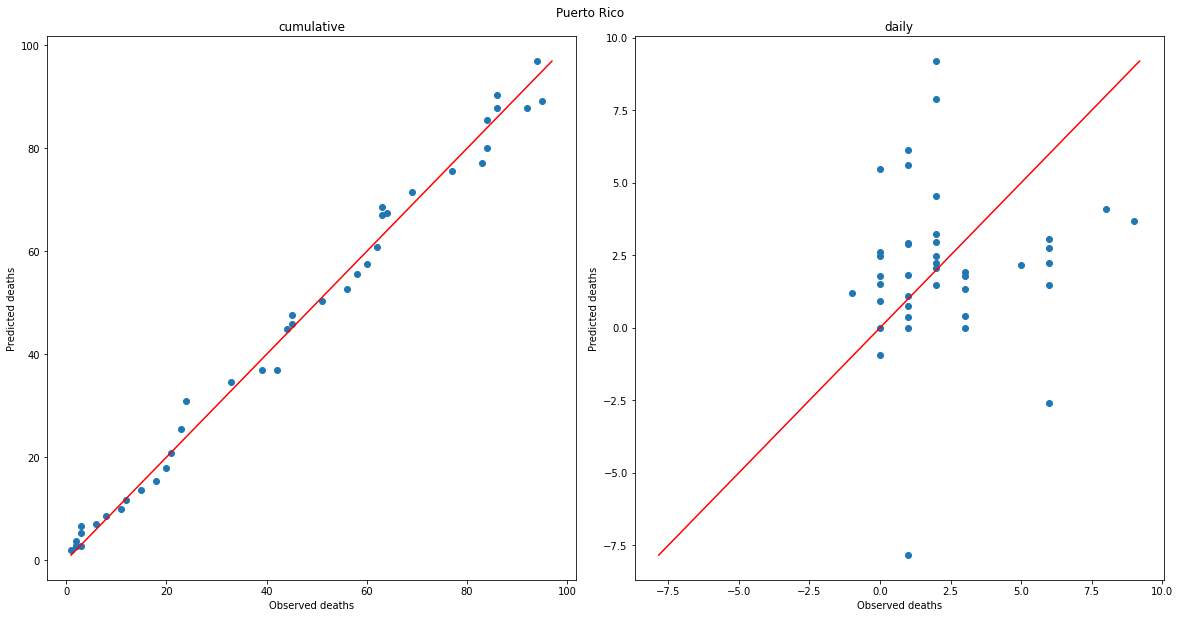

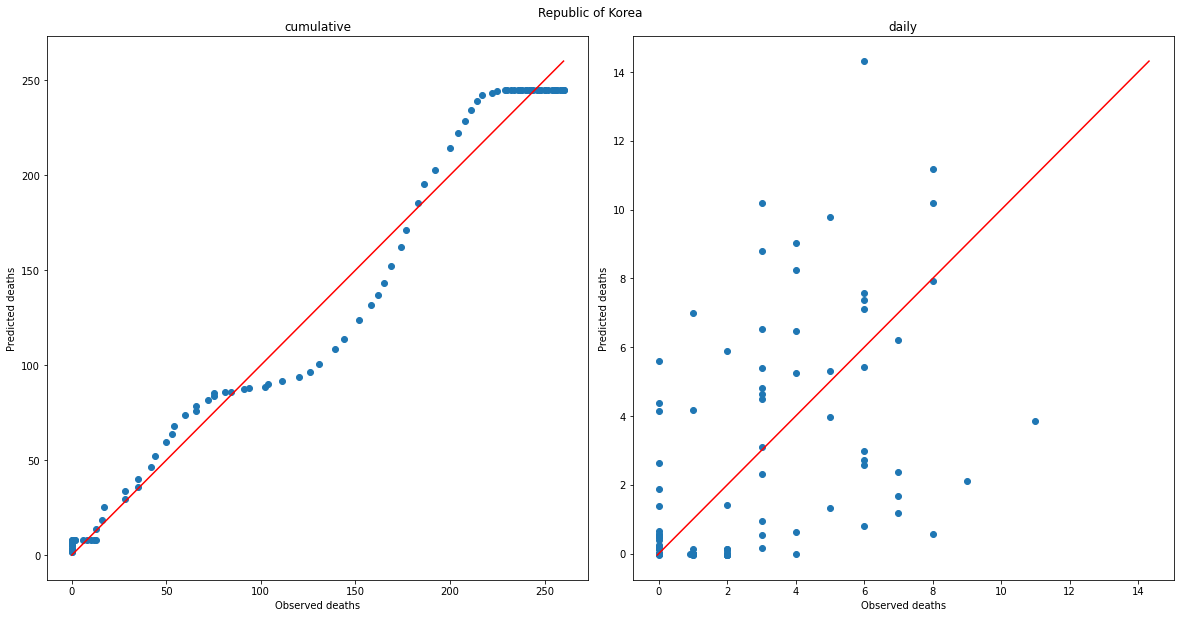

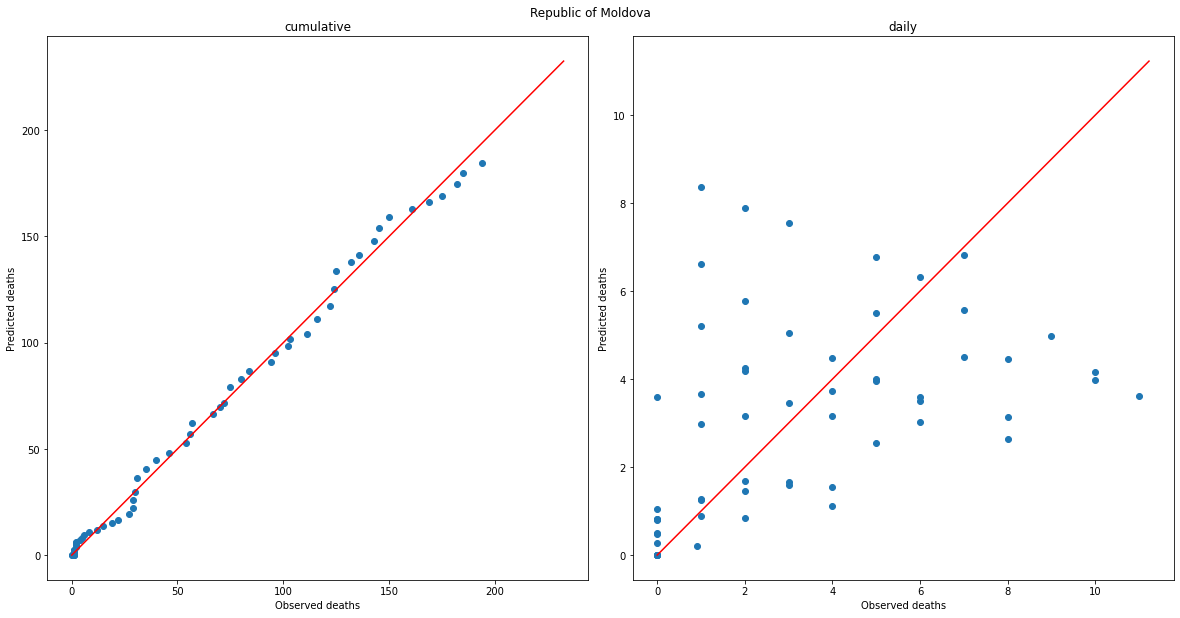

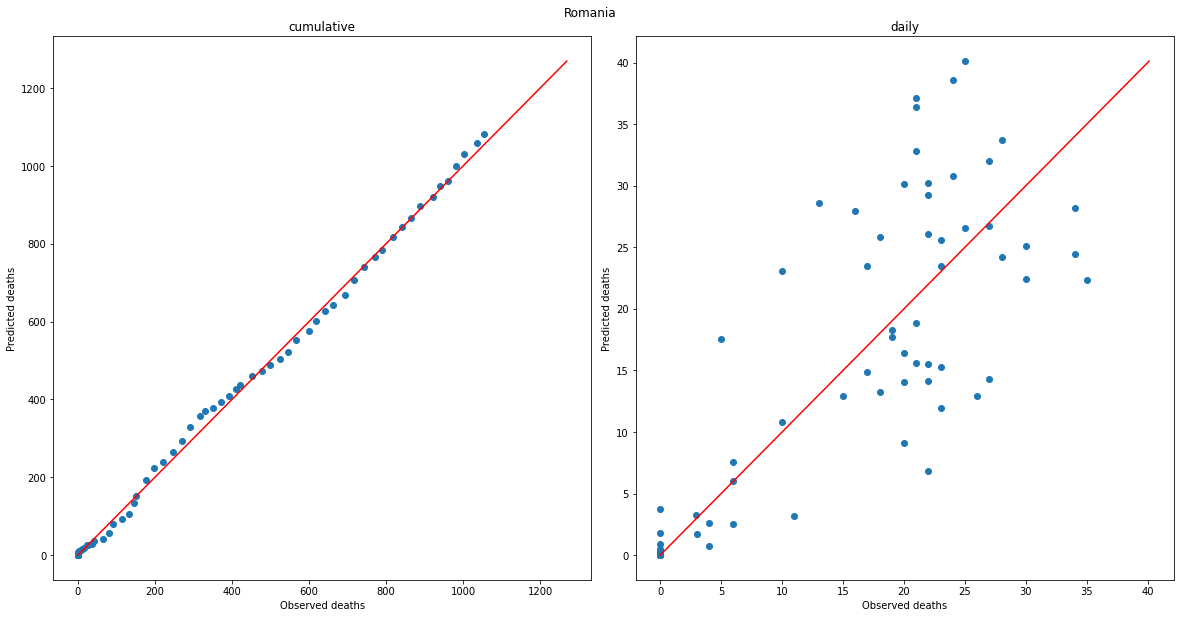

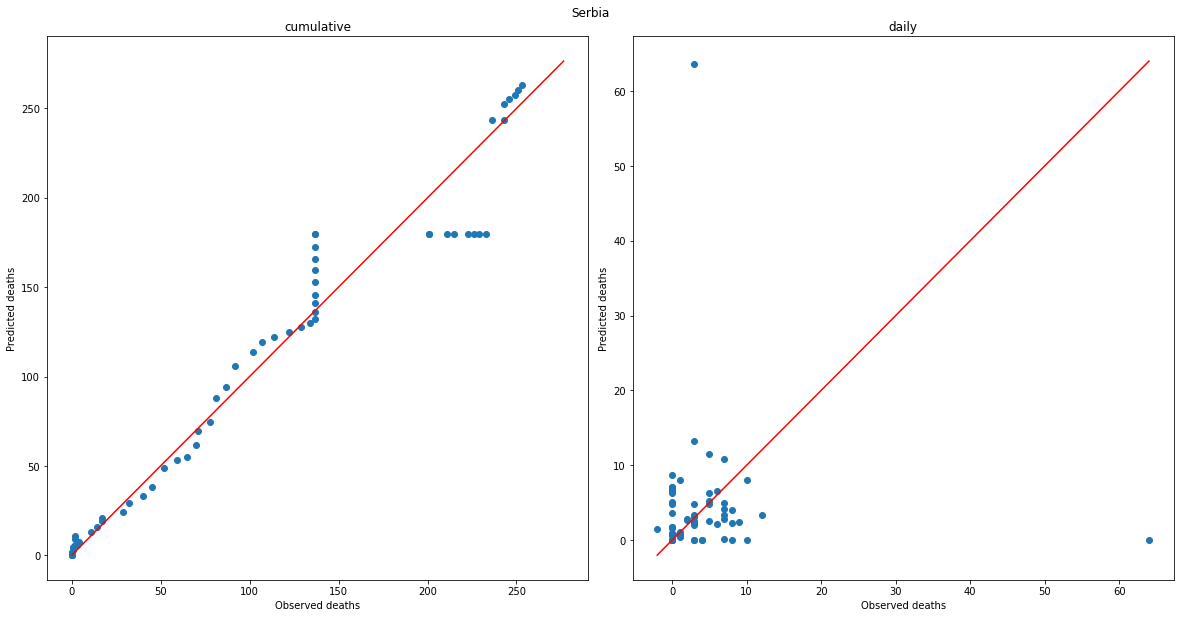

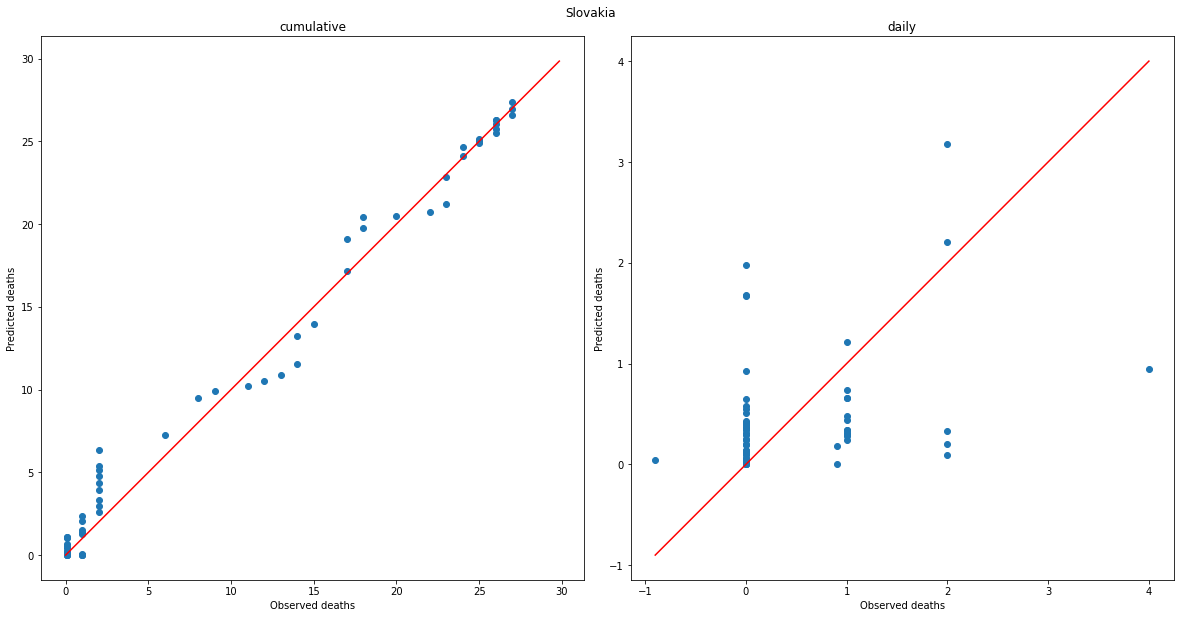

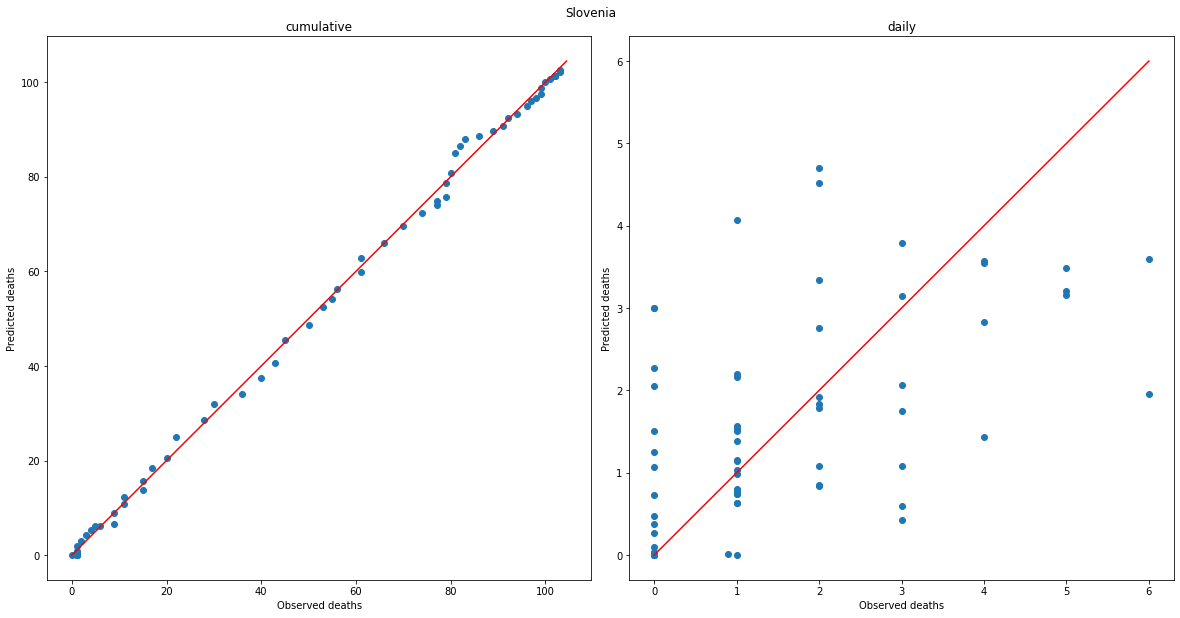

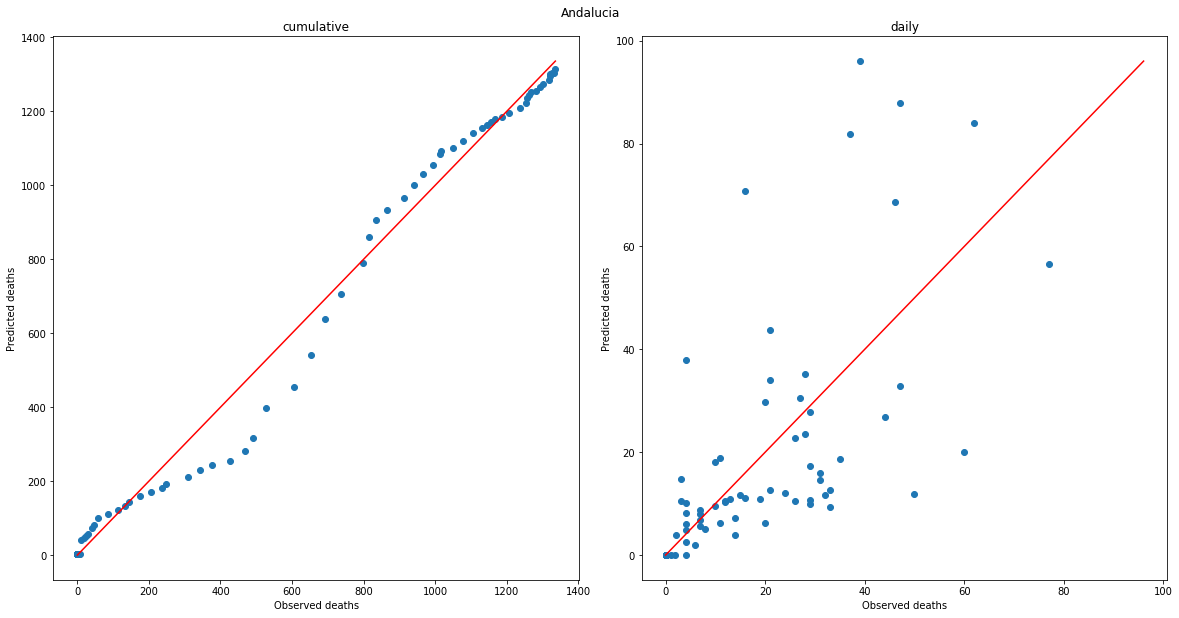

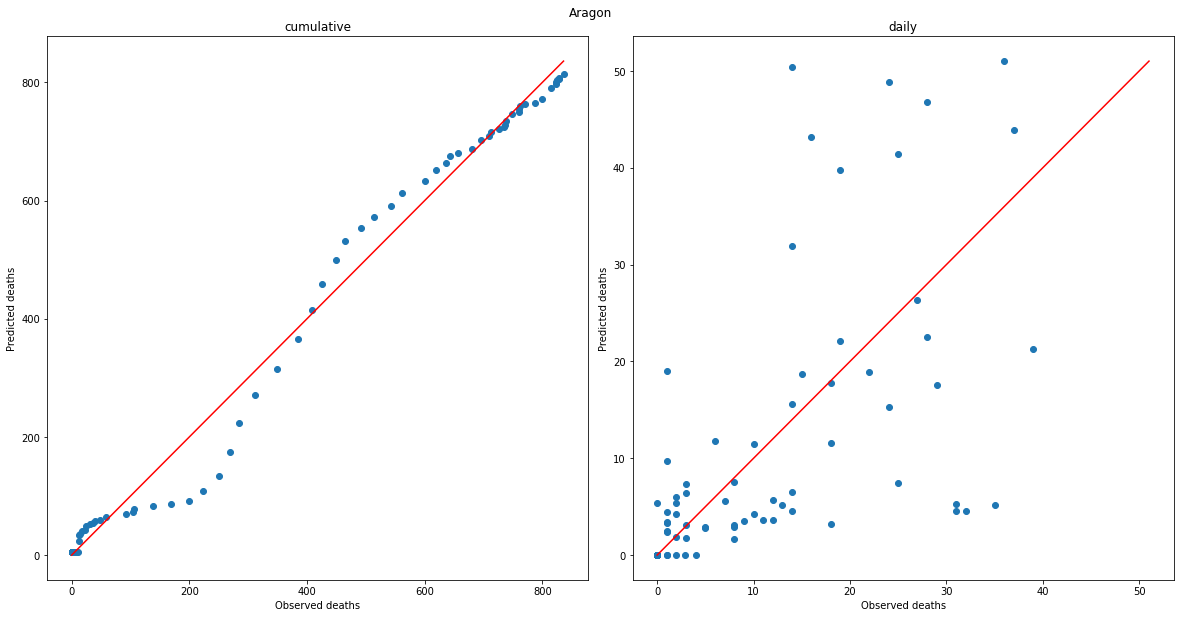

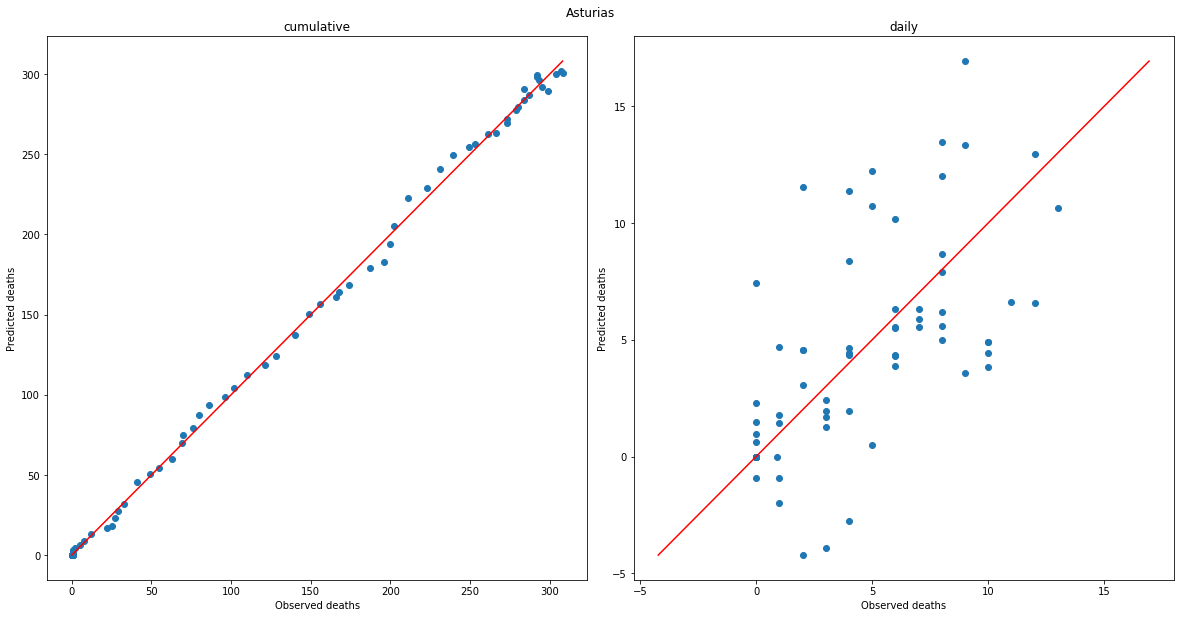

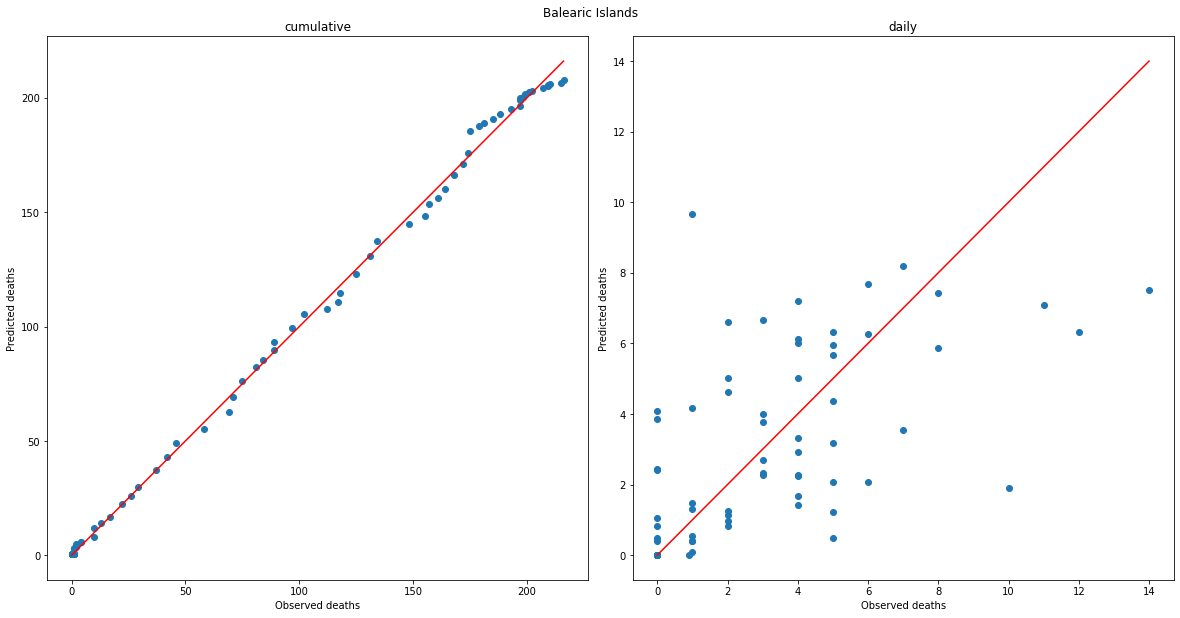

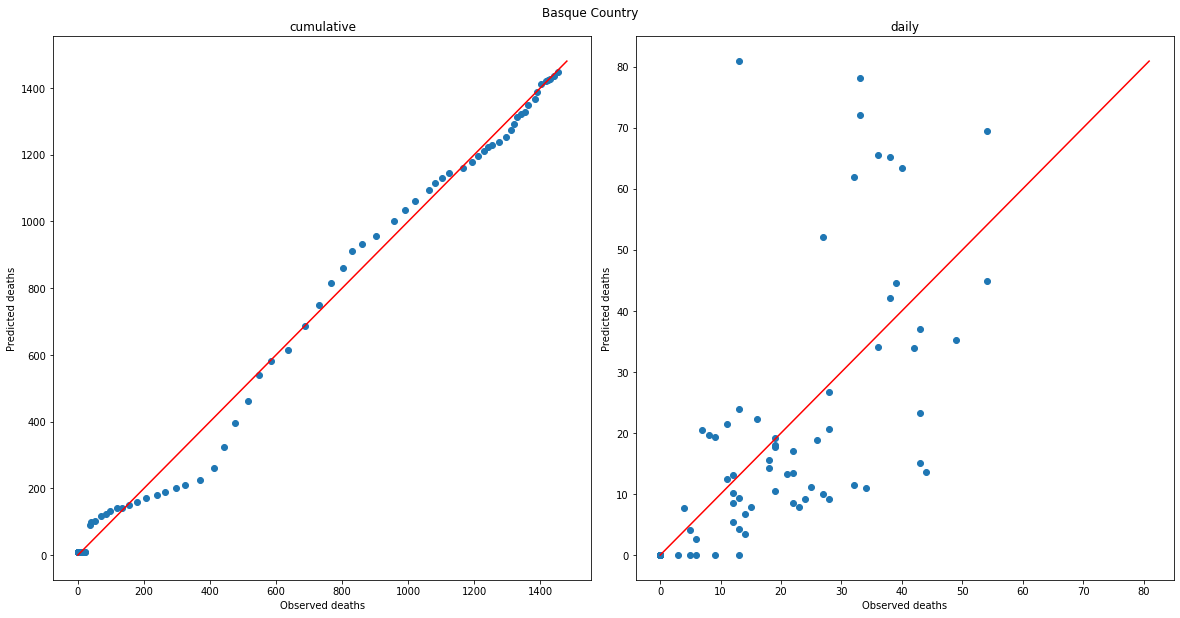

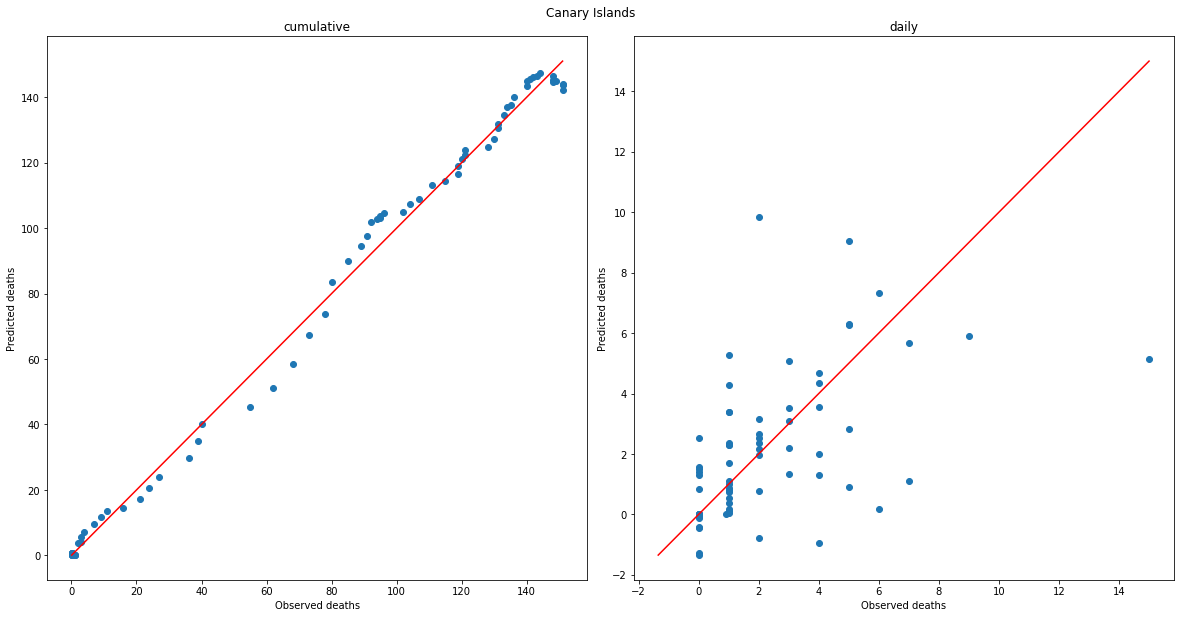

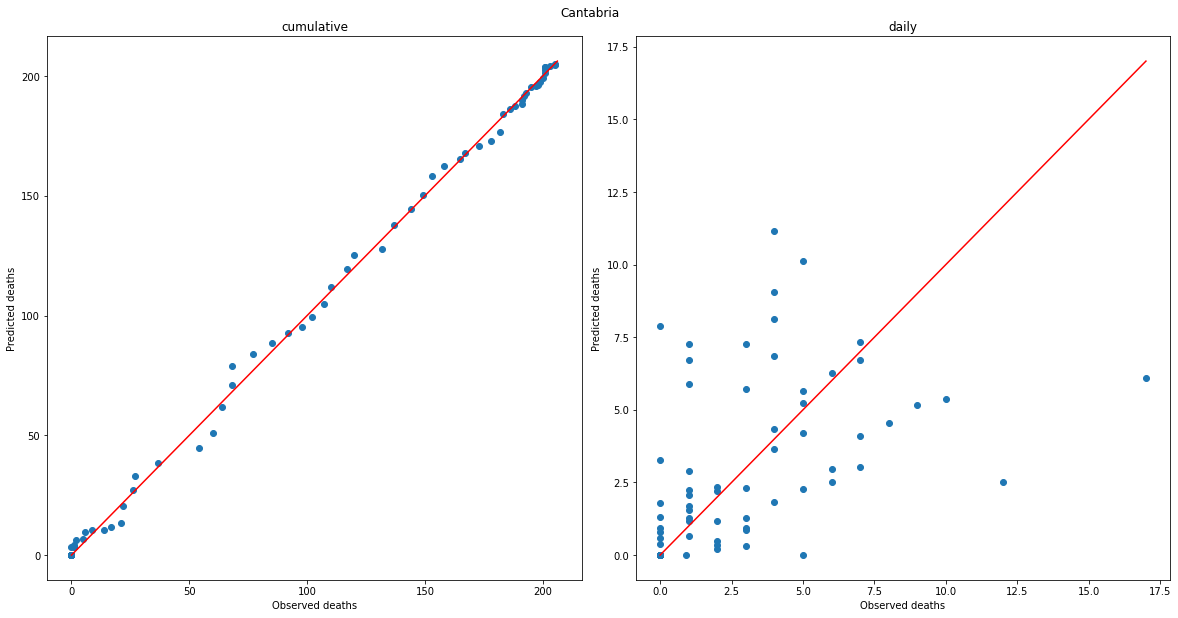

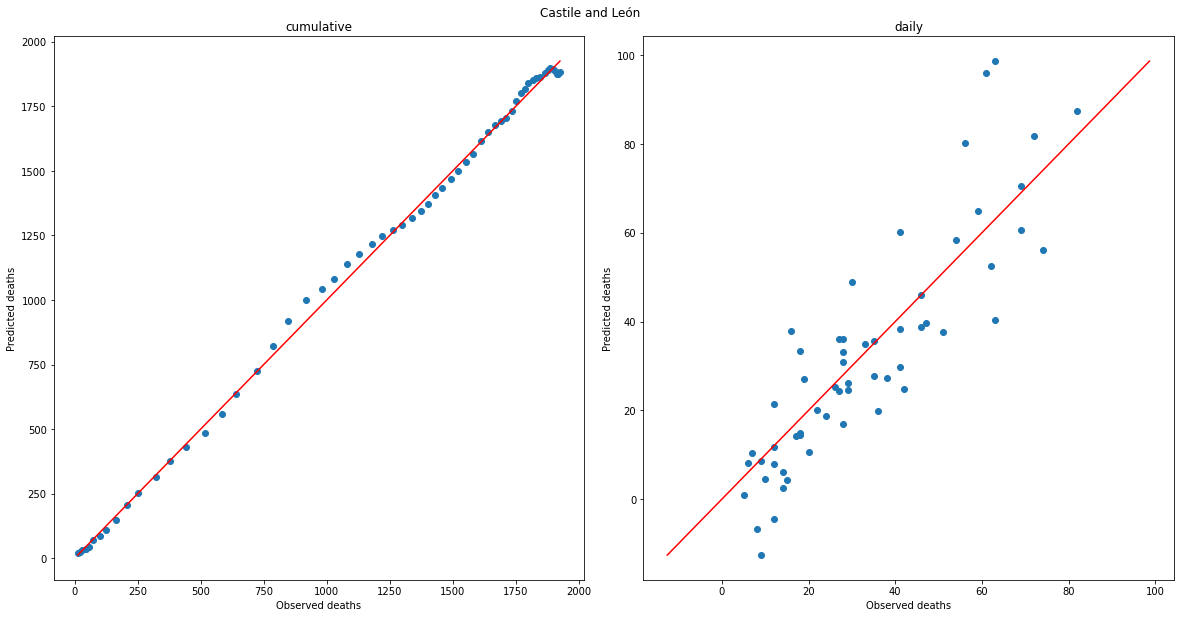

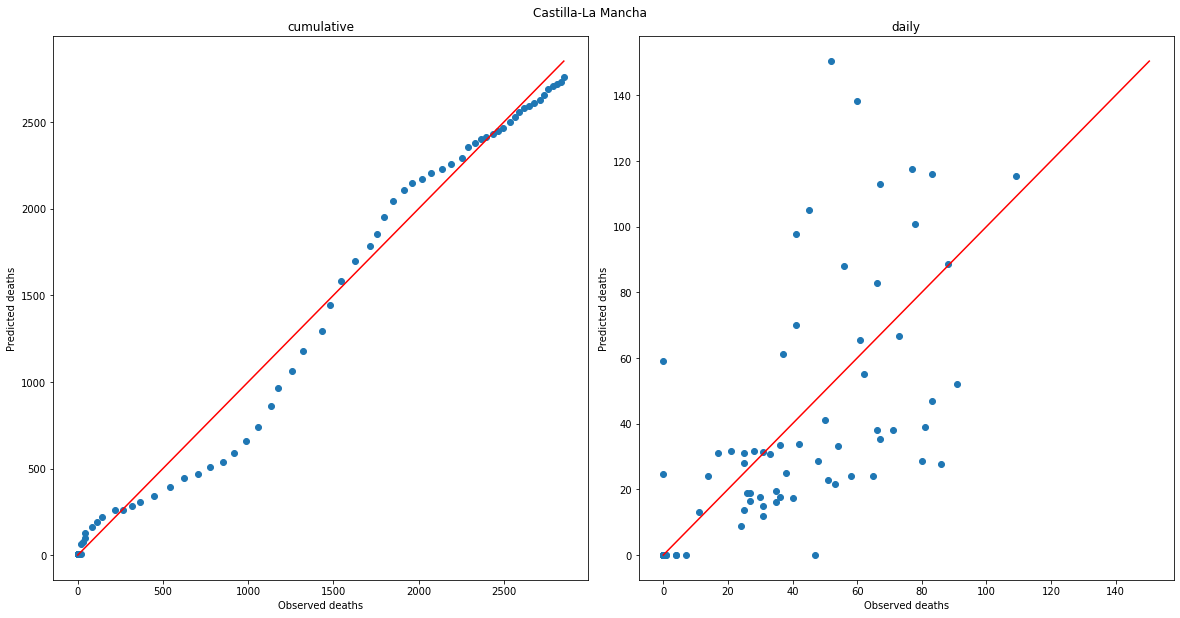

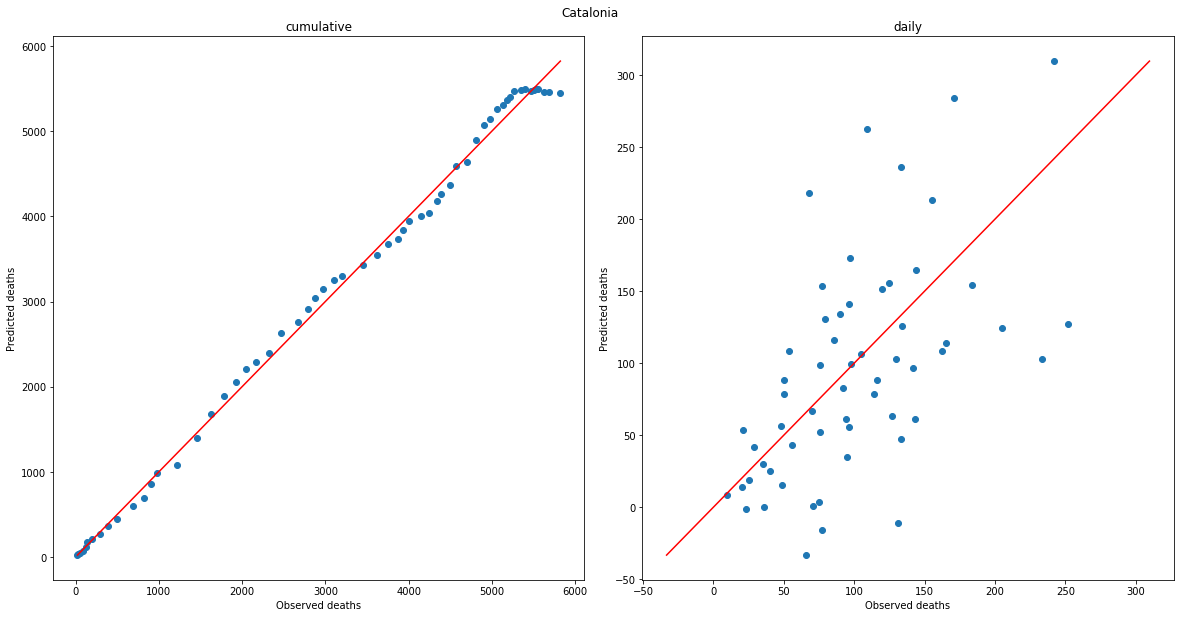

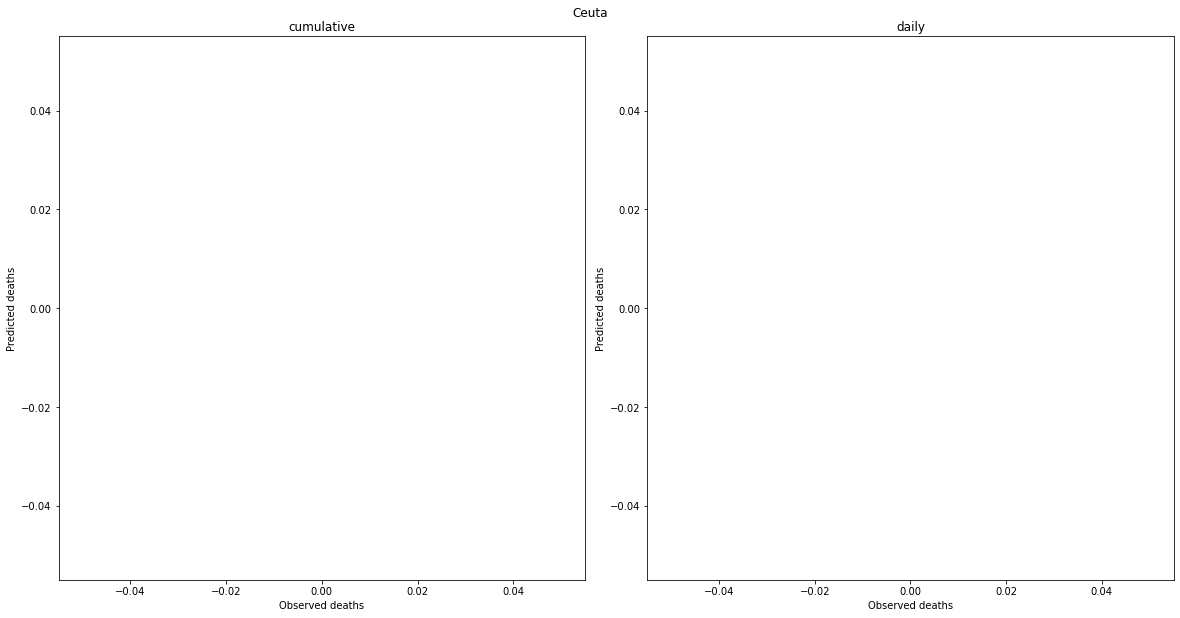

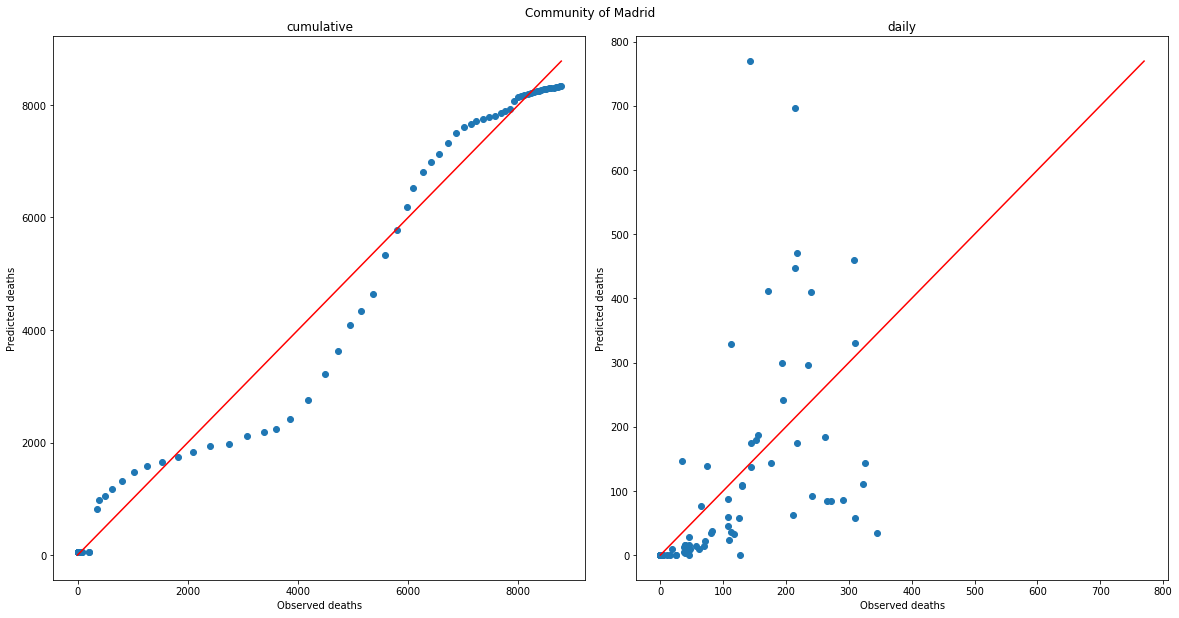

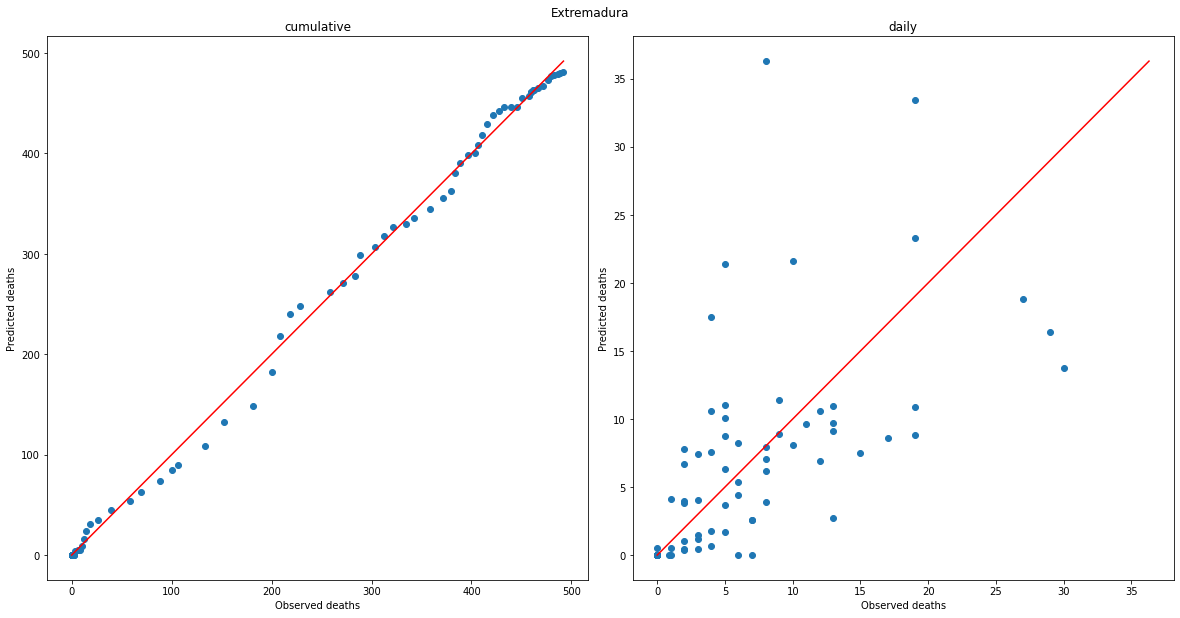

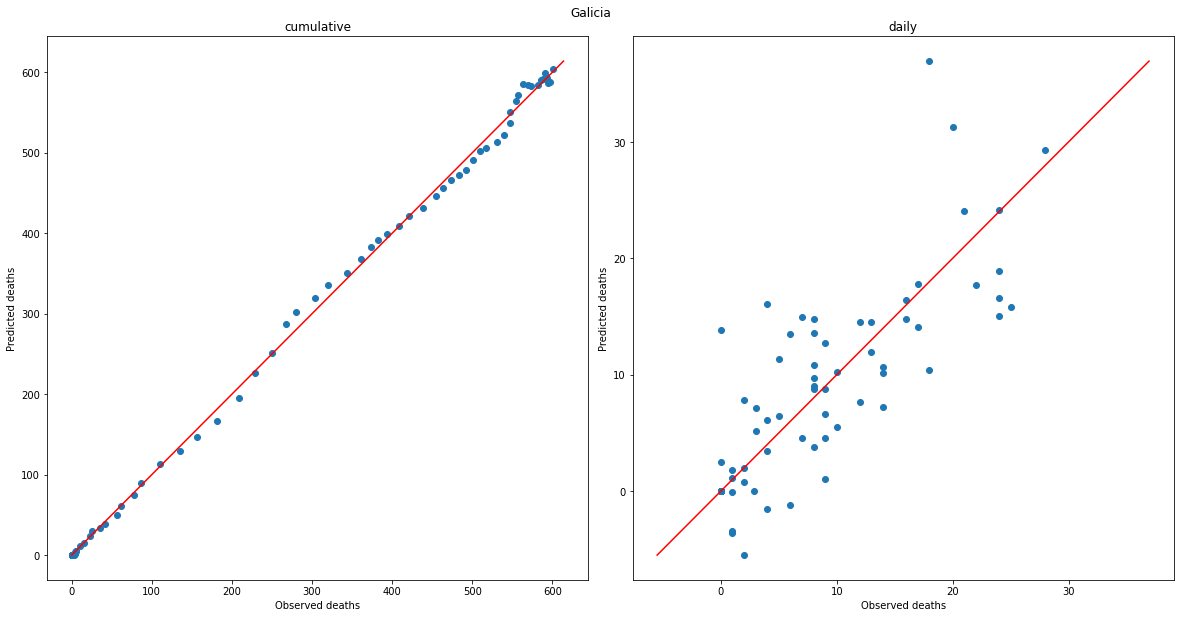

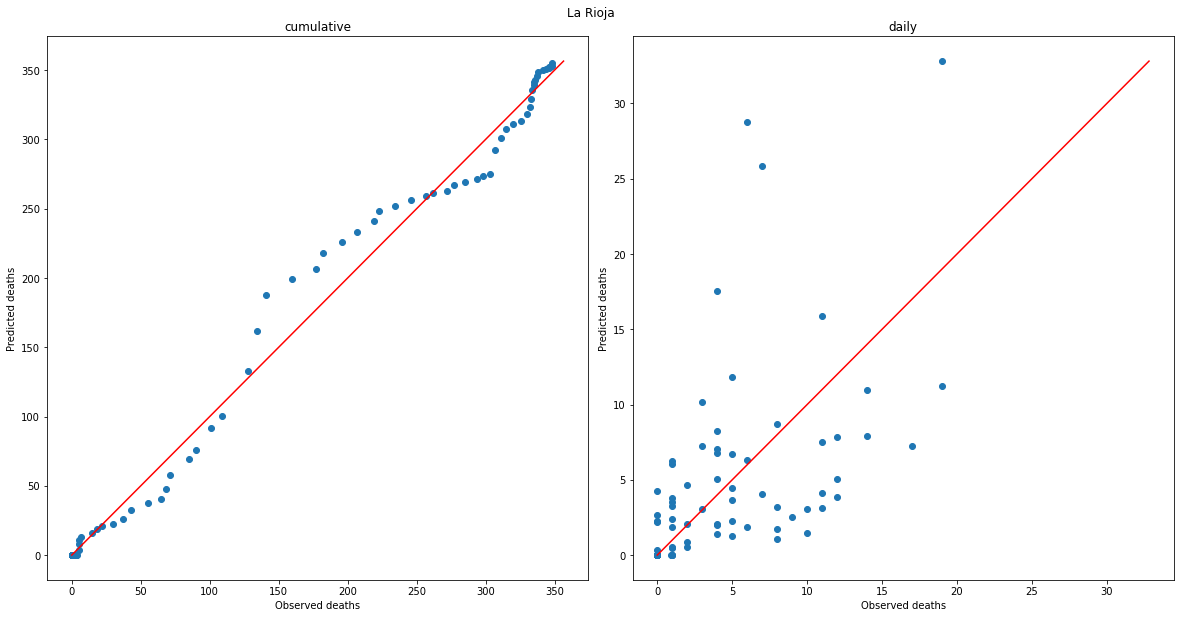

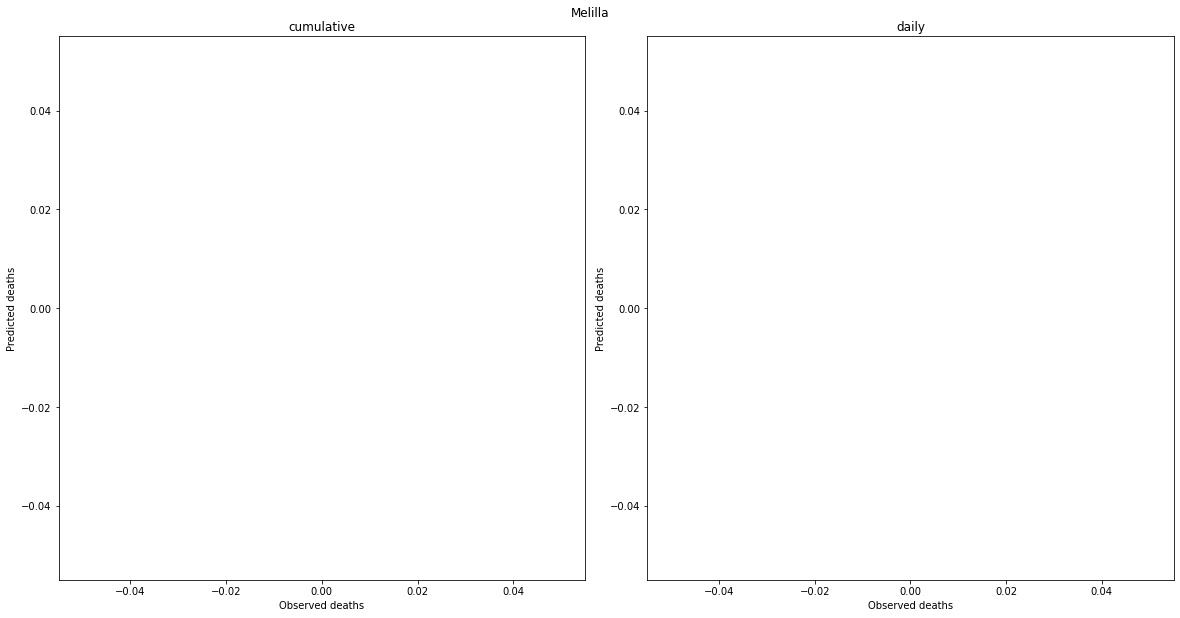

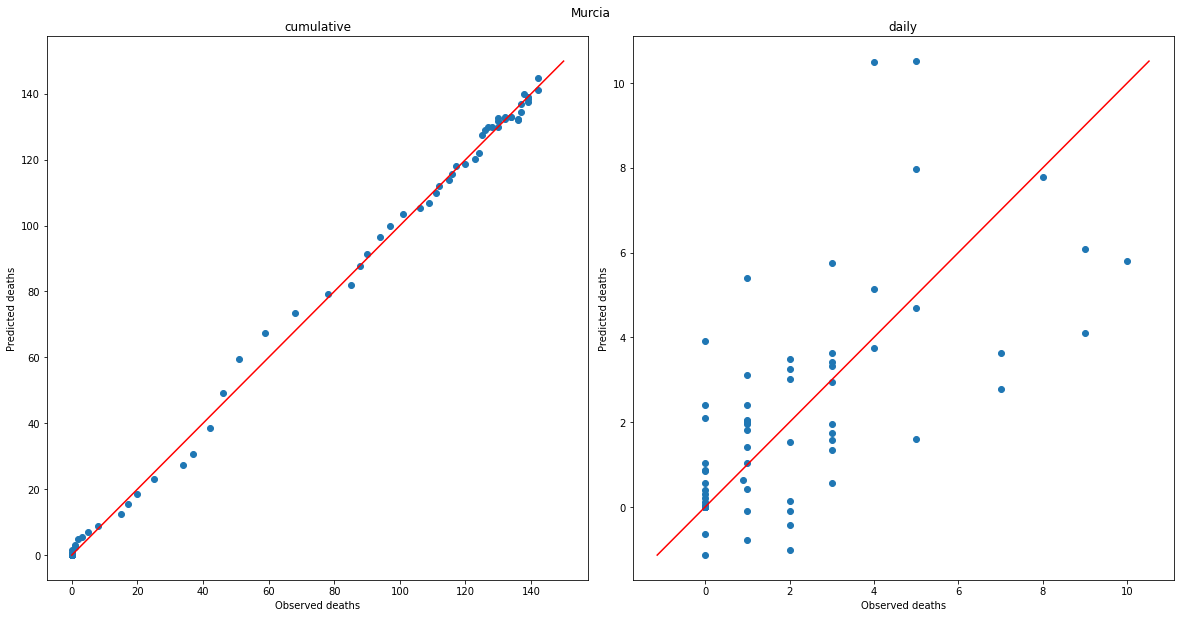

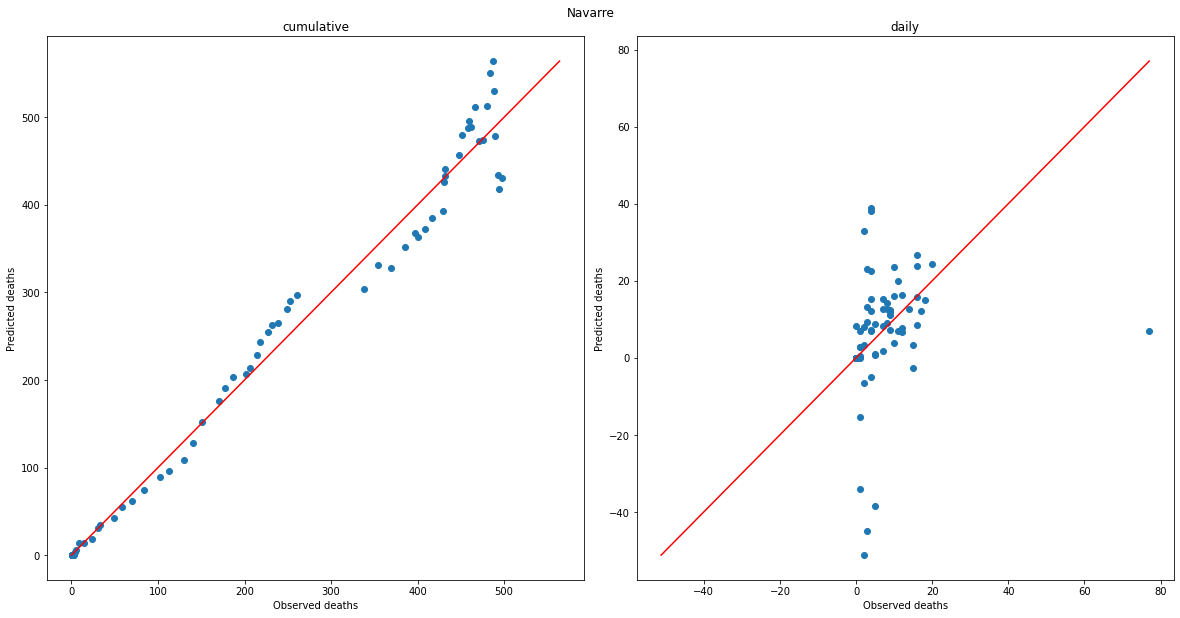

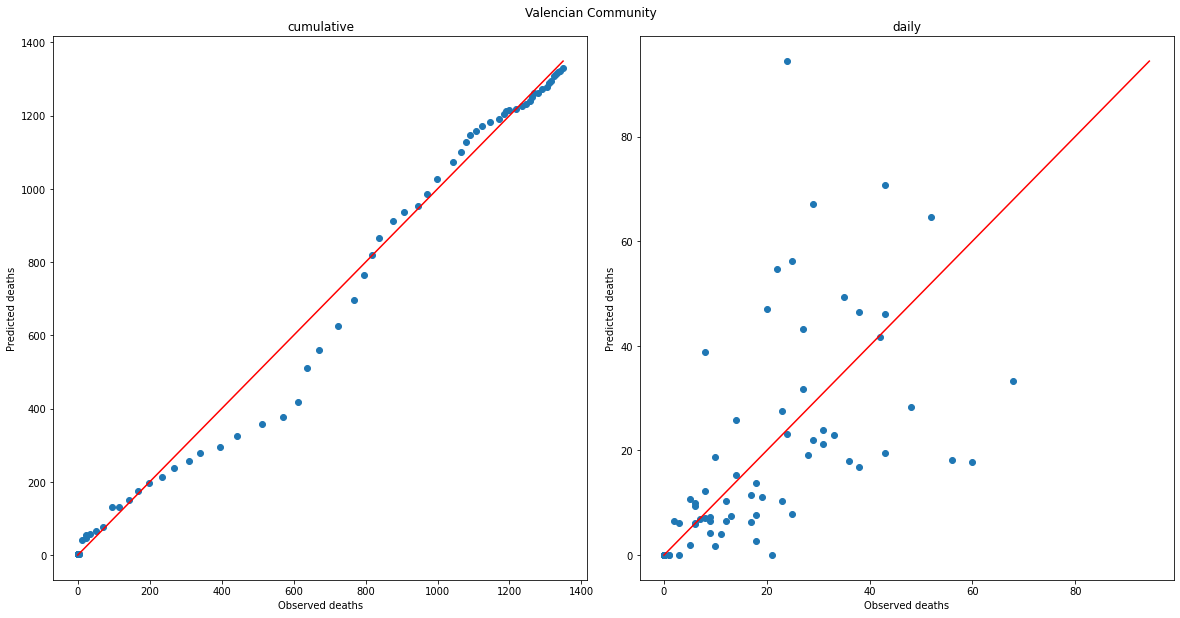

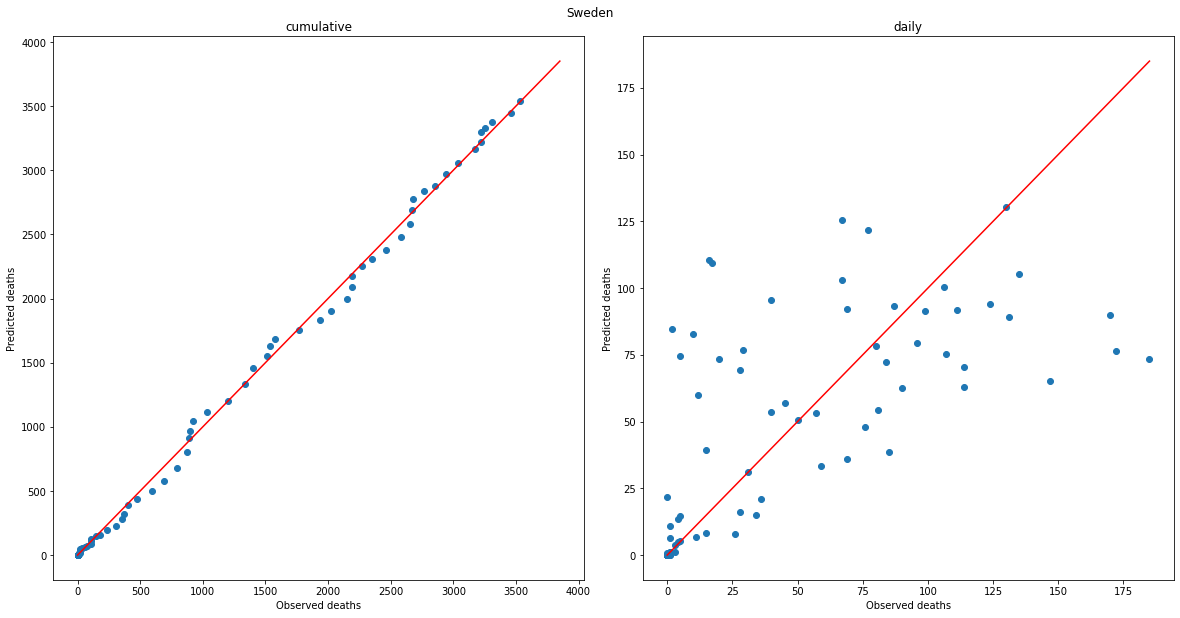

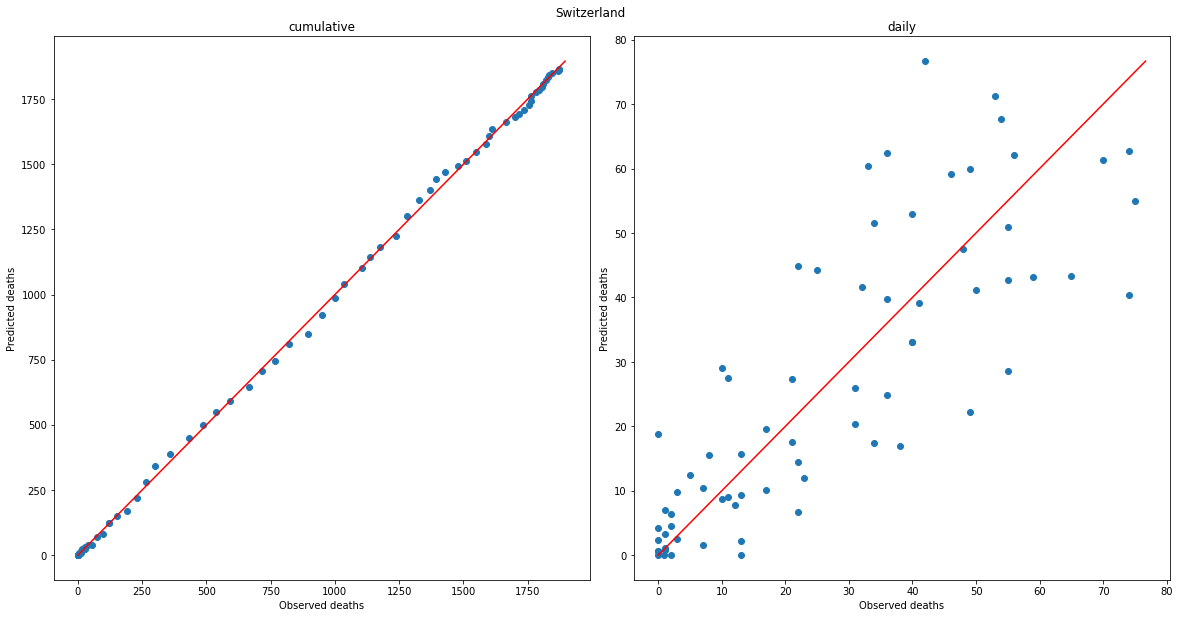

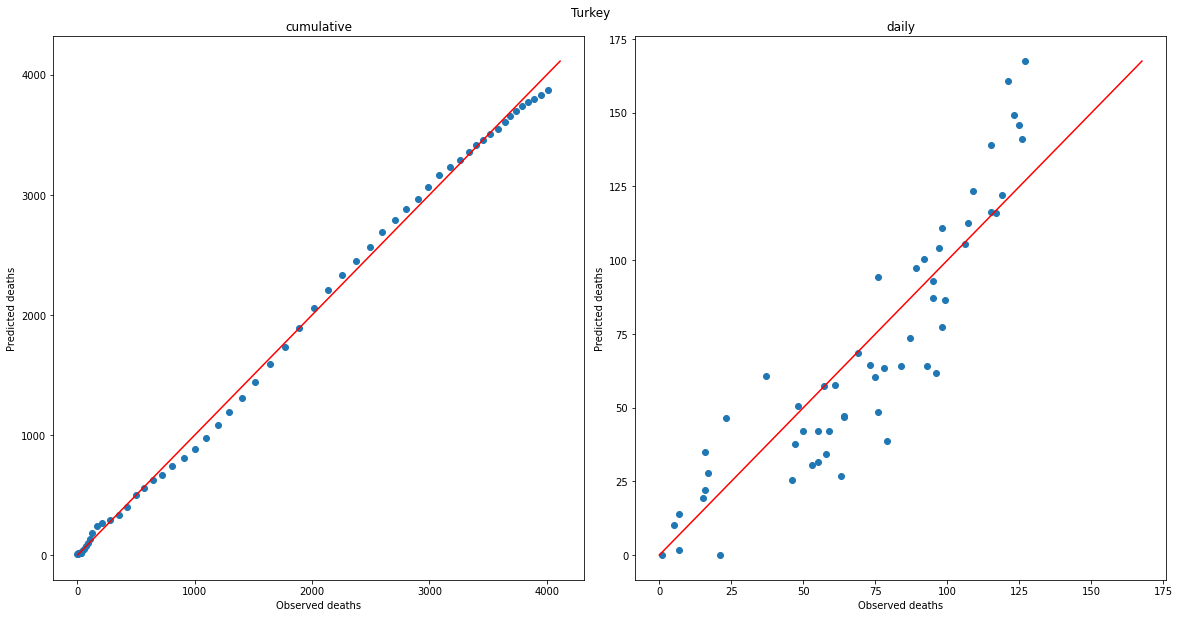

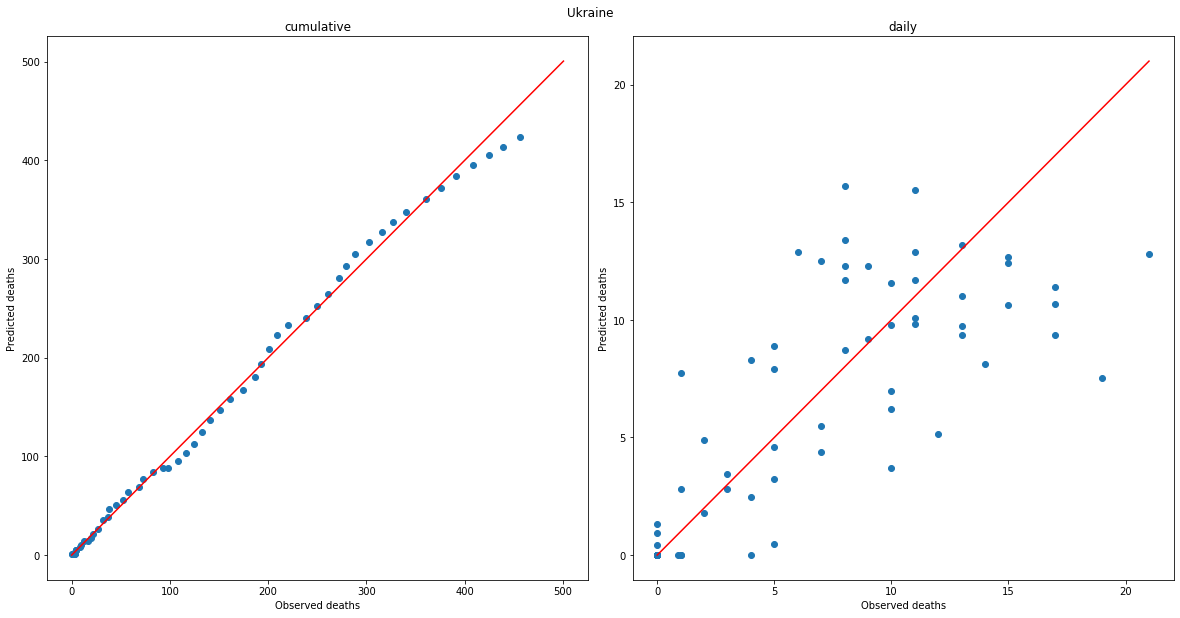

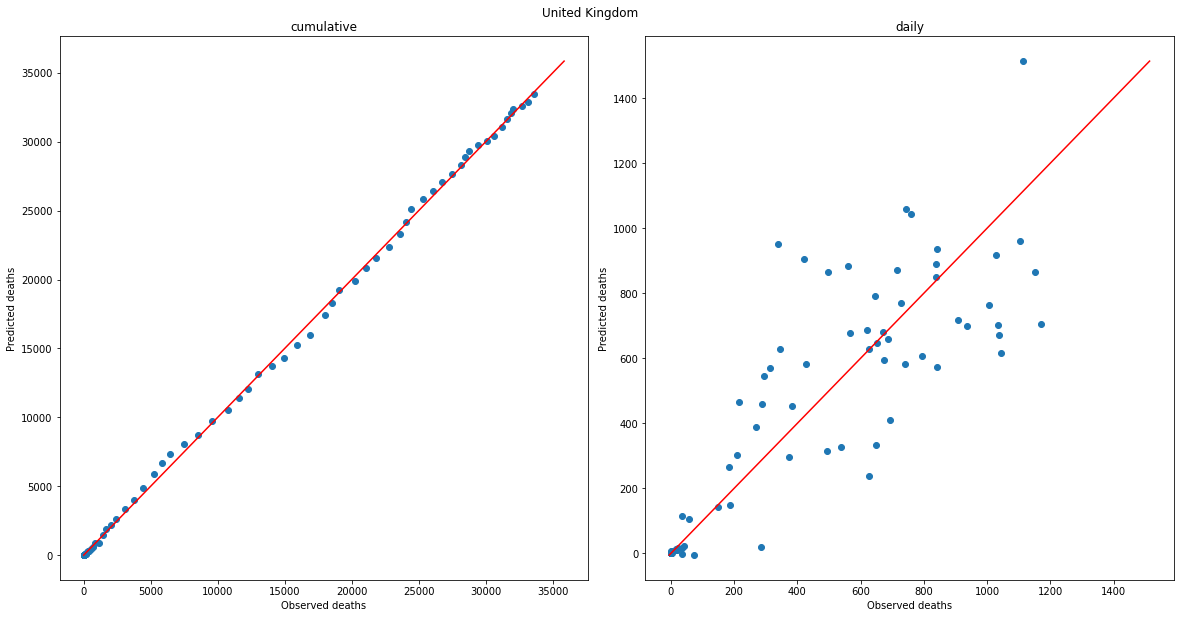

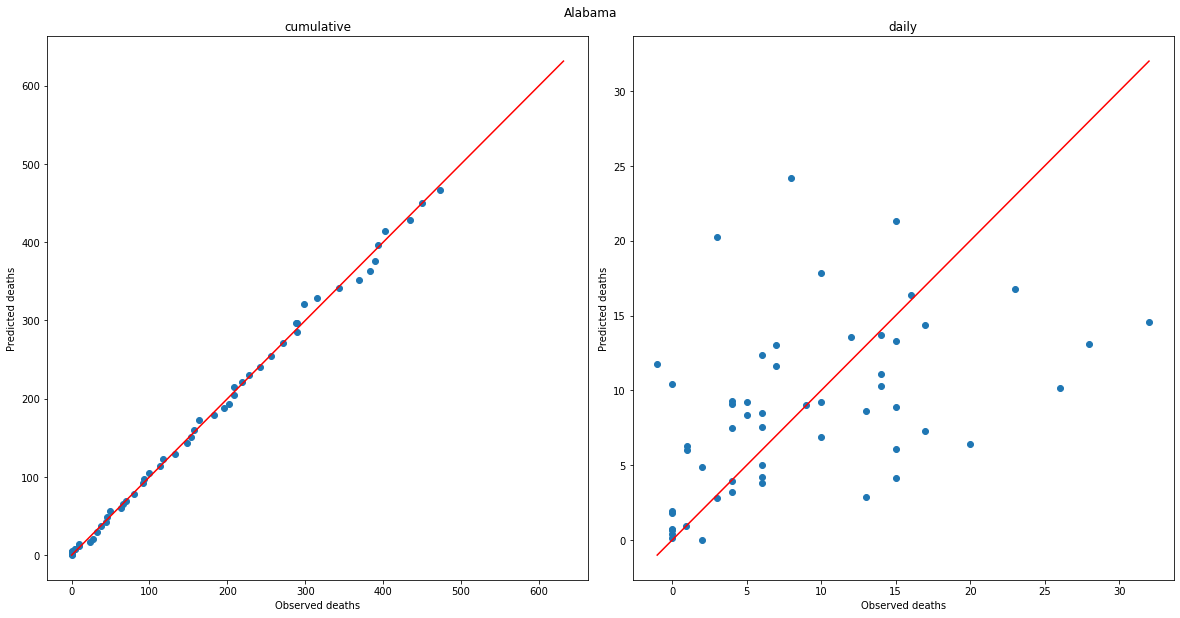

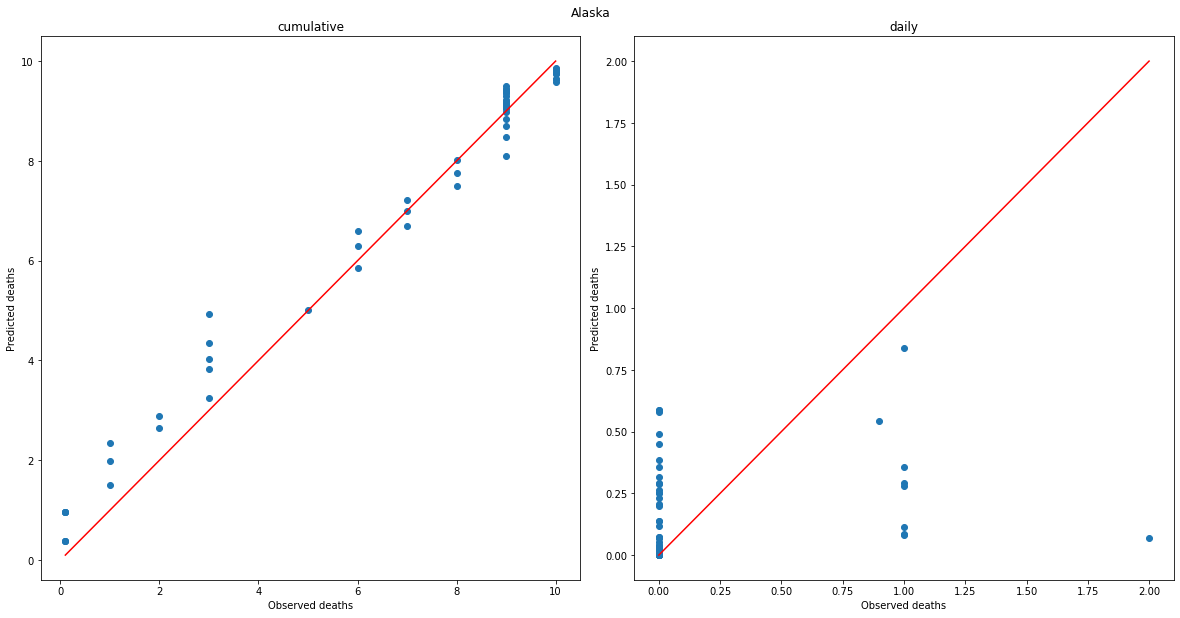

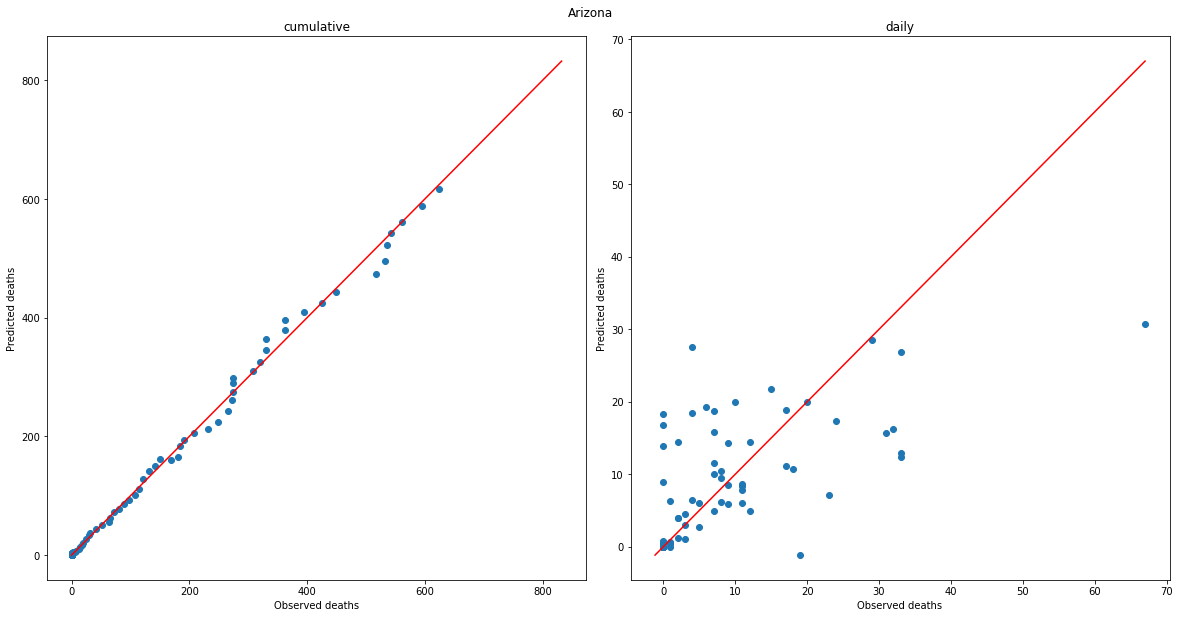

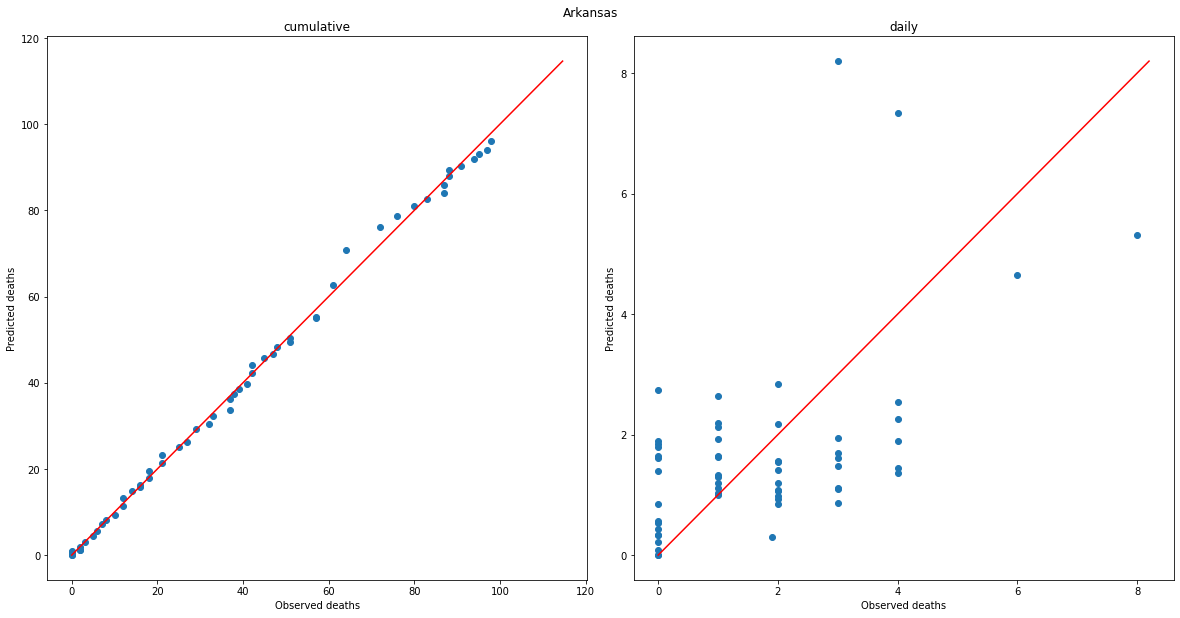

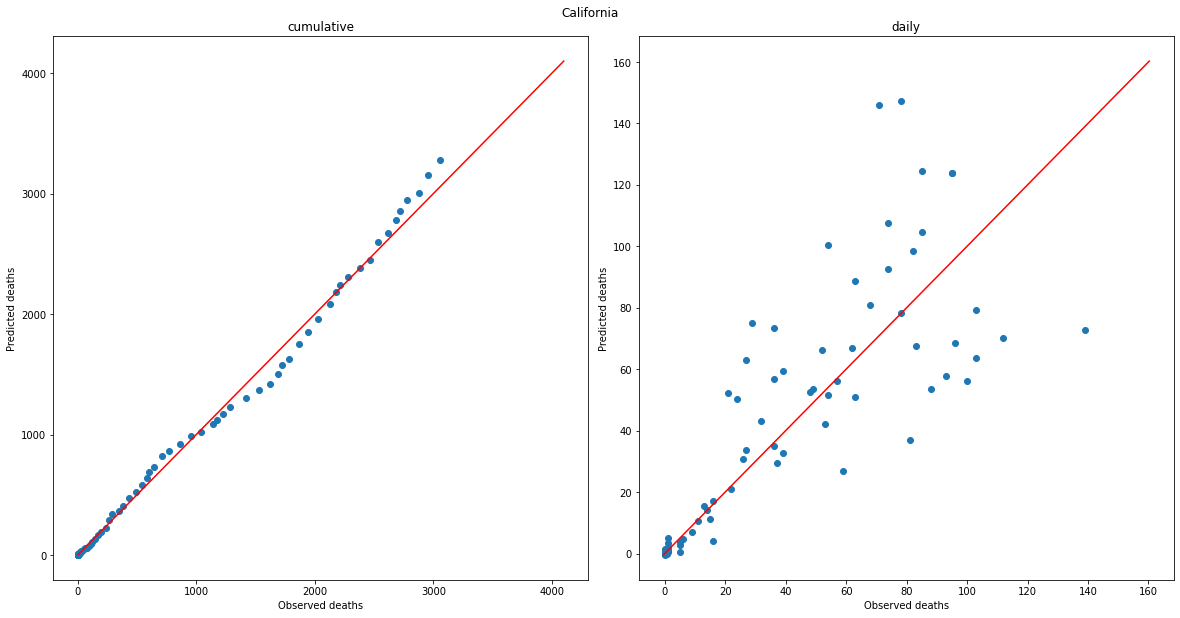

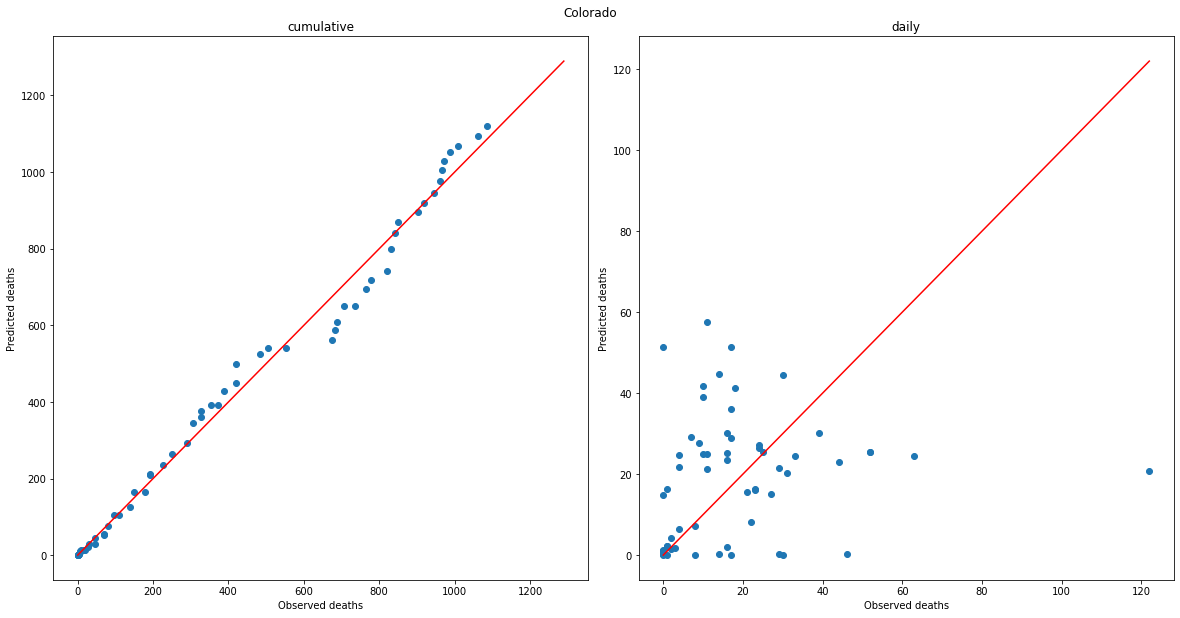

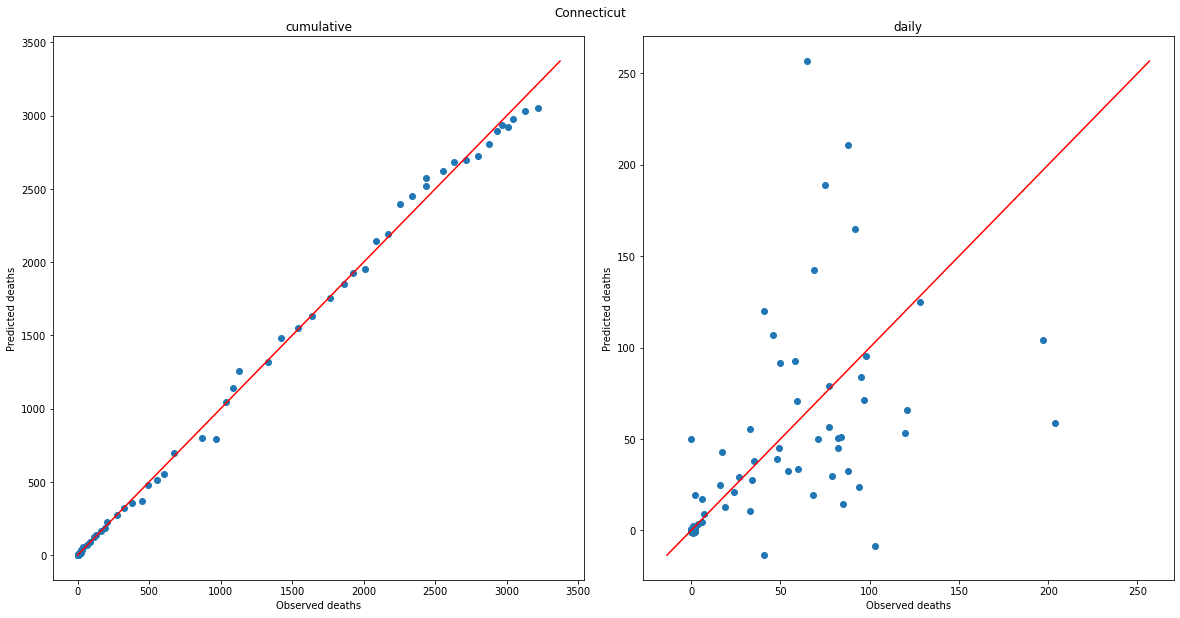

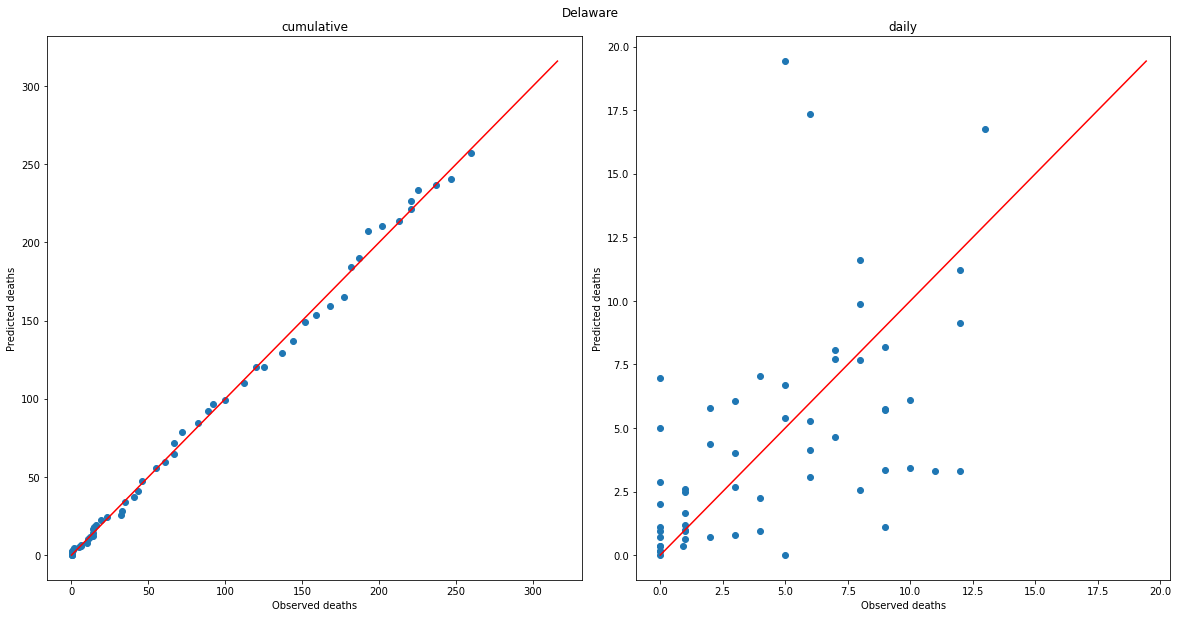

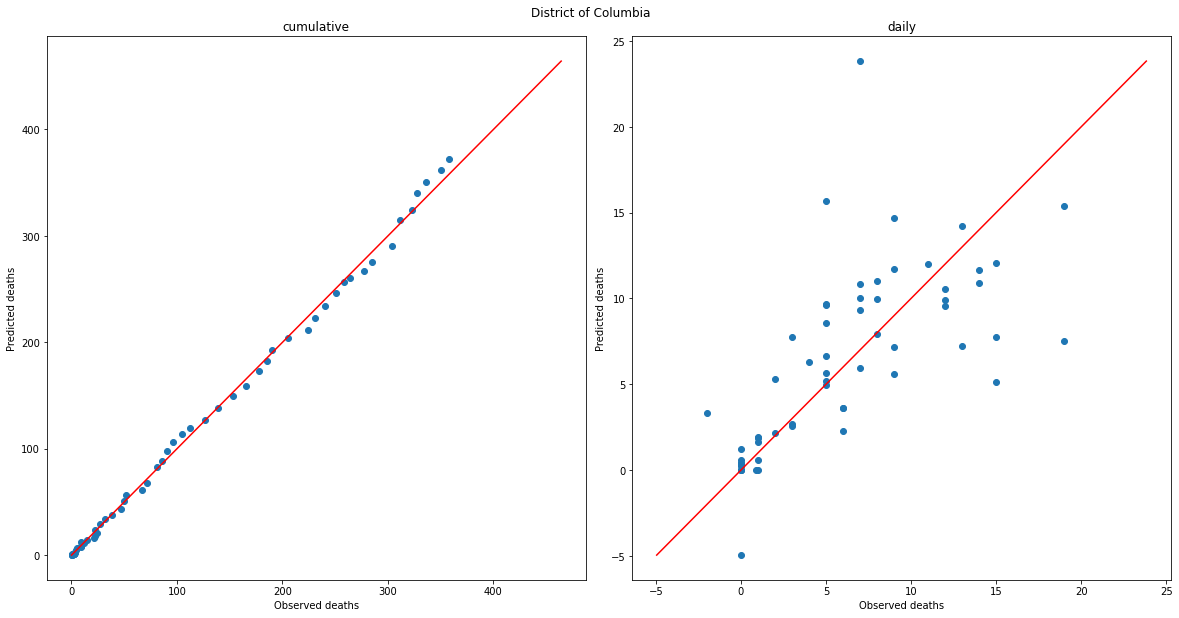

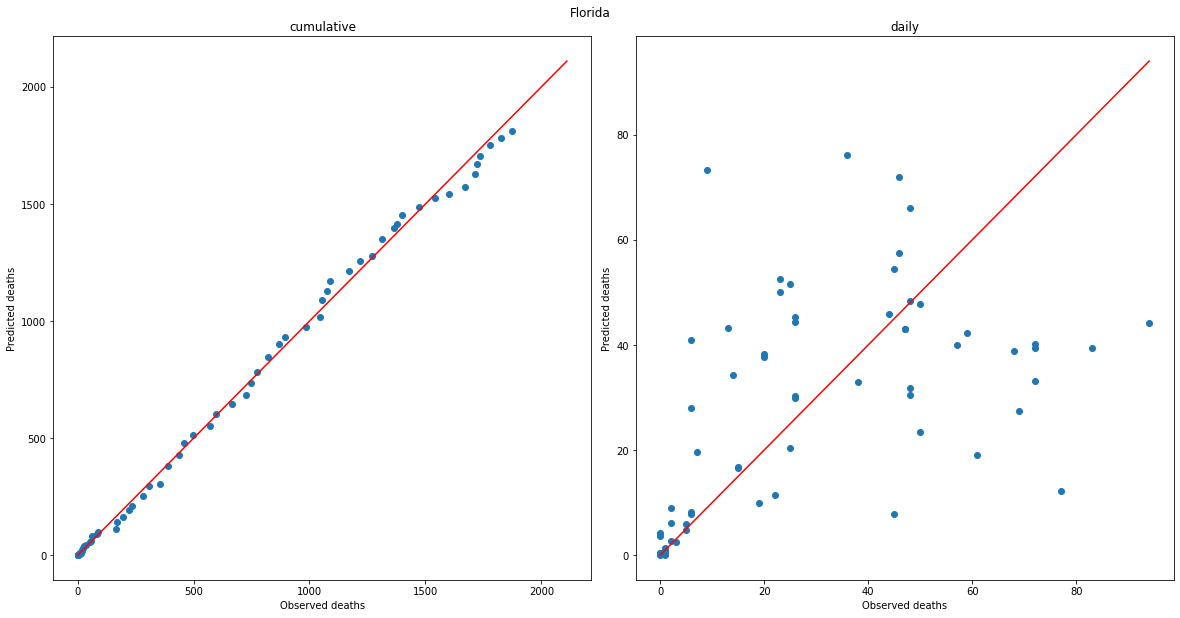

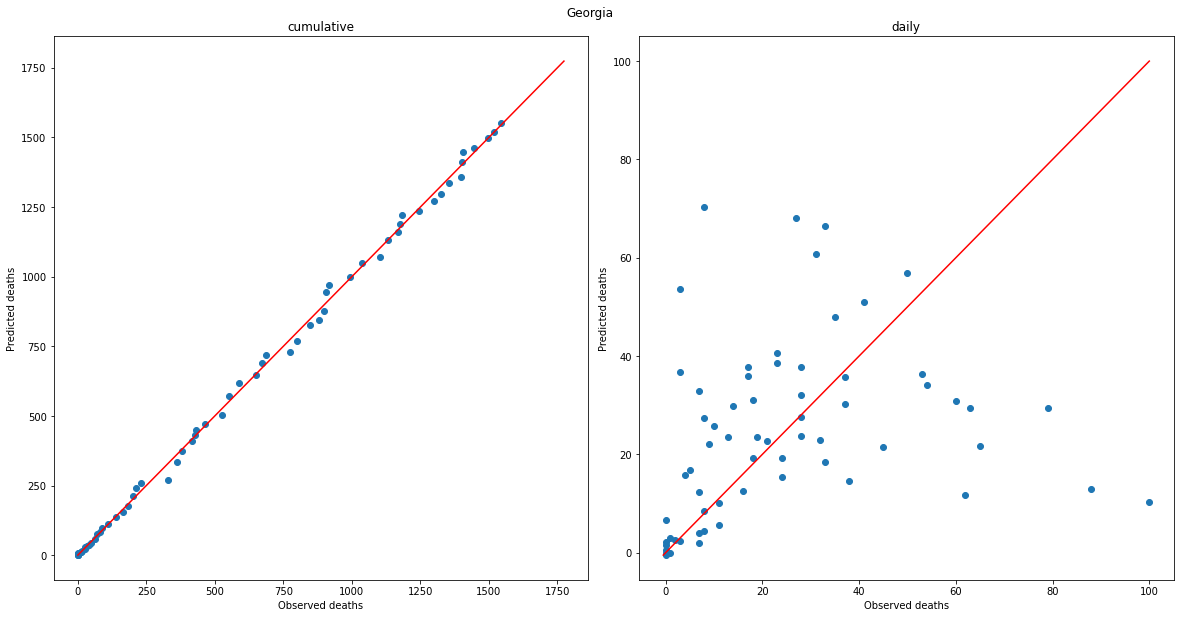

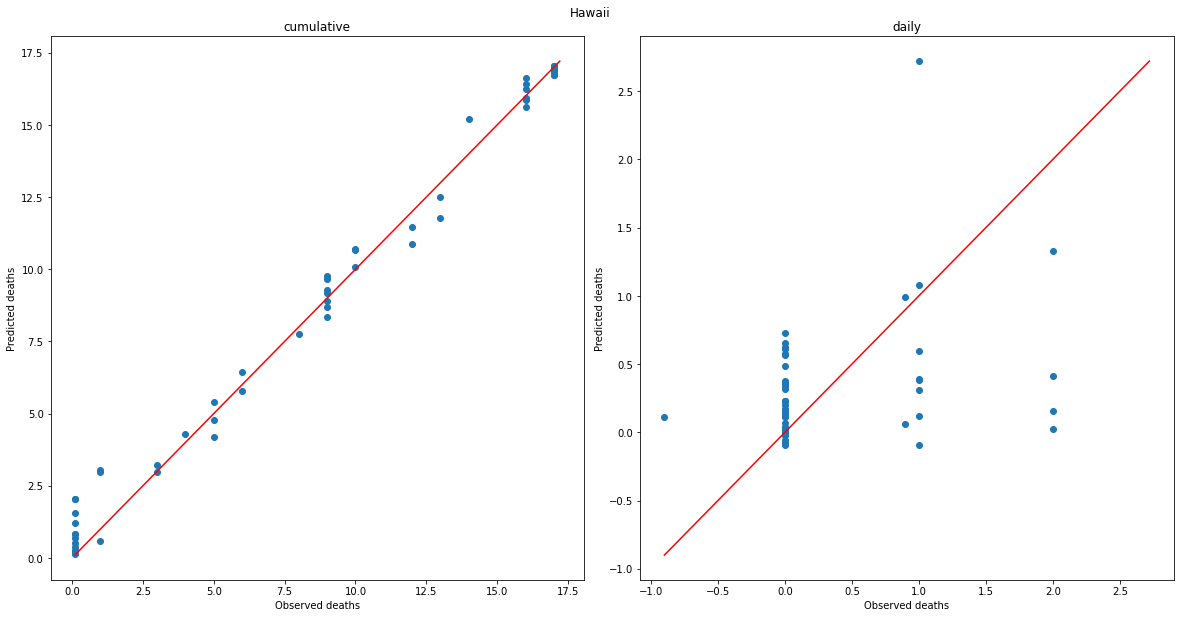

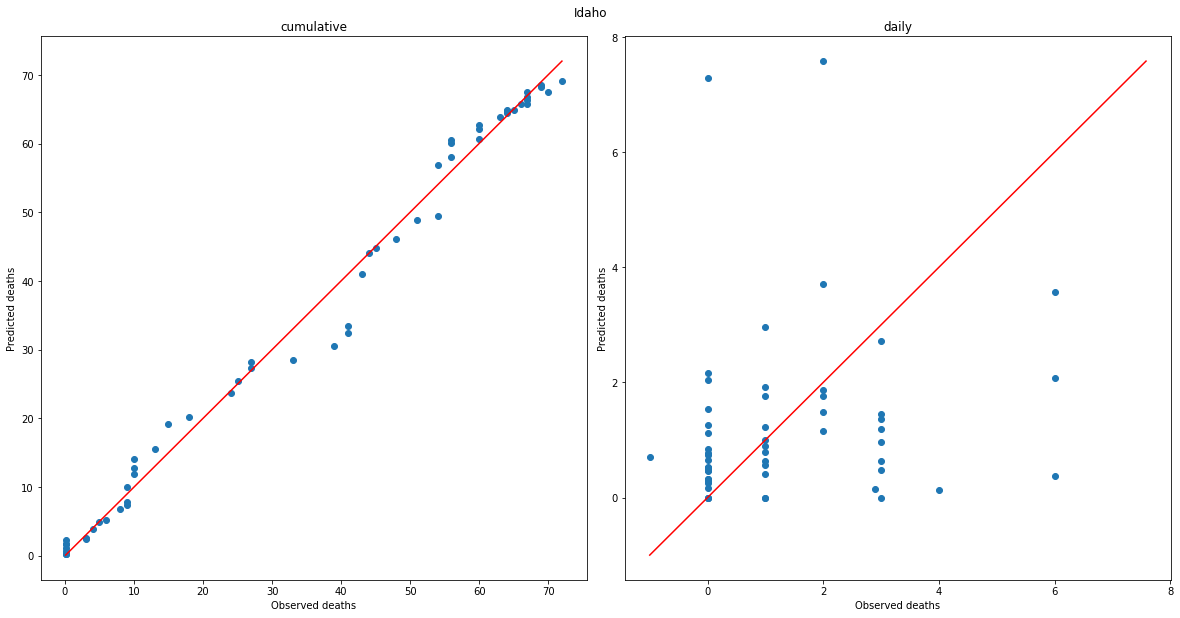

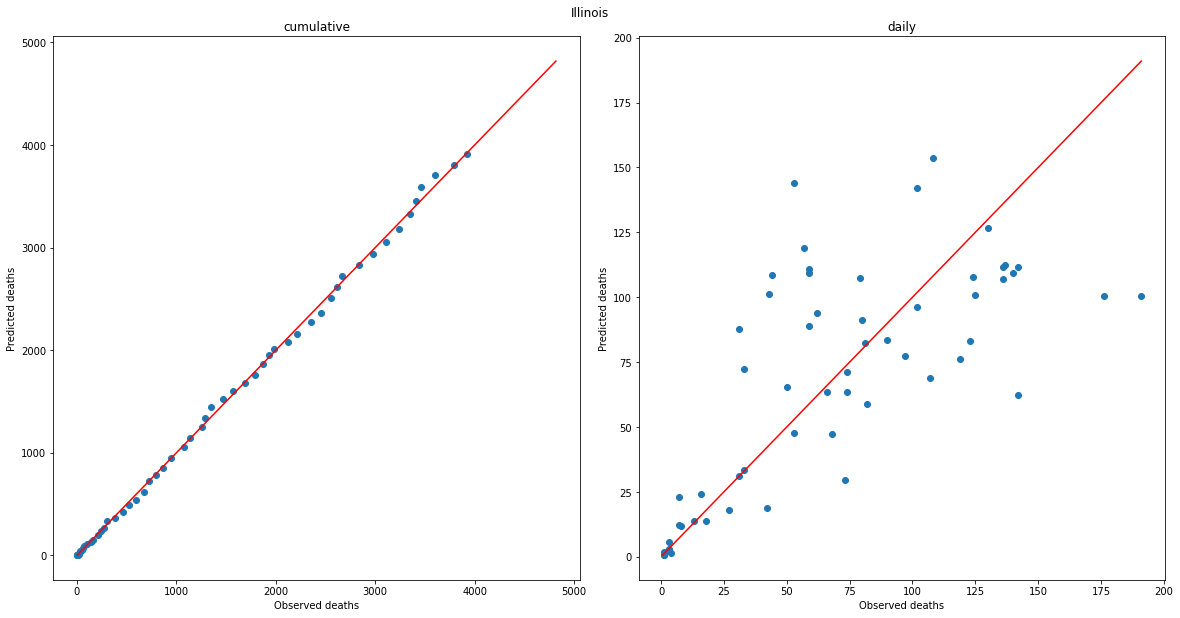

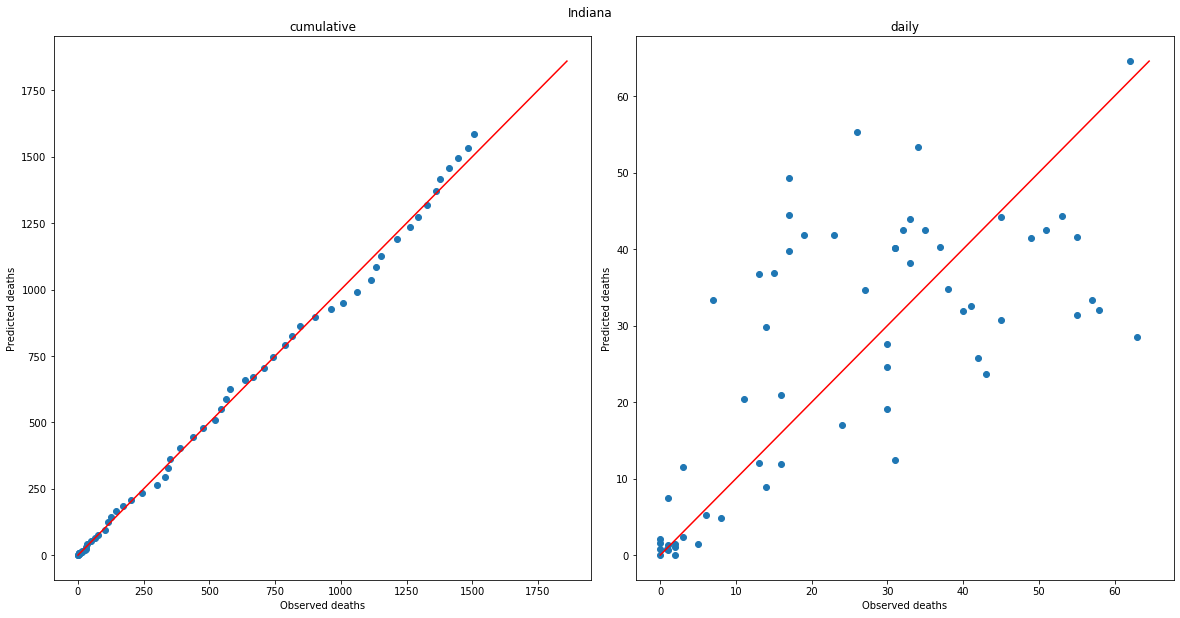

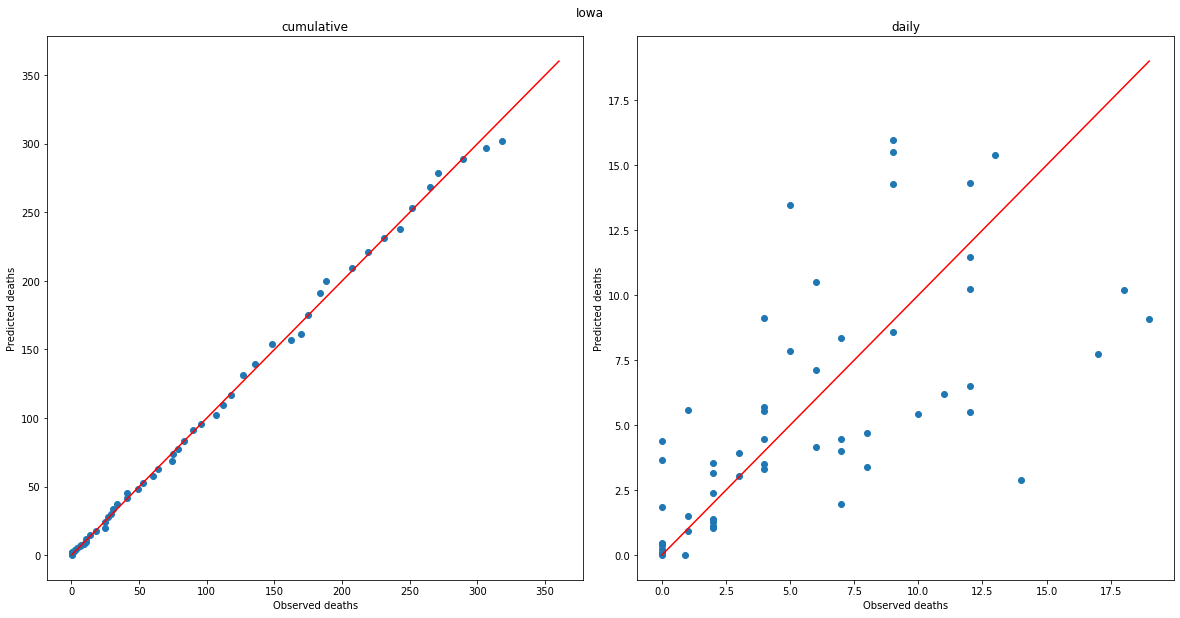

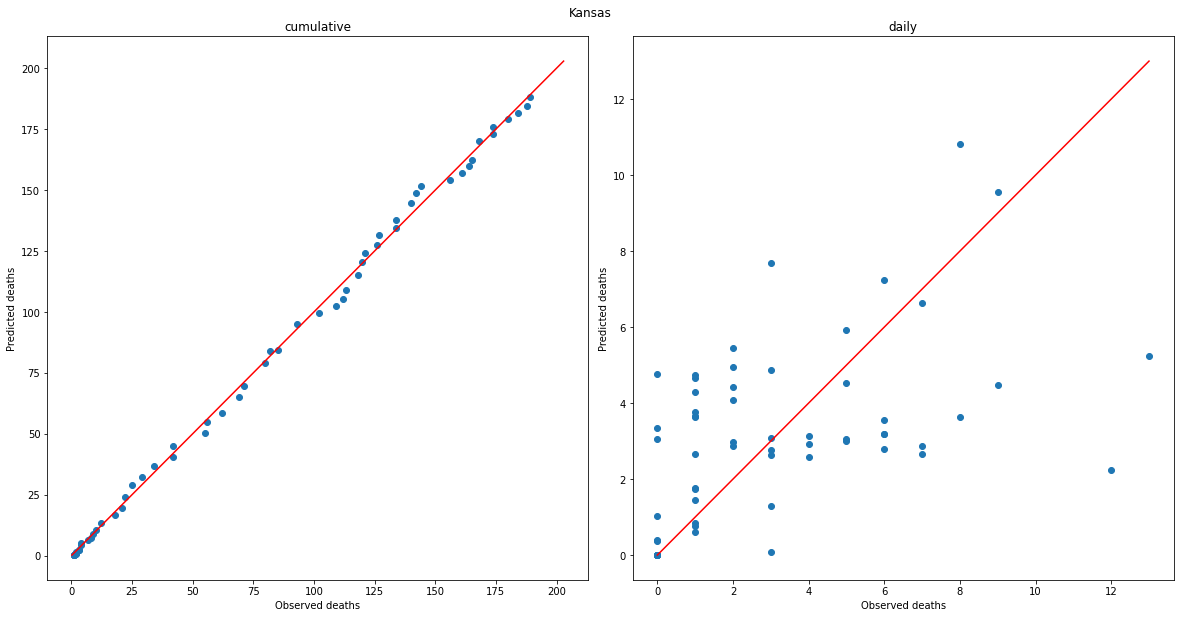

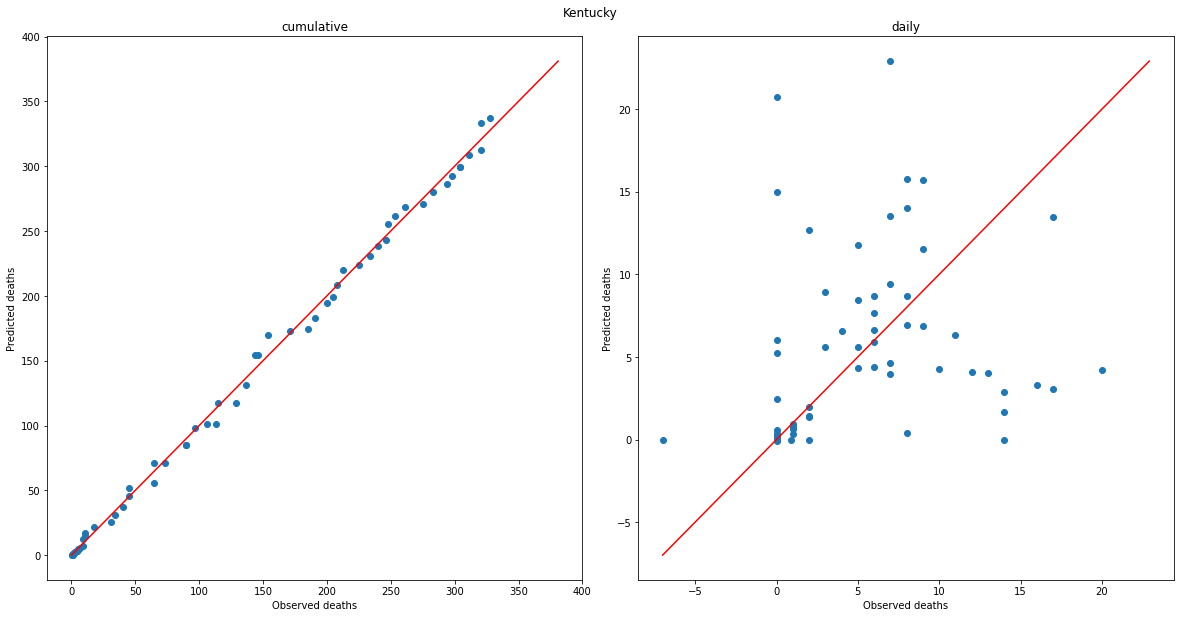

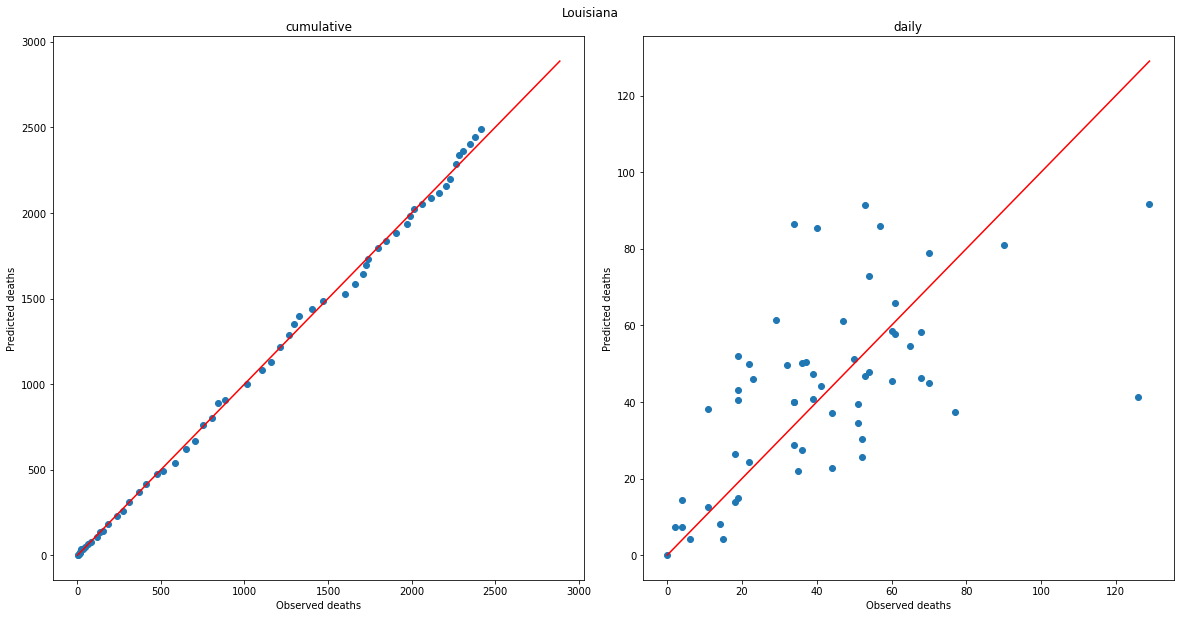

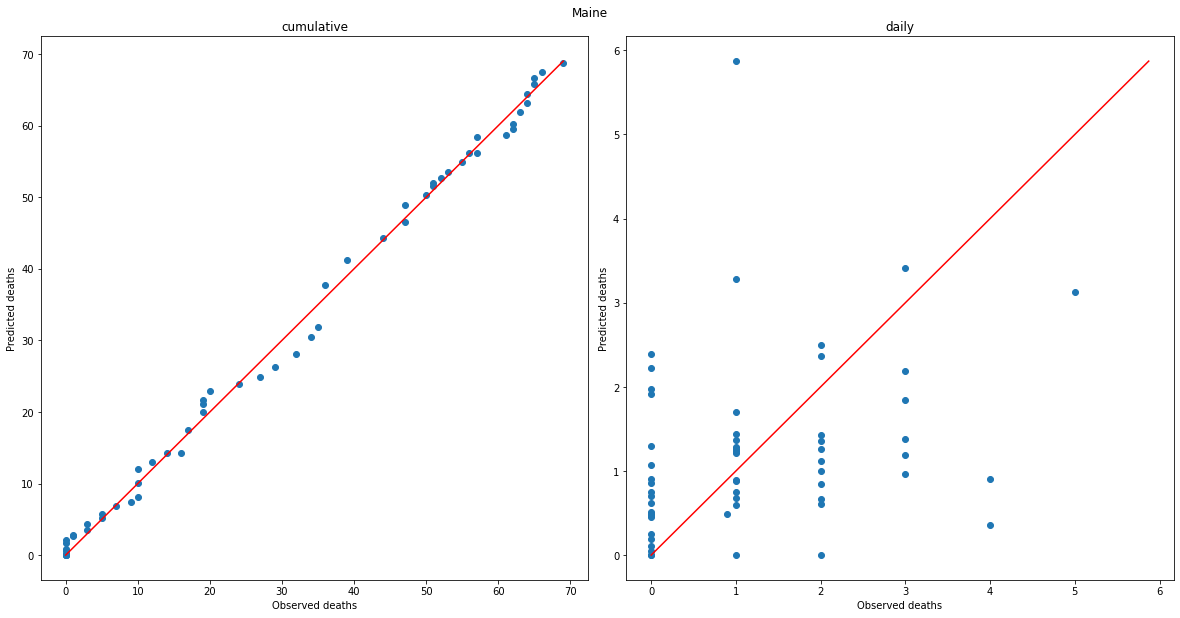

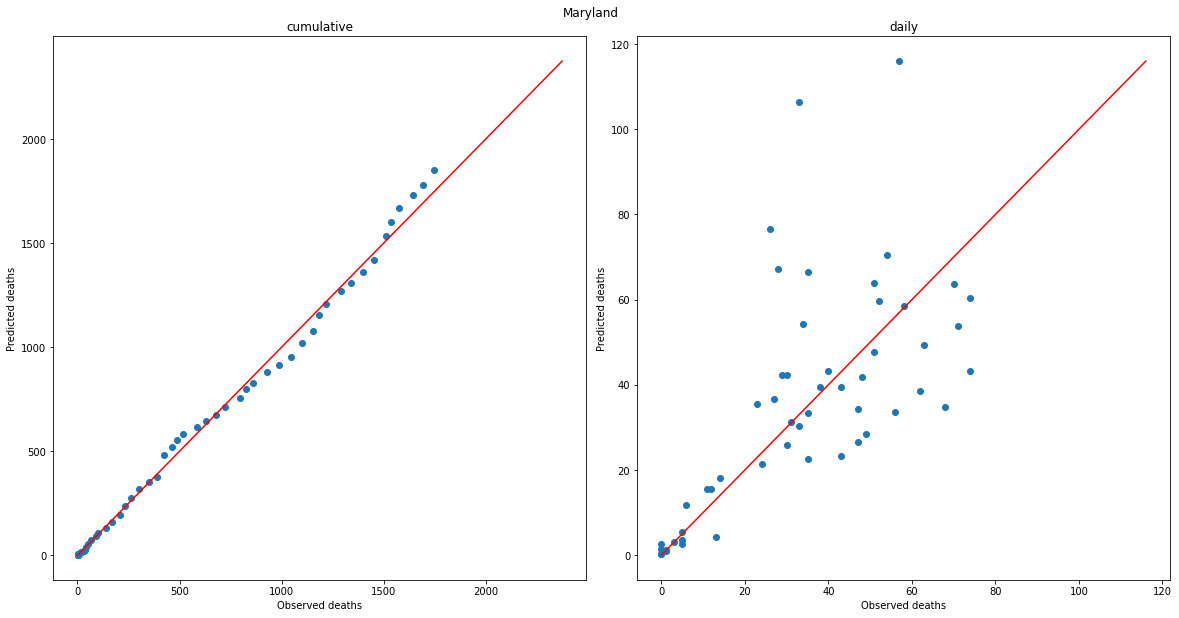

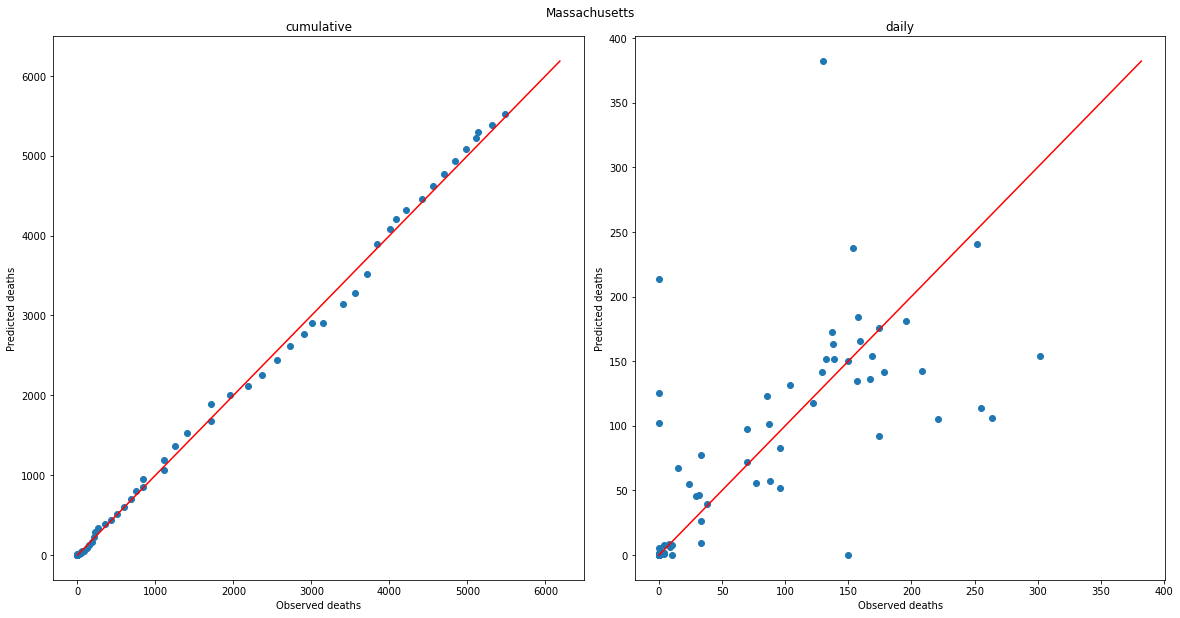

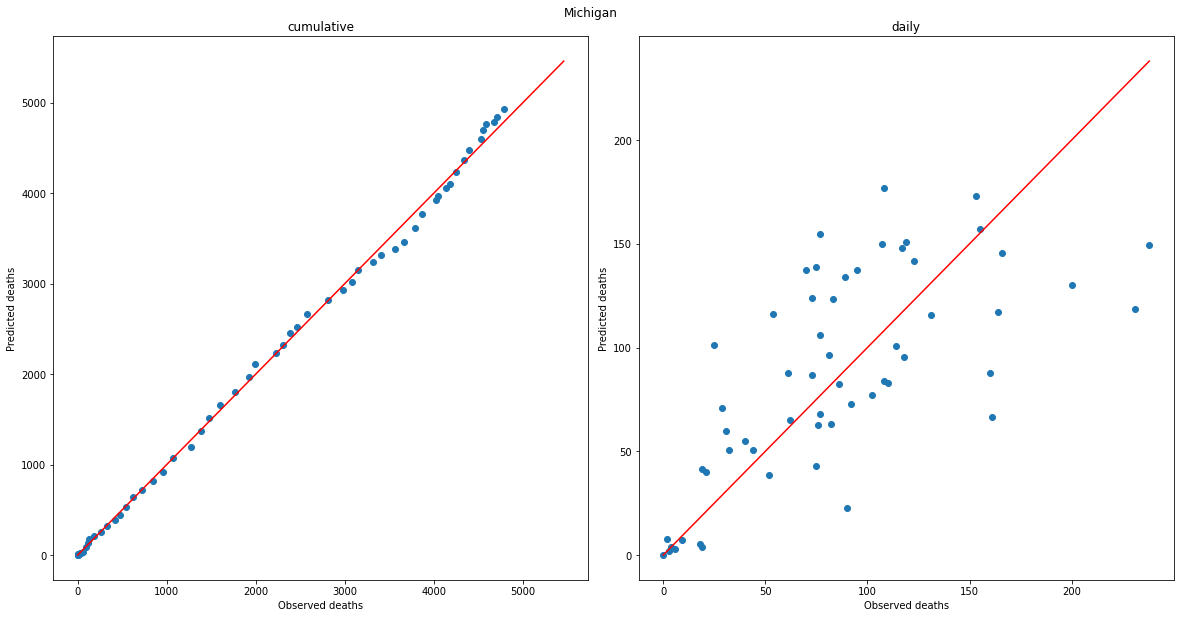

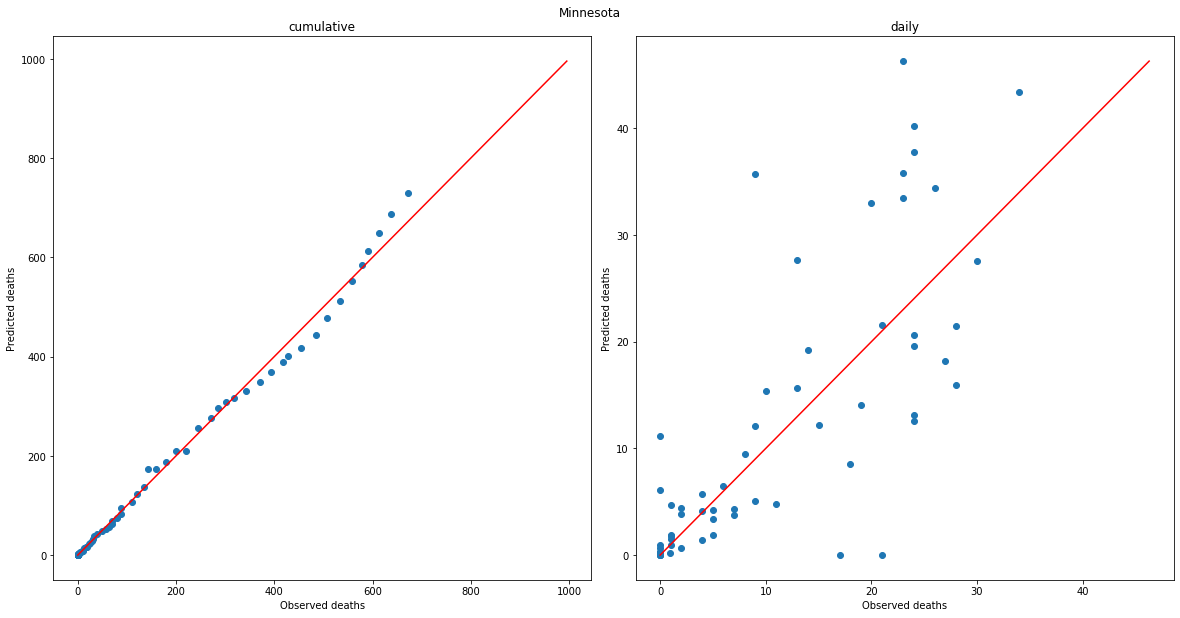

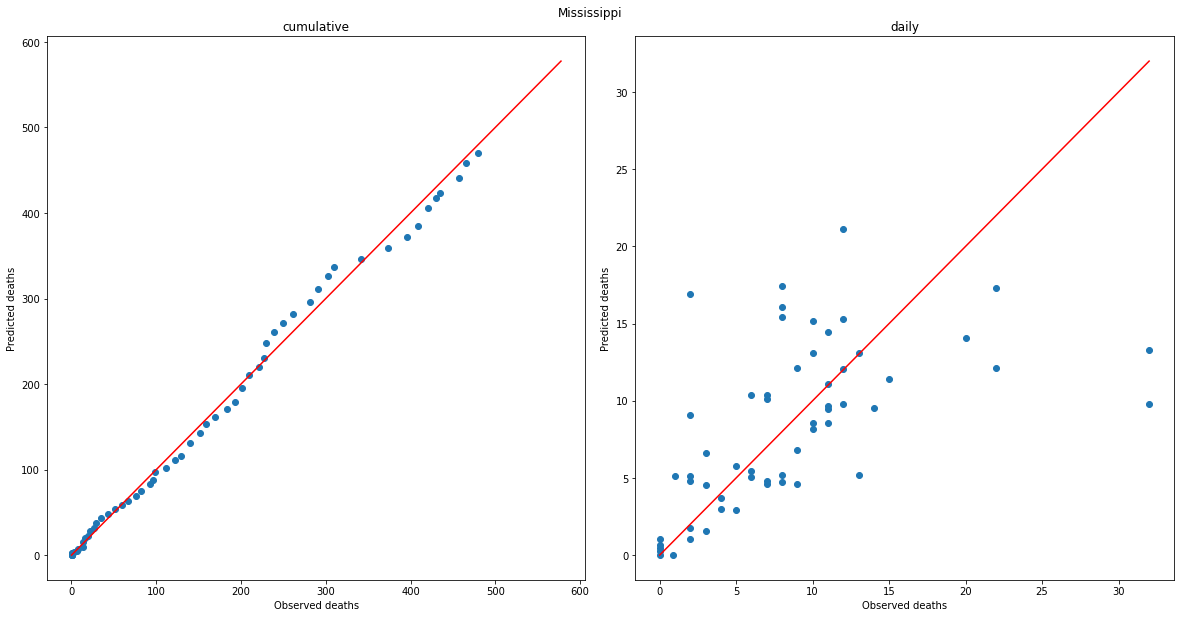

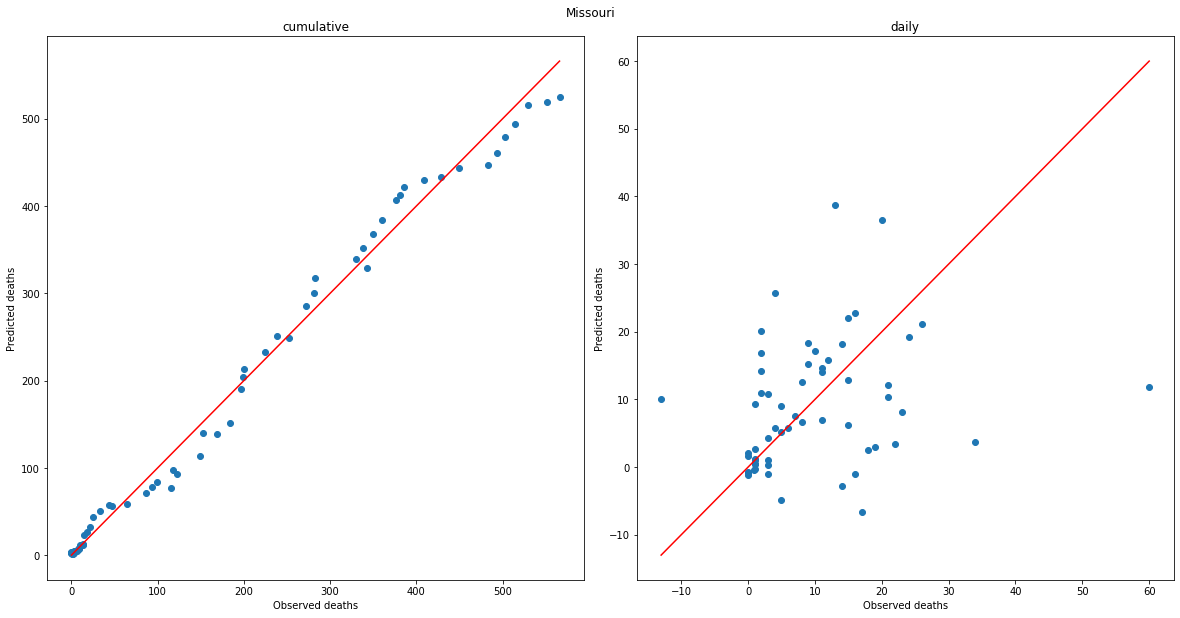

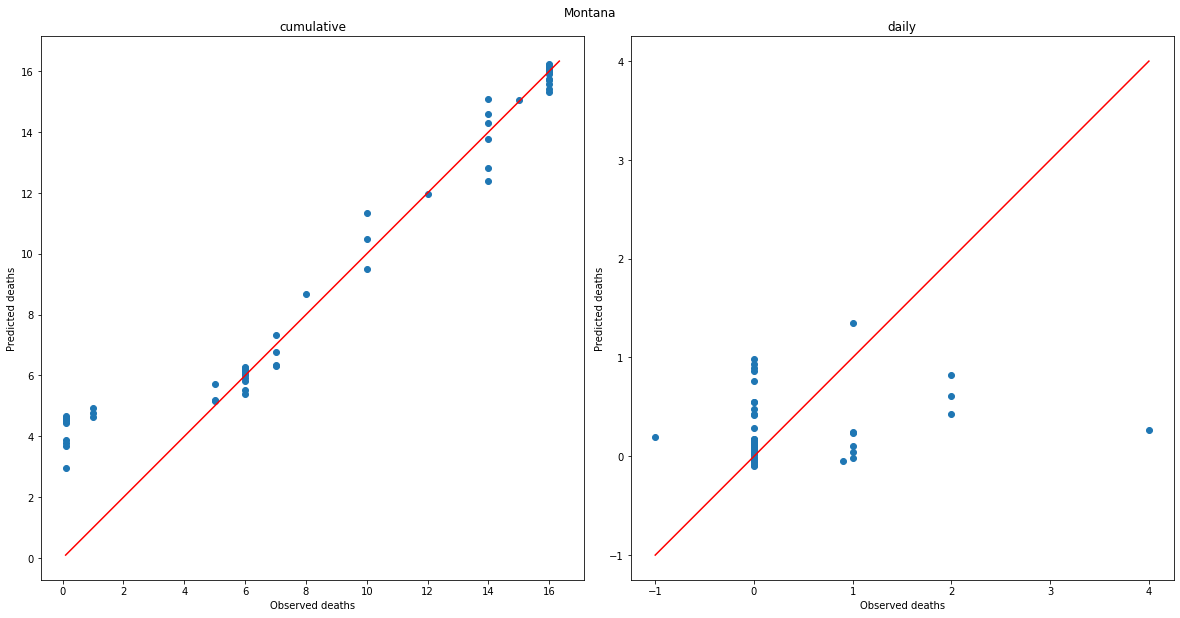

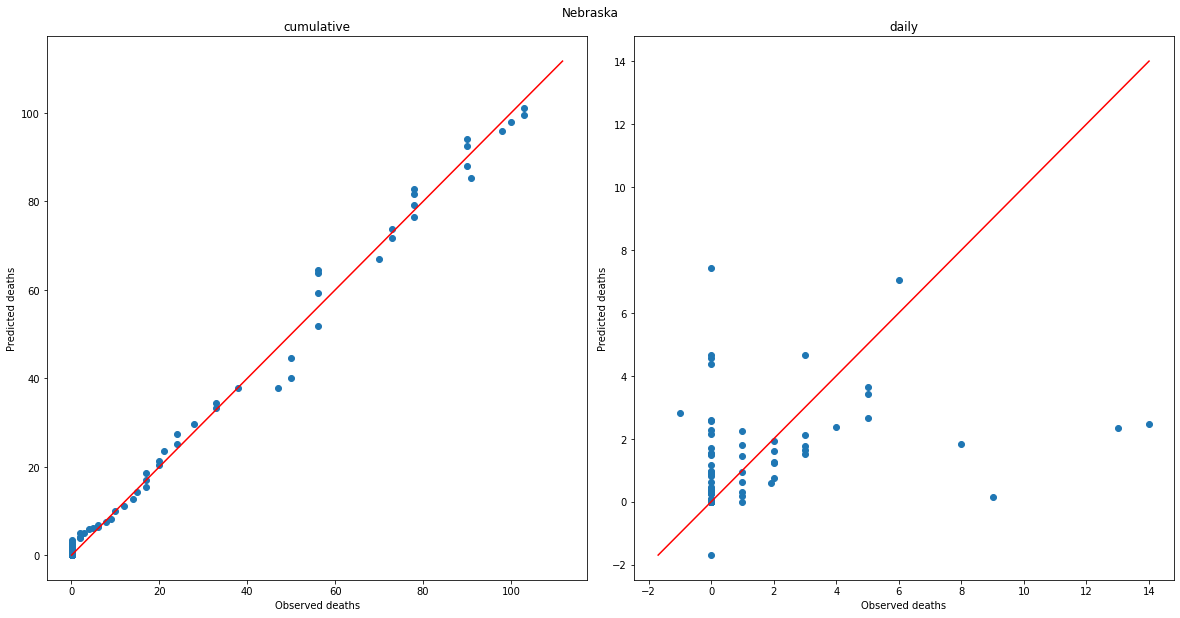

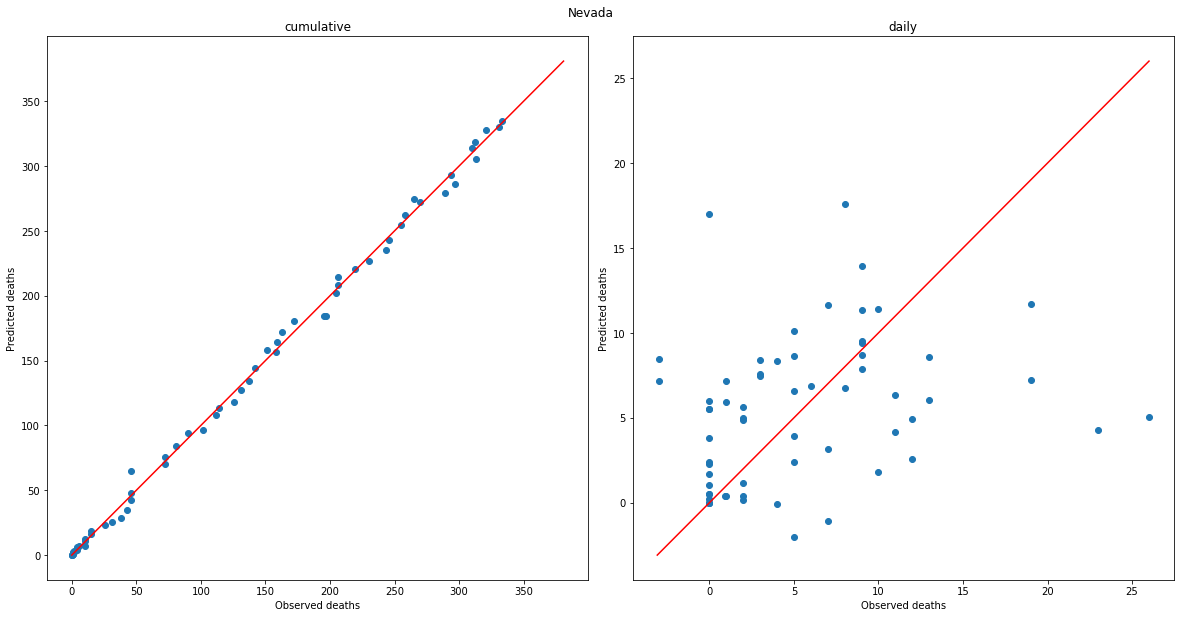

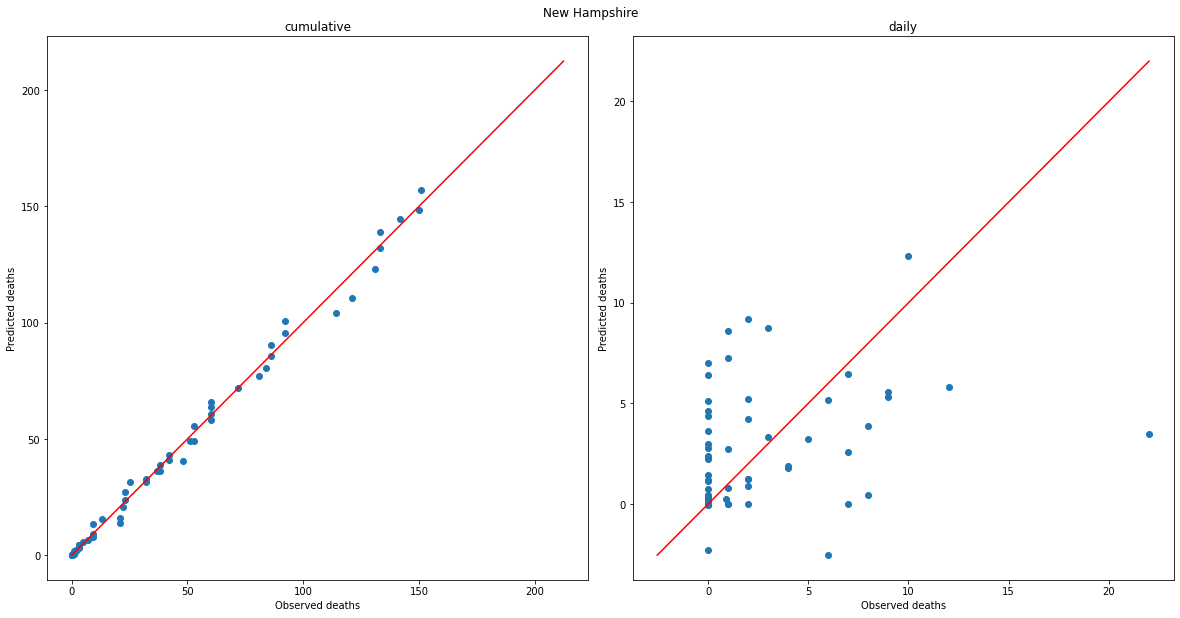

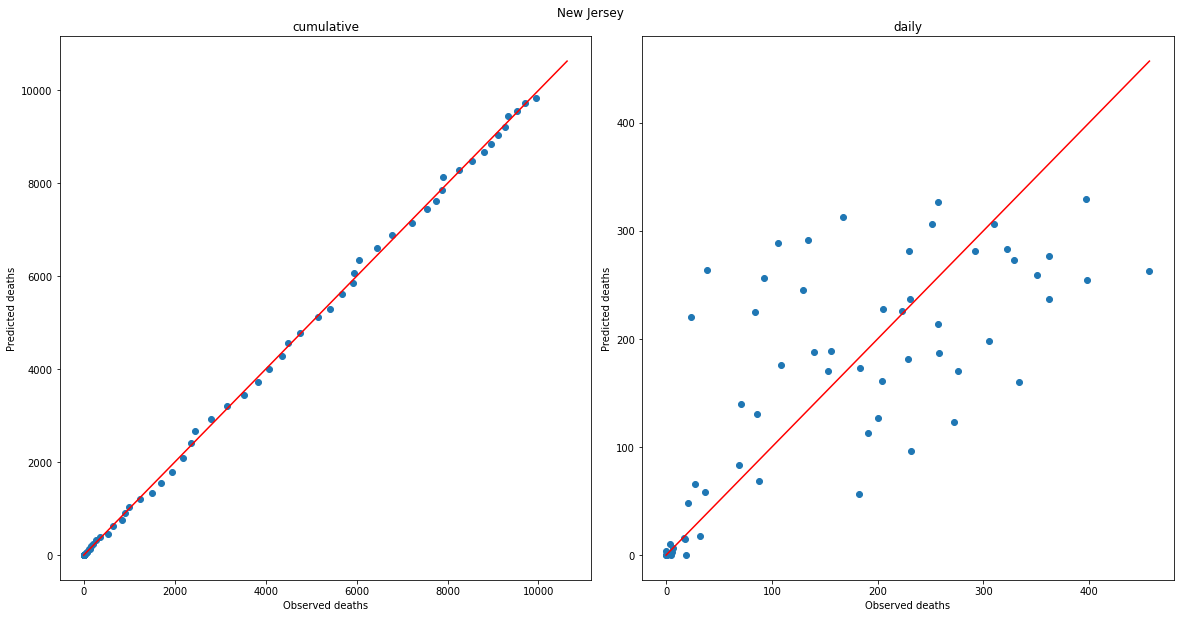

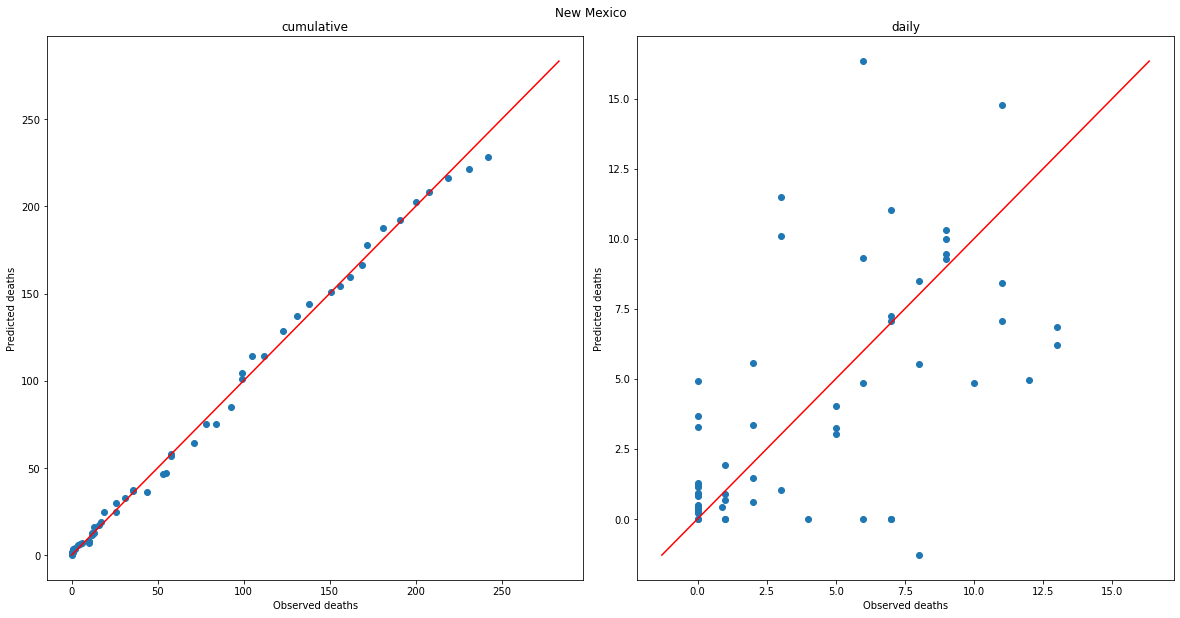

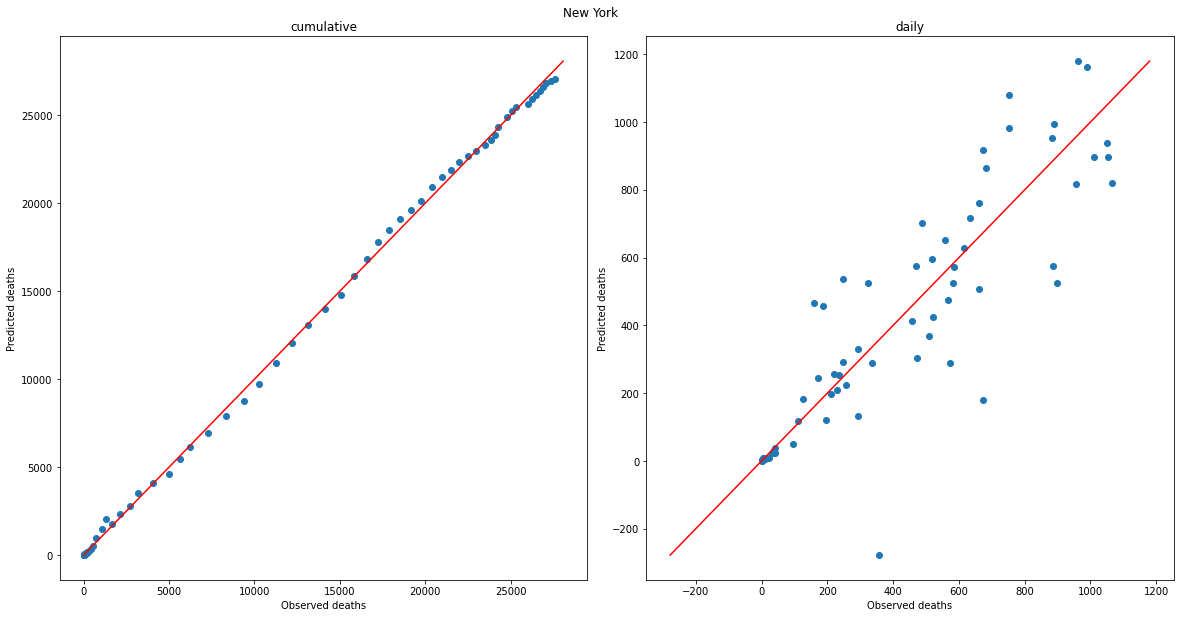

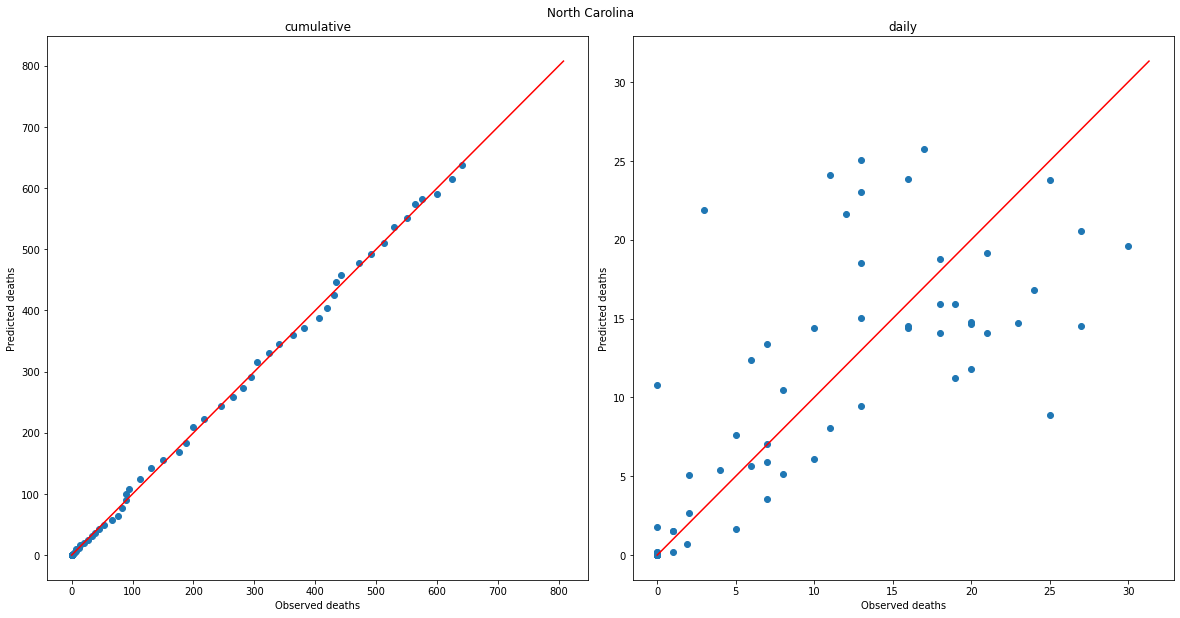

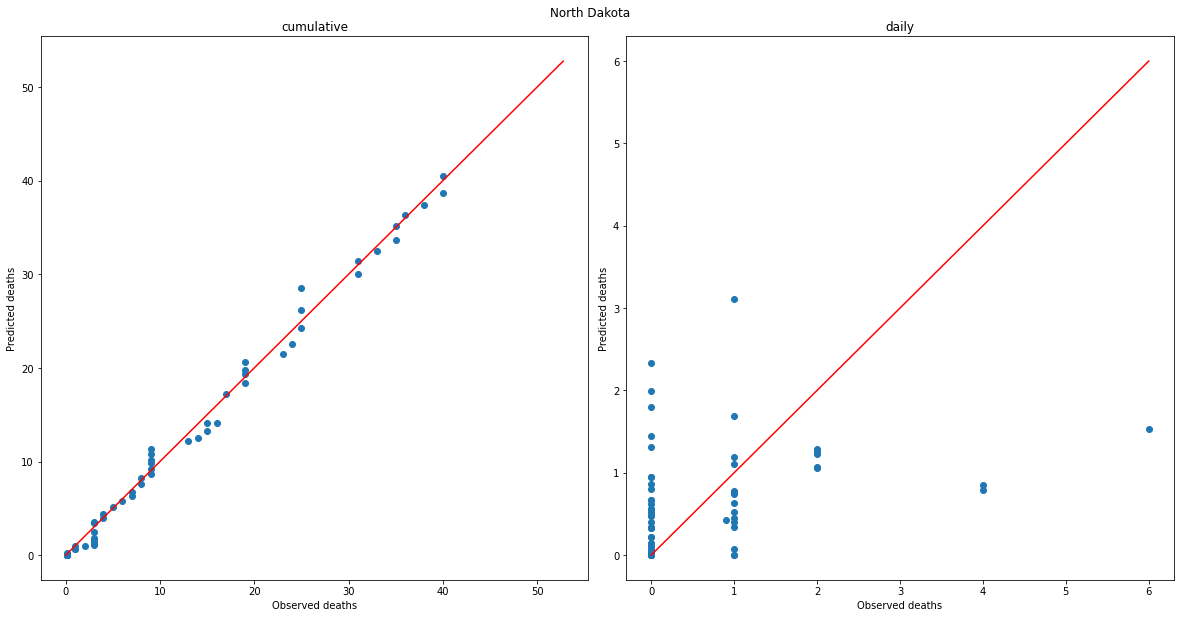

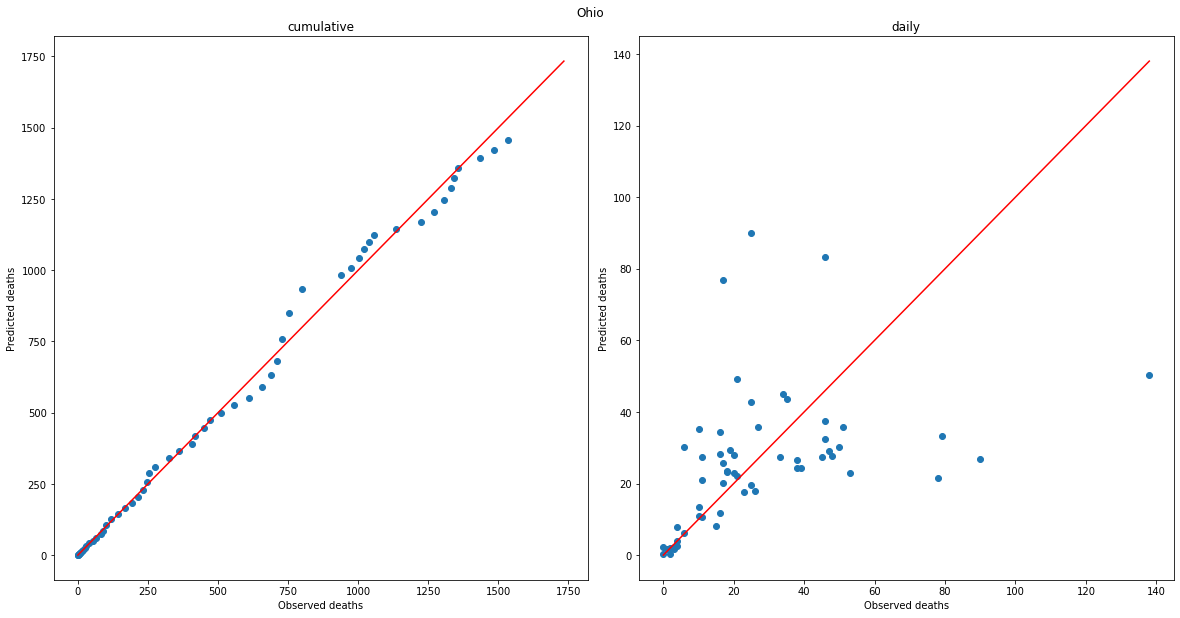

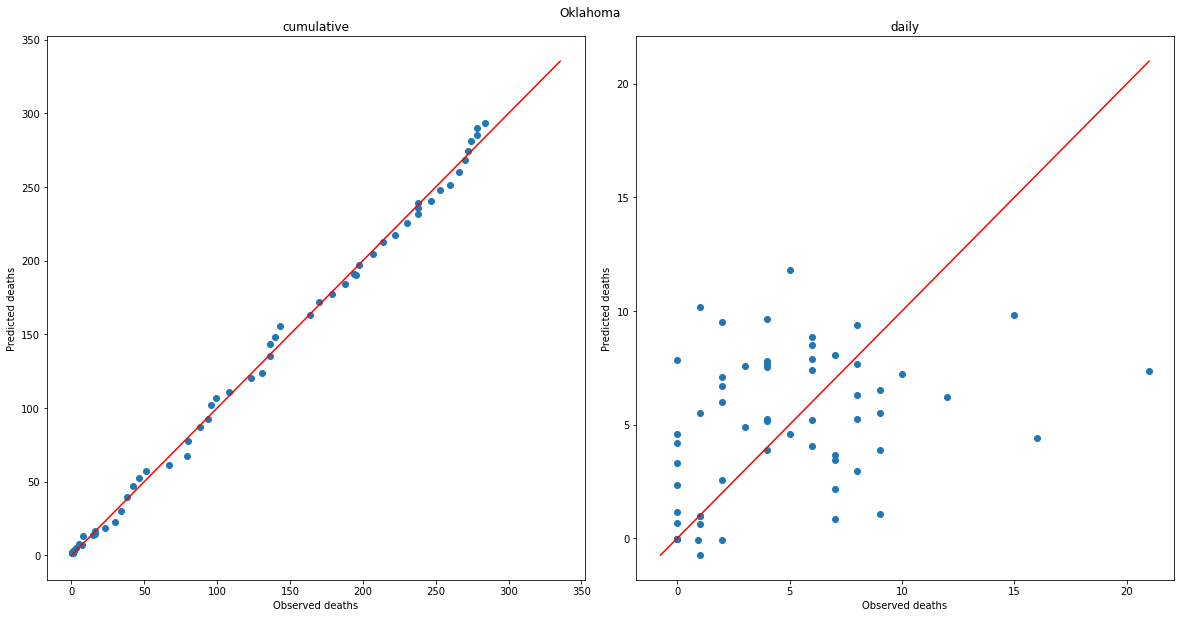

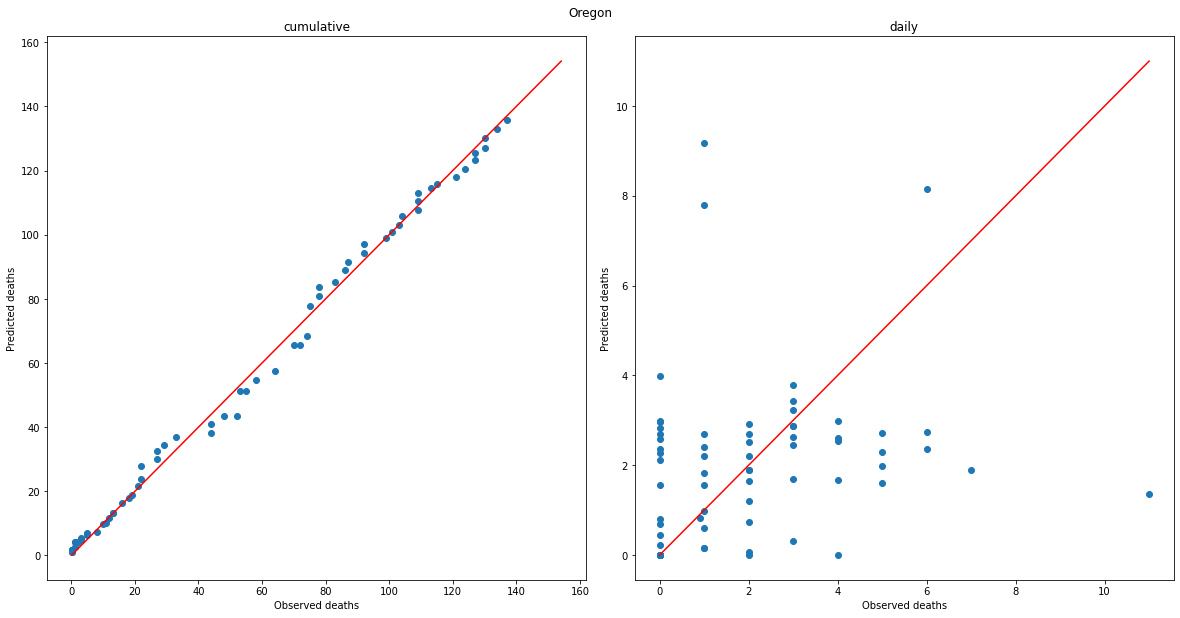

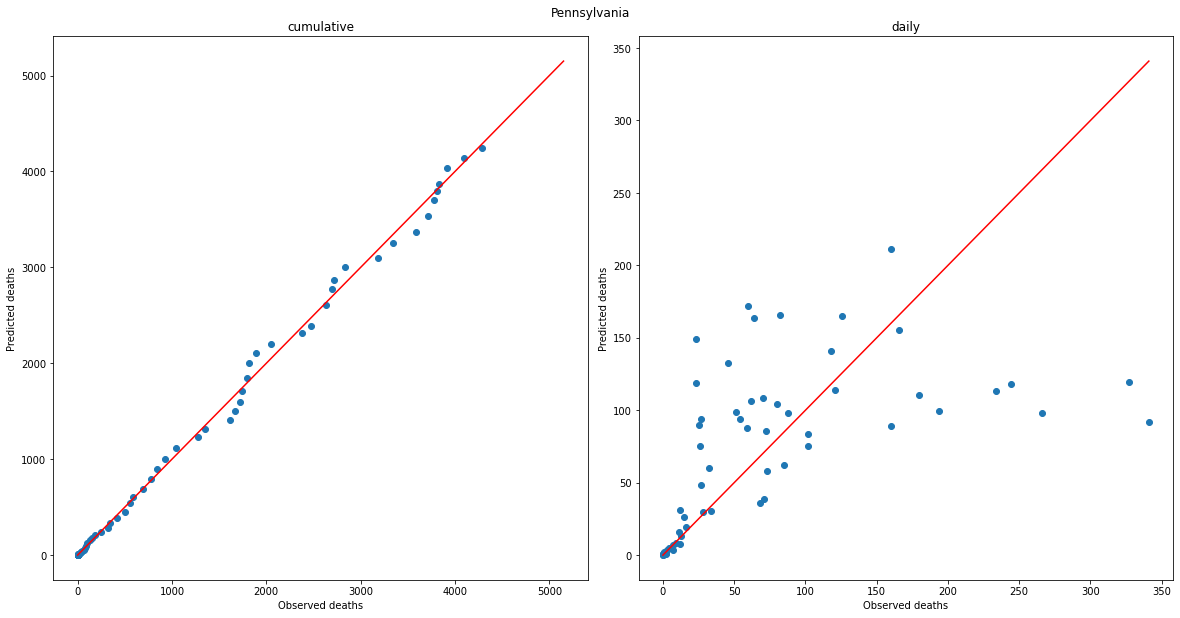

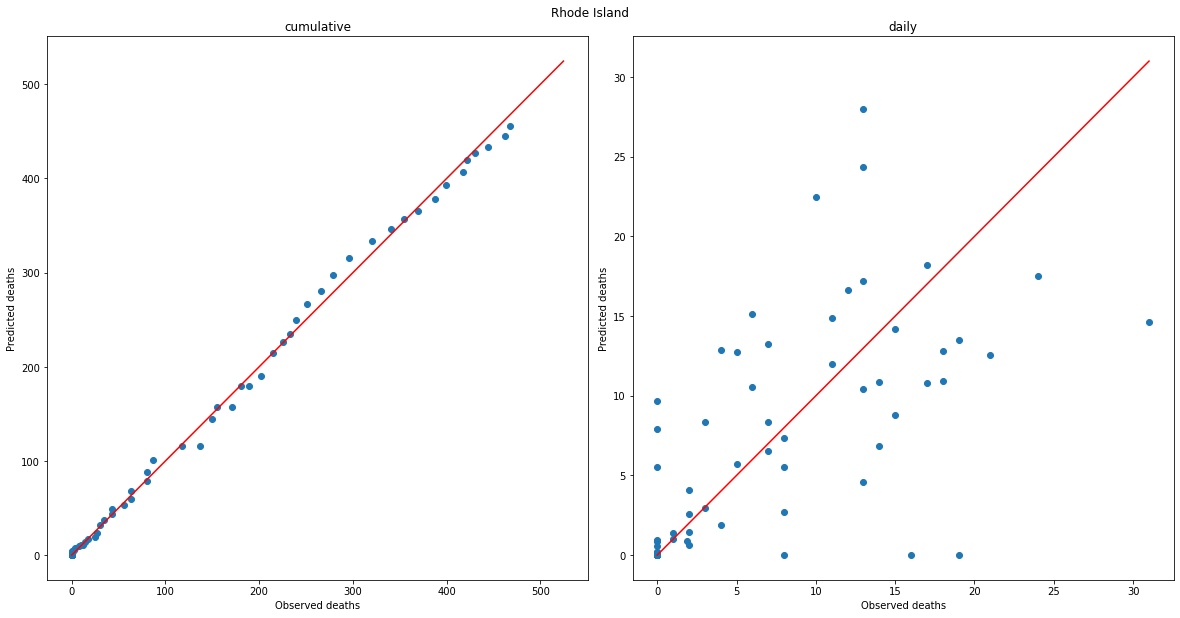

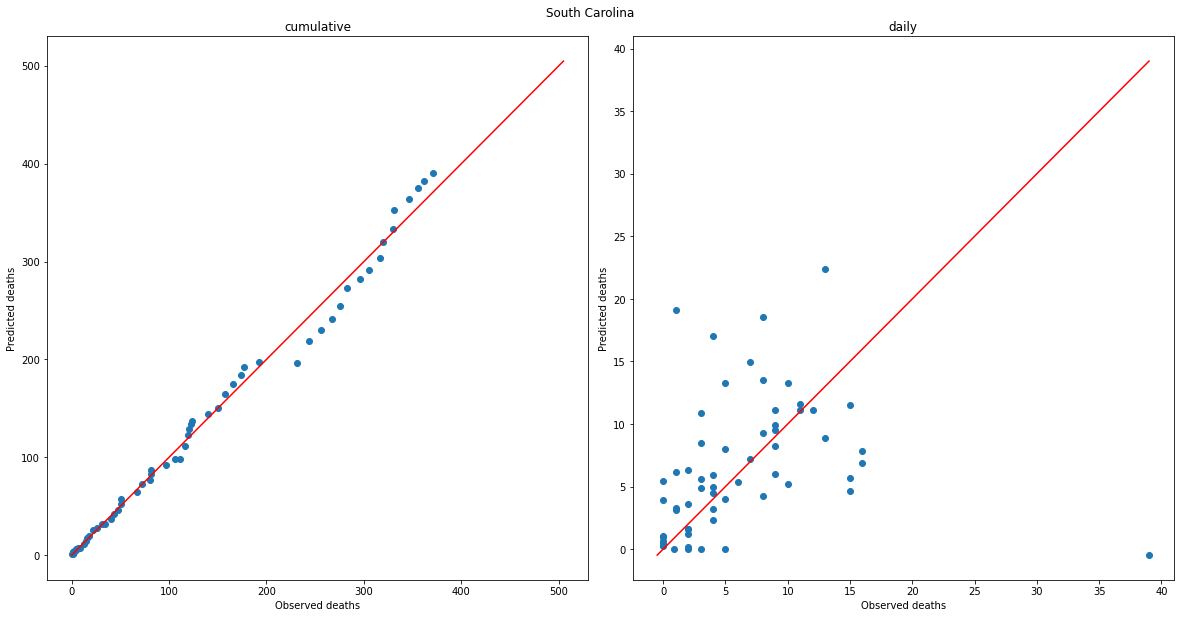

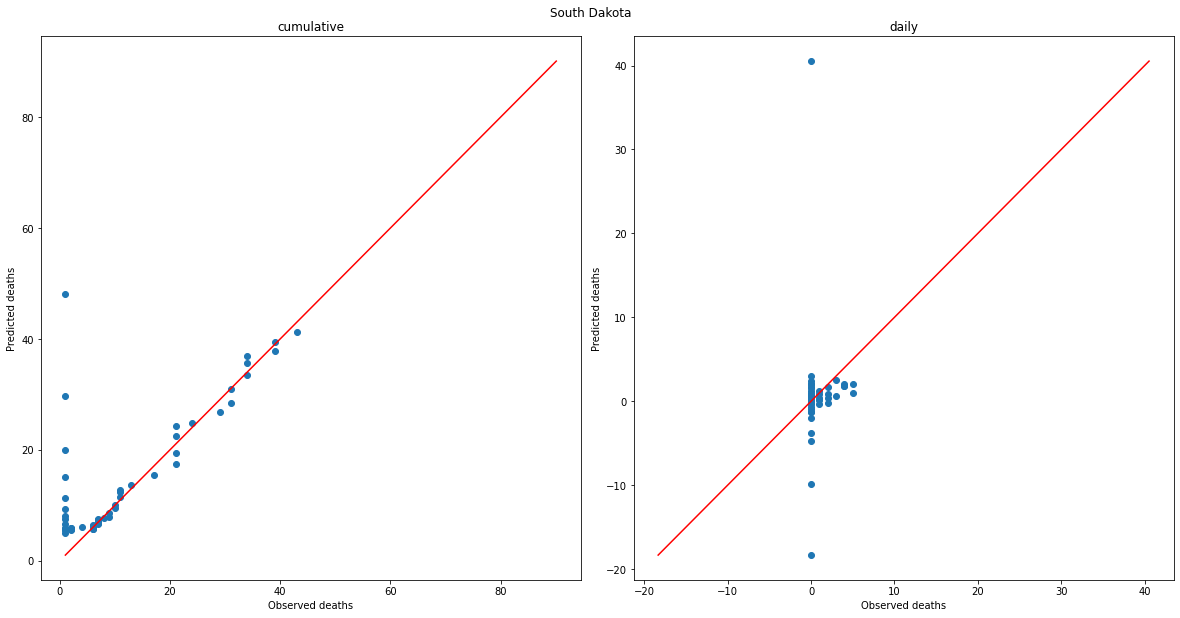

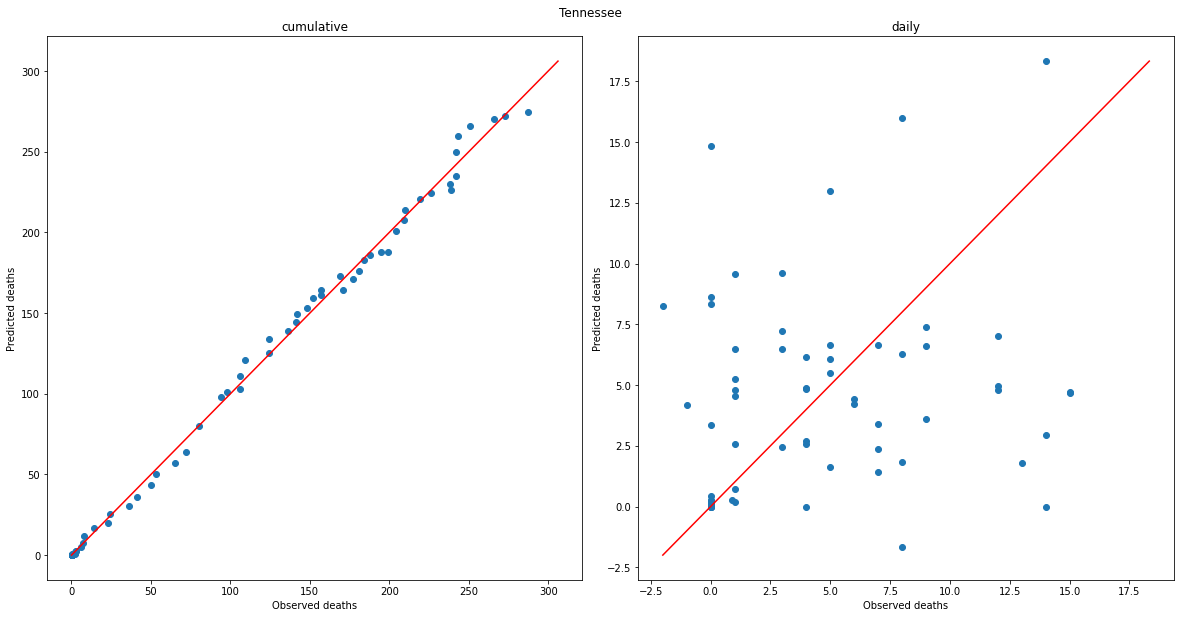

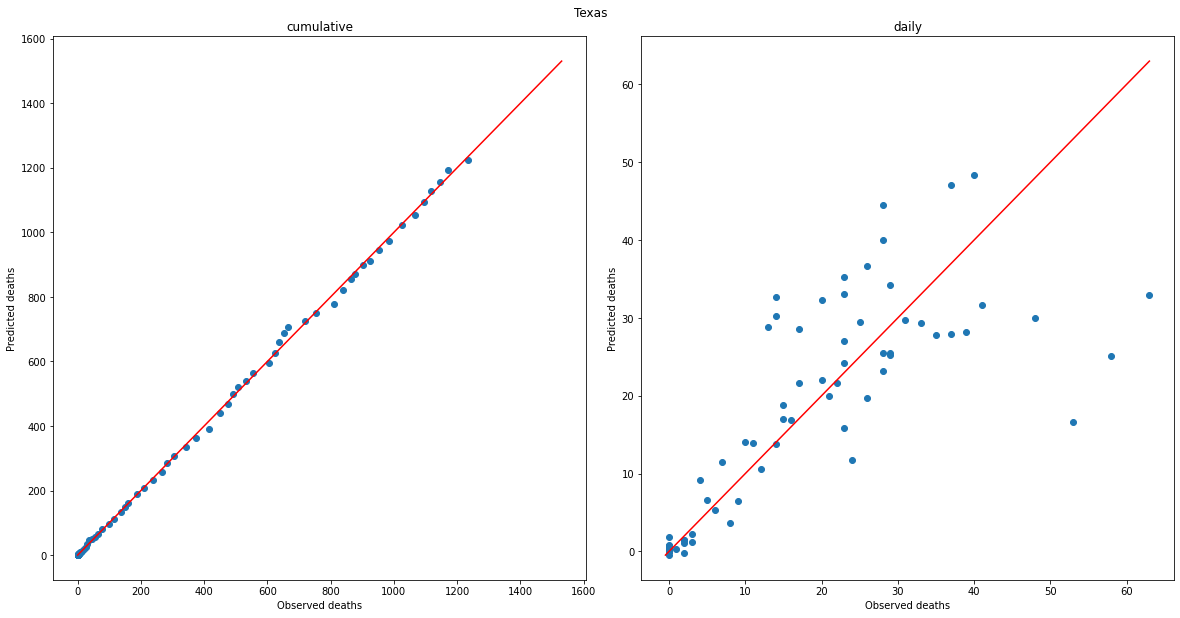

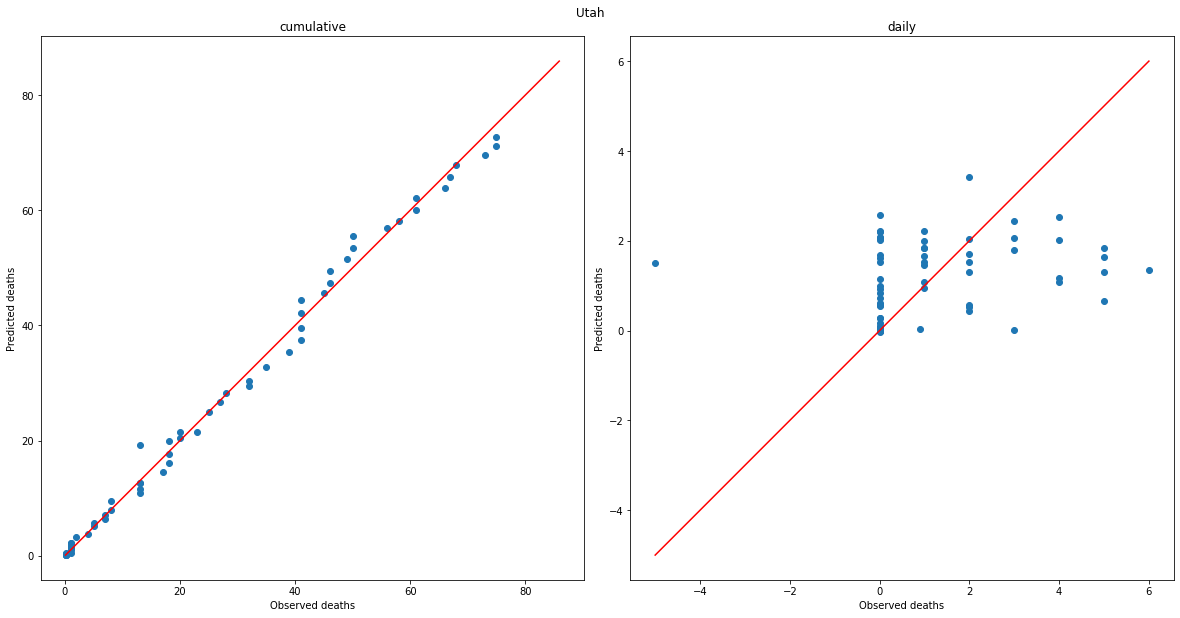

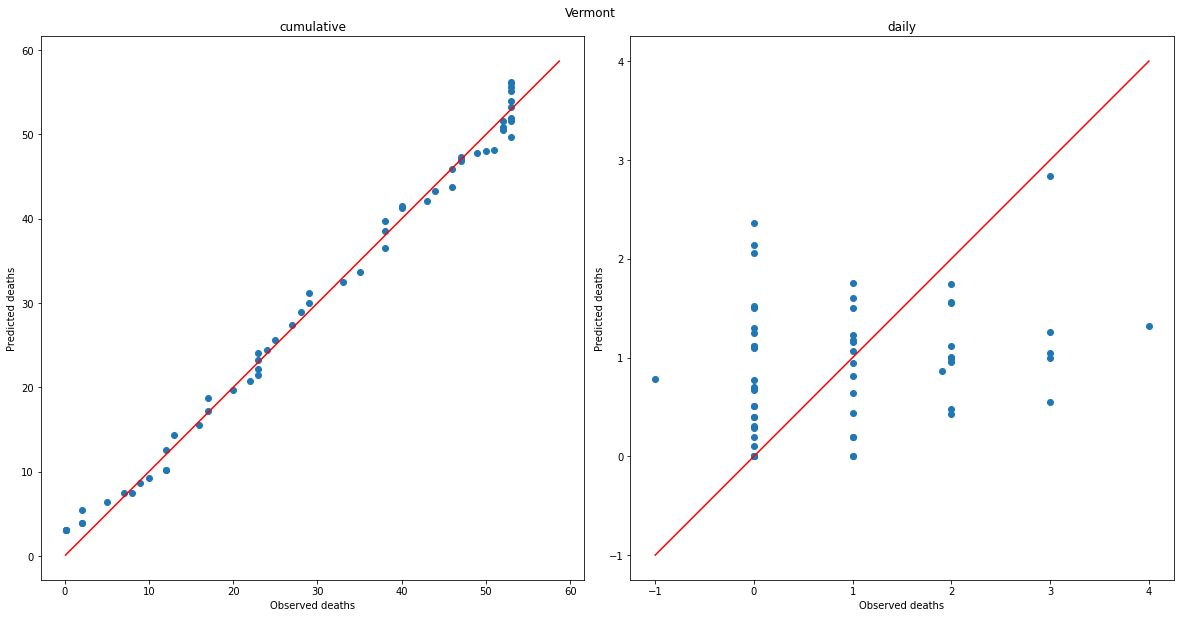

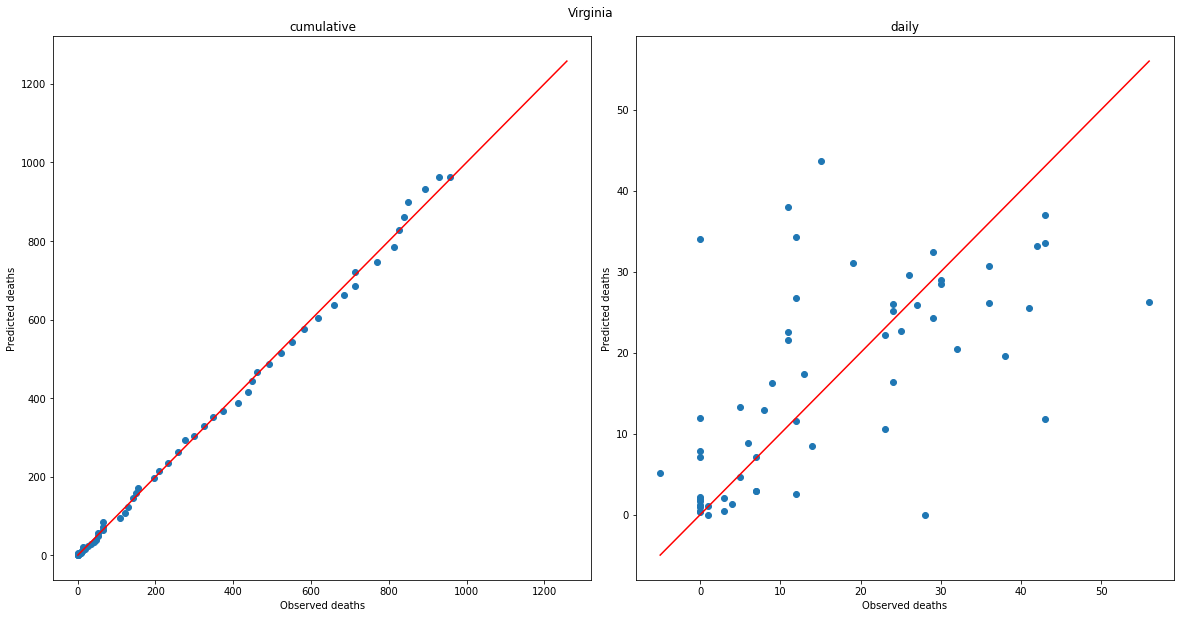

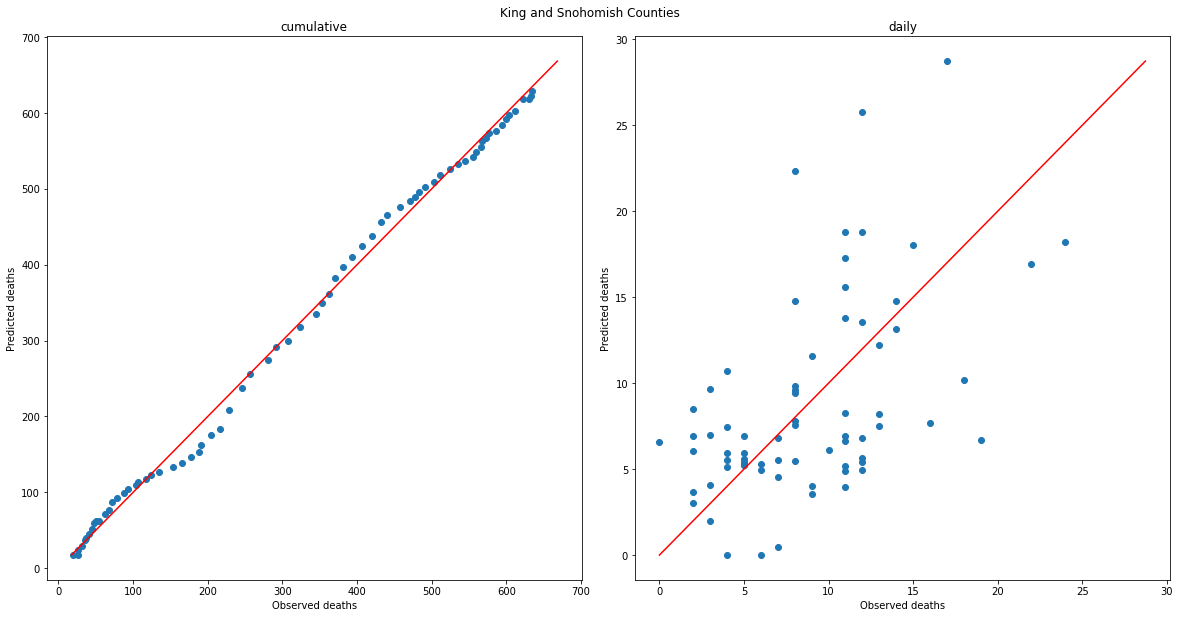

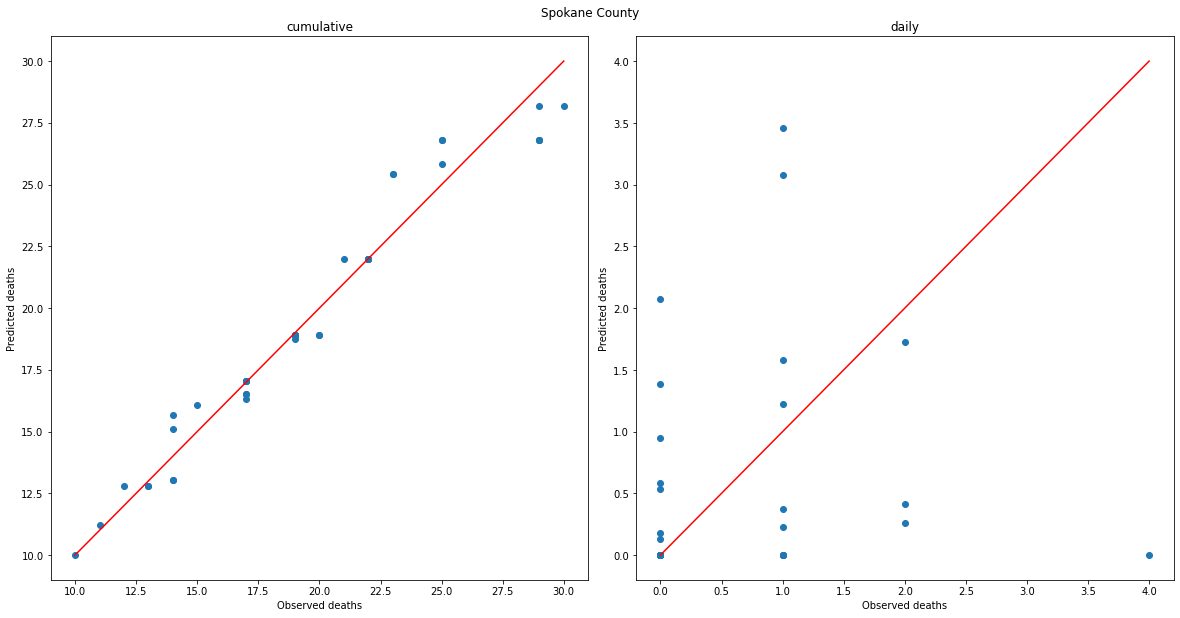

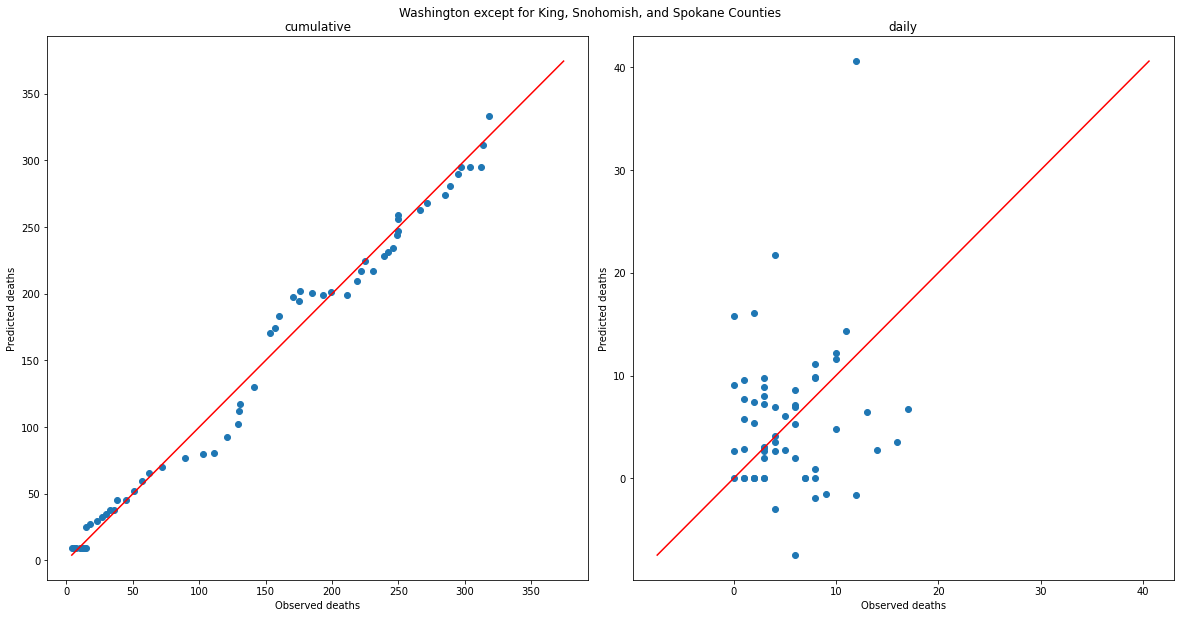

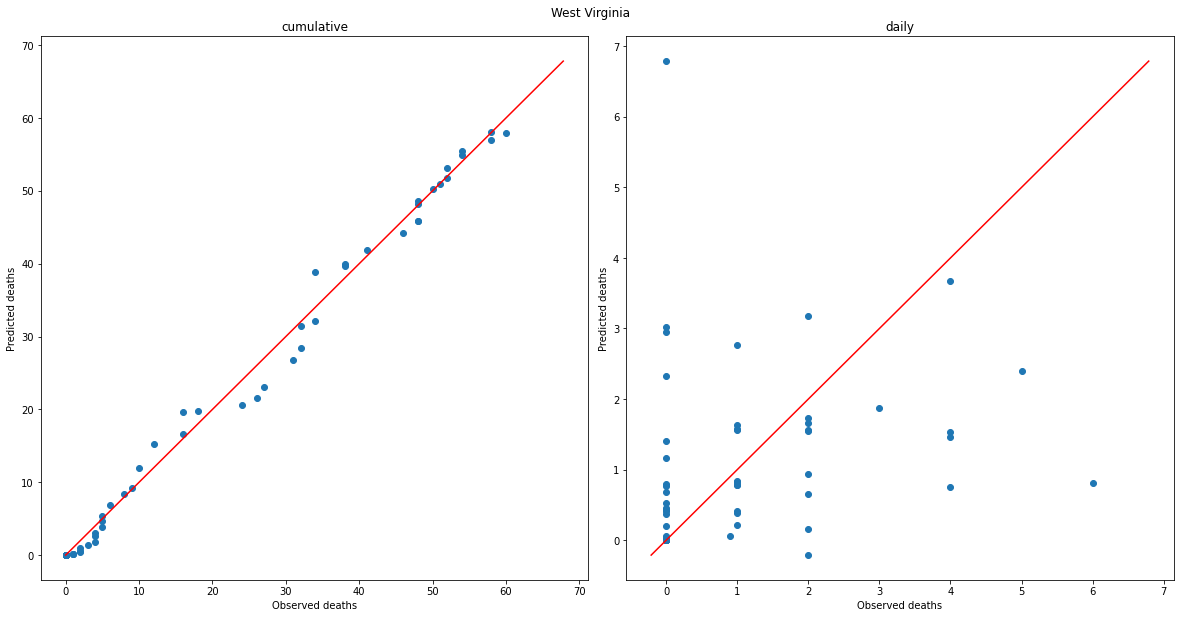

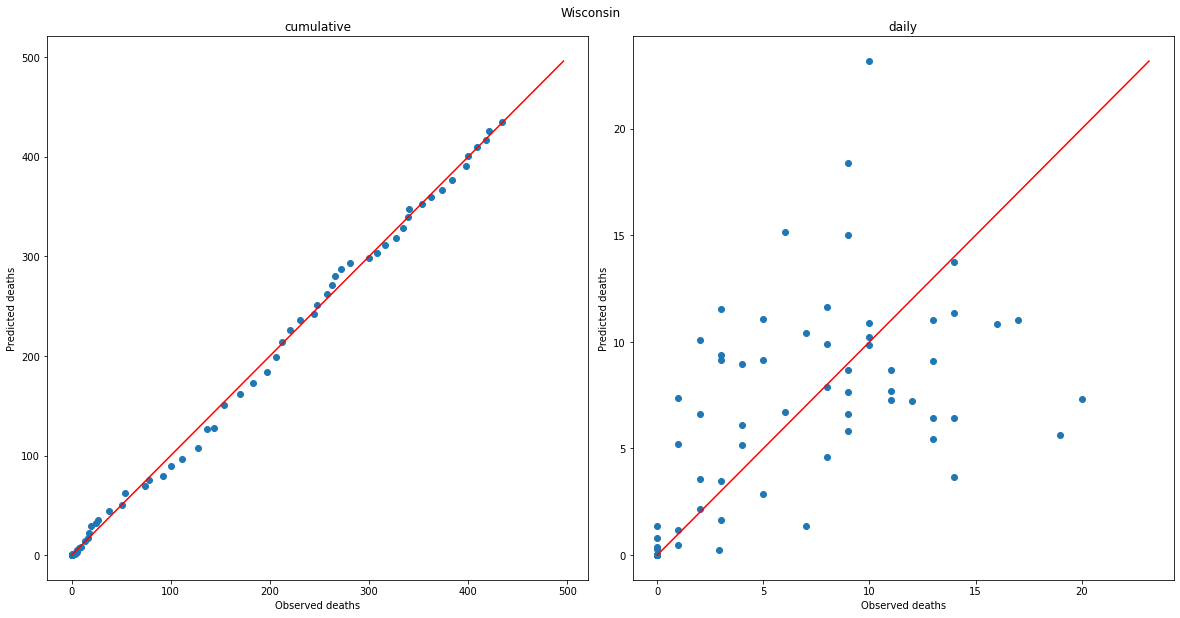

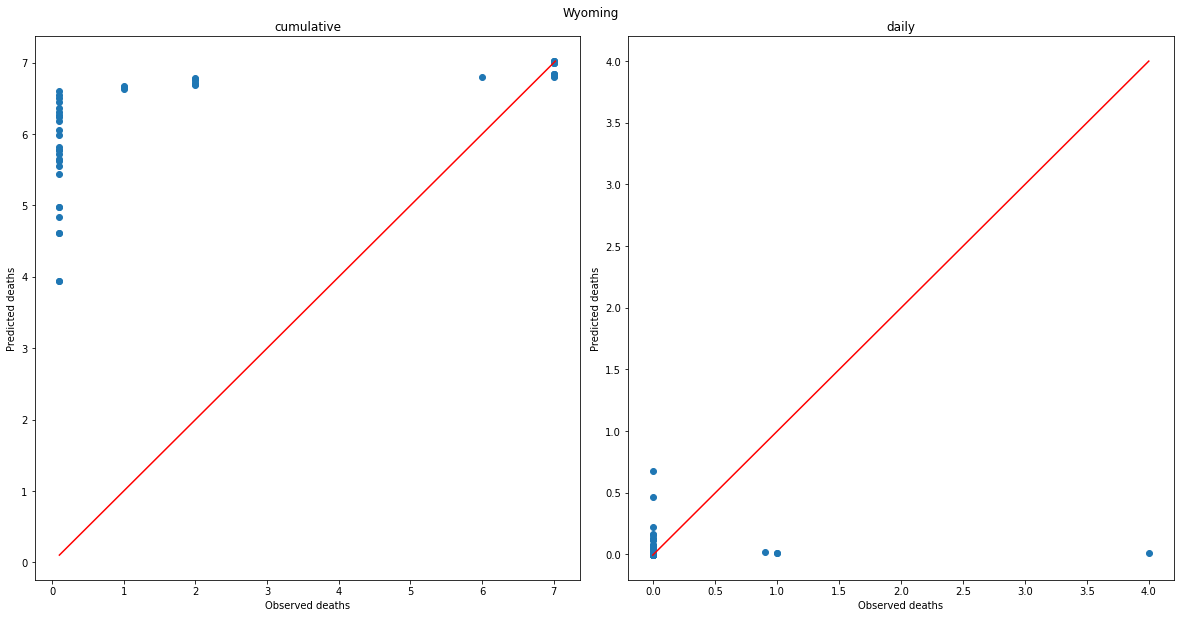

In [3]:
for location_id, location_name in zip(location_ids, location_names):
    plot_df = df.loc[df['location_id'] == location_id].reset_index(drop=True)
    plot_df['Model deaths'] = np.exp(plot_df['Model death rate']) * plot_df['population']
    plot_df['Predicted model deaths'] = np.exp(plot_df['Predicted model death rate']) * plot_df['population']
    plot_df = plot_df.sort_values('Date')
    
    fig, ax = plt.subplots(1, 2, figsize=(16.5, 8.5))
    ax[0].scatter(plot_df['Model deaths'], 
                  plot_df['Predicted model deaths'])
    ax[0].plot(np.nanpercentile(plot_df[['Model deaths', 'Predicted model deaths']], (0, 100)),
               np.nanpercentile(plot_df[['Model deaths', 'Predicted model deaths']], (0, 100)),
               color='red')
    ax[0].set_xlabel('Observed deaths')
    ax[0].set_ylabel('Predicted deaths')
    ax[0].set_title('cumulative')
    ax[1].scatter(np.diff(plot_df['Model deaths']), 
                  np.diff(plot_df['Predicted model deaths']))
    ax[1].plot(np.nanpercentile(np.diff(plot_df[['Model deaths', 'Predicted model deaths']], axis=0), (0, 100)),
               np.nanpercentile(np.diff(plot_df[['Model deaths', 'Predicted model deaths']], axis=0), (0, 100)),
               color='red')
    ax[1].set_xlabel('Observed deaths')
    ax[1].set_ylabel('Predicted deaths')
    ax[1].set_title('daily')
    fig.tight_layout()
    fig.suptitle(location_name, y=1.005)
    